**Importamos liberias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

**Cargamos dataset**

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Coderhouse-DATASCIENCE/ALTAS-FINAL.xlsx')

In [ ]:
df = pd.read_excel('/content/ALTAS-FINAL.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Primera aproximación al dataset

Vemos 5 registros aleatorios del dataset. 

In [ ]:
df.sample(5)

,Mes,Tipo,idPréstamo,Cliente,Porcentaje Auto,Marca,Año,Valor Actual del Auto,Provincia,Estado Civil,Situación Laboral,Actividad Laboral,Score Cliente,Riesgo
7857,2020-ene.,C,101005951C,16292.0,(+) 45%,VOLKSWAGEN,2004.0,148000.0,Buenos Aires,Soltero,Relación de Dependencia,-,356.0,RIESGO ALTO
8275,2020-ene.,C,101007833C,18138.0,(+) 45%,PEUGEOT,2005.0,187000.0,Buenos Aires,Soltero,Relación de Dependencia,-,518.0,RIESGO ALTO
8957,2020-ene.,C,101002371C,12680.0,(-) 45%,PEUGEOT,2007.0,216000.0,Buenos Aires,Soltero,Relación de Dependencia,-,704.0,RIESGO BAJO
10042,2020-ene.,C,101008000C,18301.0,(+) 45%,VOLKSWAGEN,2008.0,242000.0,Buenos Aires,Casado,Relación de Dependencia,CHOFER TRANSPORTE,843.0,RIESGO NULO
1569,2020-ene.,C,101002614C,12923.0,(-) 45%,VOLKSWAGEN,2010.0,178000.0,Mendoza,Casado,Comerciante,EMPLEADA,628.0,RIESGO MEDIO


Mostramos el tamaño del dataset

In [ ]:
df.shape

(15852, 14)

Mostramos la información de todas las columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15852 entries, 0 to 15851
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mes                    15852 non-null  object 
 1   Tipo                   15852 non-null  object 
 2   idPréstamo             15852 non-null  object 
 3   Cliente                15852 non-null  object 
 4   Porcentaje Auto        15852 non-null  object 
 5   Marca                  15852 non-null  object 
 6   Año                    15852 non-null  float64
 7   Valor Actual del Auto  15852 non-null  float64
 8   Provincia              15852 non-null  object 
 9   Estado Civil           15852 non-null  object 
 10  Situación Laboral      15852 non-null  object 
 11  Actividad Laboral      15842 non-null  object 
 12  Score Cliente          15852 non-null  float64
 13  Riesgo                 15852 non-null  object 
dtypes: float64(3), object(11)
memory usage: 1.7+ MB


Mostramos los valores estadisticos del dataset de las columnas numéricas. 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,15852.0,2010.171083,3.414872,2001.0,2008.0,2010.0,2012.0,2022.0
Valor Actual del Auto,15852.0,498770.060560,482874.938755,89000.0,227000.0,323500.0,600000.0,8430000.0
Score Cliente,15852.0,356.581252,328.290427,0.0,0.0,462.0,655.0,970.0


Listamos el nombre de las columnas

In [ ]:
df.columns

Index(['Mes', 'Tipo', 'idPréstamo', 'Cliente', 'Porcentaje Auto', 'Marca',
       'Año', 'Valor Actual del Auto', 'Provincia', 'Estado Civil',
       'Situación Laboral', 'Actividad Laboral', 'Score Cliente', 'Riesgo'],
      dtype='object')

Visualizamos los tipos de datos

In [ ]:
df.dtypes

Mes                       object
Tipo                      object
idPréstamo                object
Cliente                   object
Porcentaje Auto           object
Marca                     object
Año                      float64
Valor Actual del Auto    float64
Provincia                 object
Estado Civil              object
Situación Laboral         object
Actividad Laboral         object
Score Cliente            float64
Riesgo                    object
dtype: object

## Data Wrangling

**Trasformación de headers de las columnas**

Buscamos unificar los encabezados de las columnas para que todos se encuentren en mayúscula y sin tildes. 

In [ ]:
df.head(2)

,Mes,Tipo,idPréstamo,Cliente,Porcentaje Auto,Marca,Año,Valor Actual del Auto,Provincia,Estado Civil,Situación Laboral,Actividad Laboral,Score Cliente,Riesgo
0,2022-mar.,0.0,1010166470,B029628,(+) 45%,CHEVROLET,2011.0,550000.0,Cordoba,Soltero,ADMINISTRADOR DE CAMPO,enfermera,0.0,SIN SCORING
1,2021-jul.,0.0,1010144070,B022821,(+) 45%,RENAULT,2014.0,890000.0,Buenos Aires,Soltero,ADMINISTRADOR DE CAMPO,PREFECTURA NAVAL ARG,0.0,SIN SCORING


In [ ]:
df.columns

Index(['Mes', 'Tipo', 'idPréstamo', 'Cliente', 'Porcentaje Auto', 'Marca',
       'Año', 'Valor Actual del Auto', 'Provincia', 'Estado Civil',
       'Situación Laboral', 'Actividad Laboral', 'Score Cliente', 'Riesgo'],
      dtype='object')

In [ ]:
#guardamos en esa variable los encabezados que queremos para las columnas son en mayúsculas y sin tildes
headers = ['MES-AÑO','TIPO', 'ID PRESTAMO','CLIENTE','PORCENTAJE AUTO','MARCA','AÑO AUTO','VALOR ACTUAL DEL AUTO', 'PROVINCIA', 'ESTADO CIVIL',
           'SITUACION LABORAL', 'ACTIVIDAD LABORAL','SCORE CLIENTE', 'RIESGO']

In [ ]:
#seteamos los headers que queremos para las columnas y comprobamos que quedaron bien
df.columns=headers
df.columns

Index(['MES-AÑO', 'TIPO', 'ID PRESTAMO', 'CLIENTE', 'PORCENTAJE AUTO', 'MARCA',
       'AÑO AUTO', 'VALOR ACTUAL DEL AUTO', 'PROVINCIA', 'ESTADO CIVIL',
       'SITUACION LABORAL', 'ACTIVIDAD LABORAL', 'SCORE CLIENTE', 'RIESGO'],
      dtype='object')

In [ ]:
df.head(2)

,MES-AÑO,TIPO,ID PRESTAMO,CLIENTE,PORCENTAJE AUTO,MARCA,AÑO AUTO,VALOR ACTUAL DEL AUTO,PROVINCIA,ESTADO CIVIL,SITUACION LABORAL,ACTIVIDAD LABORAL,SCORE CLIENTE,RIESGO
0,2022-mar.,0.0,1010166470,B029628,(+) 45%,CHEVROLET,2011.0,550000.0,Cordoba,Soltero,ADMINISTRADOR DE CAMPO,enfermera,0.0,SIN SCORING
1,2021-jul.,0.0,1010144070,B022821,(+) 45%,RENAULT,2014.0,890000.0,Buenos Aires,Soltero,ADMINISTRADOR DE CAMPO,PREFECTURA NAVAL ARG,0.0,SIN SCORING


**Transformación de los datos numéricos** 

Realizamos las traformación de las columnas que contienen datos numéricos del tipo float a enteros.

In [ ]:
df.dtypes

MES-AÑO                   object
TIPO                      object
ID PRESTAMO               object
CLIENTE                   object
PORCENTAJE AUTO           object
MARCA                     object
AÑO AUTO                 float64
VALOR ACTUAL DEL AUTO    float64
PROVINCIA                 object
ESTADO CIVIL              object
SITUACION LABORAL         object
ACTIVIDAD LABORAL         object
SCORE CLIENTE            float64
RIESGO                    object
dtype: object

In [ ]:
df['AÑO AUTO'] = df['AÑO AUTO'].astype(int)
df['VALOR ACTUAL DEL AUTO'] = df['VALOR ACTUAL DEL AUTO'].astype(int)
df['SCORE CLIENTE'] = df['SCORE CLIENTE'].astype(int)

**Tipo**

In [ ]:
df['TIPO'].unique()

array([0.0, 6.0, 1.0, 2.0, 7.0, 'C', 4.0, 3.0, 5.0, 8.0, 'S'],
      dtype=object)

**Porcentaje del auto**

En la columna "Porcentaje del auto" se describe hasta qué porcentaje se puede dar el préstamo del valor total del auto.

In [ ]:
df['PORCENTAJE AUTO'].unique()

array(['(+) 45%', '(-) 45%', 'Hasta 45%'], dtype=object)

Notamos que aparece "(-) 45%" y "Hasta 45%" que representan lo mismo, por eso hacemos su unificación y 

In [ ]:
df = df.replace({'PORCENTAJE AUTO':
                 {'(-) 45%':'- 45%',
                  'Hasta 45%': '- 45%',
                  '(+) 45%':'+ 45%'}})

In [ ]:
df['PORCENTAJE AUTO'].value_counts()

+ 45%    13854
- 45%     1998
Name: PORCENTAJE AUTO, dtype: int64

**Marca**

Corroboramos si las marcas de auto se encuentran bien escritas o si hay que realizar alguna transformación.

In [ ]:
df['MARCA'].unique()

array(['CHEVROLET', 'RENAULT', 'FORD', 'PEUGEOT', 'VOLKSWAGEN', 'CHERY',
       'FIAT', 'CITROEN', 'HONDA', 'NISSAN', 'TOYOTA', 'CHRYSLER', 'AUDI',
       'IVECO', 'KIA', 'SUZUKI', 'MERCEDES BENZ C', 'KIA CAMION', 'BMW',
       'FORD CAMION', 'MERCEDES BENZ', 'VOLVO CAMION', 'MINI COOPER',
       'DODGE', 'HYUNDAI', 'ALFA ROMEO', 'SHINERAY', 'VOLKSWAGEN CAM.',
       'RAM', 'JEEP', 'SEAT', 'LIFAN', 'DAEWOO', 'MITSUBISHI',
       'DS AUTOMOBILES', 'suzuki', 'Peugeot', 'DFM', 'BAIC', 'ISUZU',
       'COOPER S', 'CHEVROLET CAM.', 'VOLKSVAGEN', 'Fiat', 'Renault',
       'Chevrolet', 'GEELY', 'Ford', 'FOTON', 'GRASSANI',
       'RENAULT CAMION'], dtype=object)

In [ ]:
df['MARCA'] = df['MARCA'].str.upper()

In [ ]:
df['MARCA'].value_counts()

VOLKSWAGEN         3254
CHEVROLET          2690
FORD               2212
RENAULT            2021
PEUGEOT            1884
FIAT               1482
CITROEN             852
TOYOTA              554
HONDA               175
SUZUKI              172
CHERY               138
NISSAN              103
CHRYSLER             69
MERCEDES BENZ        48
AUDI                 45
BMW                  26
HYUNDAI              25
MITSUBISHI           15
KIA                  13
FORD CAMION           8
DODGE                 6
IVECO                 6
SEAT                  5
MINI COOPER           5
MERCEDES BENZ C       5
DS AUTOMOBILES        4
VOLKSWAGEN CAM.       4
JEEP                  4
SHINERAY              3
ALFA ROMEO            3
KIA CAMION            3
VOLVO CAMION          2
LIFAN                 2
RAM                   2
RENAULT CAMION        2
DAEWOO                1
DFM                   1
BAIC                  1
ISUZU                 1
COOPER S              1
CHEVROLET CAM.        1
VOLKSVAGEN      

Vemos que si hay marcas que necesitan ser modificadas y unificadas. 

In [ ]:
df = df.replace({'MARCA':
                 {'FORD CAMION':'FORD',
                  'MERCEDES BENZ C':'MERCEDES BENZ',
                  'VOLKSWAGEN CAM.':'VOLKSWAGEN',
                  'RENAULT CAMION':'RENAULT',
                  'RAM':'DODGE',
                  'MINI COOPER':'MINI',
                  'COOPER S':'MINI',
                  'CHEVROLET CAM.':'CHEVROLET',
                  'KIA CAMION':'KIA',
                  'VOLVO CAMION':'VOLVO',
                  'VOLKSVAGEN':'VOLKSWAGEN'}})

**Provincia**

Trasformamos las provincias a mayúsculas.

In [ ]:
df['PROVINCIA'].unique()

array(['Cordoba', 'Buenos Aires', 'La Pampa', 'Capital Federal',
       'Rio Negro', 'Mendoza', 'Tucuman', 'Jujuy', 'San Luis',
       'Sant. del Estero', 'Salta', 'Santa Cruz', 'Corrientes', 'Formosa',
       'Misiones', 'Entre Rios', 'San Juan', 'Chubut', 'Tierra del Fuego',
       'Neuquen', 'Santa Fe', 'La Rioja', 'Catamarca', 'Chaco',
       'No reporta '], dtype=object)

In [ ]:
df['PROVINCIA'] = df['PROVINCIA'].str.upper()

In [ ]:
df['PROVINCIA'].unique()

array(['CORDOBA', 'BUENOS AIRES', 'LA PAMPA', 'CAPITAL FEDERAL',
       'RIO NEGRO', 'MENDOZA', 'TUCUMAN', 'JUJUY', 'SAN LUIS',
       'SANT. DEL ESTERO', 'SALTA', 'SANTA CRUZ', 'CORRIENTES', 'FORMOSA',
       'MISIONES', 'ENTRE RIOS', 'SAN JUAN', 'CHUBUT', 'TIERRA DEL FUEGO',
       'NEUQUEN', 'SANTA FE', 'LA RIOJA', 'CATAMARCA', 'CHACO',
       'NO REPORTA '], dtype=object)

**Estado civil**

Trasformamos el estado civil a mayúsculas.

In [ ]:
df['ESTADO CIVIL'].value_counts()

Soltero       11852
Casado         3476
Divorciado      369
Viudo           155
Name: ESTADO CIVIL, dtype: int64

In [ ]:
df['ESTADO CIVIL'] = df['ESTADO CIVIL'].str.upper()

In [ ]:
df['ESTADO CIVIL'].unique()

array(['SOLTERO', 'CASADO', 'VIUDO', 'DIVORCIADO'], dtype=object)

**Situación laboral**

Comenzamos la limpieza y la transformación con la columna de Situación Laboral. Es necesario modificarlo dado que al momento de la carga de los datos este es un campo que el empleado administrativo de la empresa escribe manualmente.

In [ ]:
df['SITUACION LABORAL'] = df['SITUACION LABORAL'].astype(str)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df['SITUACION LABORAL'].value_counts()

Relación de Dependencia                                                                                                                                                                                     5881
Trabajador informal                                                                                                                                                                                         2124
Comerciante                                                                                                                                                                                                 1789
Otro                                                                                                                                                                                                         510
Profesional Independiente                                                                                                                                           

In [ ]:
#vemos cuántos registros únicos existen en situación laboral
df['SITUACION LABORAL'].nunique()

2535

En base a la extensa diferencia en la carga de las situaciones laborales, en donde hay 2535 registros diferentes,  las unificamos en las siguientes categorias:
- Relación de dependencia
- Independiente
- Trabajador/a informal
- Dueño de negocio o propietario de inmuebles
- Jubilado - Pensionado
- Estudiante
- No informa

In [ ]:
#unificamos a las personas cuya situación laboral es en relación de dependencia
df = df.replace({'SITUACION LABORAL':
            {'Relación de Dependencia':'RELACION DE DEPENDENCIA',
             'EMPLEADO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN ARGENCOBRA SA ':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN  SEOANE CONSTRUCCIONES SAS ':'RELACION DE DEPENDENCIA',
             'empleado en  LATIN PLAY SRL	':'RELACION DE DEPENDENCIA',
             'empleado':'RELACION DE DEPENDENCIA',
             'EMPLEADA':'RELACION DE DEPENDENCIA',
             'Empleado':'RELACION DE DEPENDENCIA',
             'DOCENTE':'RELACION DE DEPENDENCIA',
             'POLICIA':'RELACION DE DEPENDENCIA',
             'Ejercito Argentino':'RELACION DE DEPENDENCIA',
             'empleada':'RELACION DE DEPENDENCIA',
             'Empleada':'RELACION DE DEPENDENCIA',
             'docente':'RELACION DE DEPENDENCIA',
             'encargado':'RELACION DE DEPENDENCIA',
             'ENFERMERA':'RELACION DE DEPENDENCIA',
             'Armada Argentina':'RELACION DE DEPENDENCIA',
             'policia':'RELACION DE DEPENDENCIA',
             'CHOFER':'RELACION DE DEPENDENCIA',
             'empleado en empresa':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPAL':'RELACION DE DEPENDENCIA',
             'OPERARIO':'RELACION DE DEPENDENCIA',
             'CAMIONERO':'RELACION DE DEPENDENCIA',
             'EMPLEADA ADMINISTRATIVA':'RELACION DE DEPENDENCIA',
             'TAMBERO':'RELACION DE DEPENDENCIA',
             'EMPELADO':'RELACION DE DEPENDENCIA',
             'administrativo':'RELACION DE DEPENDENCIA',
             'Hospital A. Posadas':'RELACION DE DEPENDENCIA',
             'CHOFER DE CAMION':'RELACION DE DEPENDENCIA',
             'ENFERMERO':'RELACION DE DEPENDENCIA',
             'chofer':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN EMPRESA':'RELACION DE DEPENDENCIA',
             'Gobierno de la Prov. de Mendoza':'RELACION DE DEPENDENCIA',
             'Gendarmeria Nacional':'RELACION DE DEPENDENCIA',
             'EMPLEADA PUBLICA':'RELACION DE DEPENDENCIA',
             'MILITAR':'RELACION DE DEPENDENCIA',
             'empleado rural':'RELACION DE DEPENDENCIA',
             'CHOFER DE COLECTIVO':'RELACION DE DEPENDENCIA',
             'Docente':'RELACION DE DEPENDENCIA',
             'empleada en empresa':'RELACION DE DEPENDENCIA',
             'Policía Federal Argentina':'RELACION DE DEPENDENCIA',
             'Enfermera':'RELACION DE DEPENDENCIA',
             'Prefectura Naval Argentina':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE COMERCIO':'RELACION DE DEPENDENCIA',
             'ENCARGADO':'RELACION DE DEPENDENCIA',
             'seguridad':'RELACION DE DEPENDENCIA',
             'Chofer':'RELACION DE DEPENDENCIA',
             'EMPLEADO PUBLICO':'RELACION DE DEPENDENCIA',
             'MINISTERIO DE SEGURIDAD':'RELACION DE DEPENDENCIA',
             'EMPLEADO Y COMERCIANTE':'RELACION DE DEPENDENCIA',
             'DOCENTE TITULAR':'RELACION DE DEPENDENCIA',
             'TRANSPORTE':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE EDIFICIO':'RELACION DE DEPENDENCIA',
             'Encargado':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA':'RELACION DE DEPENDENCIA',
             'EMPLEADA DOMESTICA':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA CIUDAD':'RELACION DE DEPENDENCIA',
             'CHOFER DE CAMIONES':'RELACION DE DEPENDENCIA',
             'enfermera':'RELACION DE DEPENDENCIA',
             'policia federal':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA':'RELACION DE DEPENDENCIA',
             'mensajeria':'RELACION DE DEPENDENCIA',
             'EMPLEADO PRIVADO':'RELACION DE DEPENDENCIA',
             'EMPLEADA MUNICIPAL':'RELACION DE DEPENDENCIA',
             'empleada publica':'RELACION DE DEPENDENCIA',
             'EMPLEADO ESTACION DE SERVICIO':'RELACION DE DEPENDENCIA',
             'POLICIA PCIA BS AS':'RELACION DE DEPENDENCIA',
             'maquinista':'RELACION DE DEPENDENCIA',
             'Policia':'RELACION DE DEPENDENCIA',
             'operario':'RELACION DE DEPENDENCIA',
             'TITULAR':'RELACION DE DEPENDENCIA',
             'operario de fabrica':'RELACION DE DEPENDENCIA',
             'Relación de Dependencia. Bodega':'RELACION DE DEPENDENCIA',
             'LOCADORA / EMPLEADA':'RELACION DE DEPENDENCIA',
             'PRODUCTOS Y LOGISTICA INDUSTRIAL':'RELACION DE DEPENDENCIA',
             'empleado de comercio':'RELACION DE DEPENDENCIA',
             'CARNICERO':'RELACION DE DEPENDENCIA',
             'EMPLEADO LACTEO':'RELACION DE DEPENDENCIA',
             'empleada de comercio':'RELACION DE DEPENDENCIA',
             'Empleado de comercio':'RELACION DE DEPENDENCIA',
             'SEGURIDAD':'RELACION DE DEPENDENCIA',
             'auxiliar de escuela':'RELACION DE DEPENDENCIA',
             'Empleado 22 años de antiguedad':'RELACION DE DEPENDENCIA',
             'CHOFER COLECTIVO':'RELACION DE DEPENDENCIA',
             'vendedora':'RELACION DE DEPENDENCIA',
             'empleado municipal':'RELACION DE DEPENDENCIA',
             'Trabaja en tienda gourmet sol de Patagonia hace 6 años con u':'RELACION DE DEPENDENCIA',
             'empleado empresa':'RELACION DE DEPENDENCIA',
             'gendarme':'RELACION DE DEPENDENCIA',
             'tambero':'RELACION DE DEPENDENCIA',
             'Operario':'RELACION DE DEPENDENCIA',
             'TRABAJADOR RURAL':'RELACION DE DEPENDENCIA',
             'Hospital Sommer':'RELACION DE DEPENDENCIA',
             'POLICIA FEDERAL':'RELACION DE DEPENDENCIA',
             'TECNICO RADIOLOGO':'RELACION DE DEPENDENCIA',
             'Empleada de mantenimiento':'RELACION DE DEPENDENCIA',
             'empleado de empresa':'RELACION DE DEPENDENCIA',
             'COCINERA':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN EMPRESA':'RELACION DE DEPENDENCIA',
             'empleado policia de la provincia de cordoba':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA CIUDAD DE BS AS':'RELACION DE DEPENDENCIA',
             'EMPLEADO METALURGICO':'RELACION DE DEPENDENCIA',
             'EMPLEADO METALURJICO':'RELACION DE DEPENDENCIA',
             'OBRERO RURAL':'RELACION DE DEPENDENCIA',
             'CHEF PROFESIONAL':'RELACION DE DEPENDENCIA',
             'enfermero':'RELACION DE DEPENDENCIA',
             'PERSONAL TRAINER':'RELACION DE DEPENDENCIA',
             'policia de la ciudad':'RELACION DE DEPENDENCIA',
             'EMPLEADO PÚBLICO':'RELACION DE DEPENDENCIA',
             'PROFESORA':'RELACION DE DEPENDENCIA',
             'encargada de comercio':'RELACION DE DEPENDENCIA',
             'MUNICIPALIDAD DE TIGRE Y RESTORAN JUNTO A SU HIJO':'RELACION DE DEPENDENCIA',
             'INVESTIGADOR DOCENTE CONICET Y UNIVERSIDAD DE CORDOB':'RELACION DE DEPENDENCIA',
             'Chofer de Andesmar':'RELACION DE DEPENDENCIA',
             'EMPLADA':'RELACION DE DEPENDENCIA',
             'chofer de ambulancia':'RELACION DE DEPENDENCIA',
             'EMPLEADO CHOFER CAMION':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE LABORATORIO':'RELACION DE DEPENDENCIA',
             'Empleado Rural':'RELACION DE DEPENDENCIA',
             'TECNICO ELECTRONICO':'RELACION DE DEPENDENCIA',
             'SERVICIO PENITENCIARIO BONAERENSE':'RELACION DE DEPENDENCIA',
             'CONSORCIO SAN MARCO DESDE EL 2014':'RELACION DE DEPENDENCIA',
             'empleado telecom':'RELACION DE DEPENDENCIA',
             'EMPRESA DE TRANSPORTE':'RELACION DE DEPENDENCIA',
             'EMPLEADO ADMINISTRATIVO':'RELACION DE DEPENDENCIA',
             'TITULAR - TRASLADO DE PACIENTES DE ART':'RELACION DE DEPENDENCIA',
             'DOCENTE EN INSTITUTO SANTO TOMAS (FLORENCIO VARELA ) HACE 14':'RELACION DE DEPENDENCIA',
             'TAMBO':'RELACION DE DEPENDENCIA',
             'empleado mantenimiento':'RELACION DE DEPENDENCIA',
             'Enfermero':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN UNA EMPRESA PRIVADA':'RELACION DE DEPENDENCIA',
             'ENCARGADA ADMINISTRATIVA':'RELACION DE DEPENDENCIA',
             'chef':'RELACION DE DEPENDENCIA',
             'METALURGICO':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE GOBIERNO':'RELACION DE DEPENDENCIA',
             'Recolección de residuos':'RELACION DE DEPENDENCIA',
             'encargada':'RELACION DE DEPENDENCIA',
             'Municipalidad de la Paz':'RELACION DE DEPENDENCIA',
             'GENDARME':'RELACION DE DEPENDENCIA',
             'Servicio Penitenciario Federal':'RELACION DE DEPENDENCIA',
             'Poder Judicial de la Nación':'RELACION DE DEPENDENCIA',
             'EMPLEADO PETROLERO':'RELACION DE DEPENDENCIA',
             'EMPLEADA PÚBLICA':'RELACION DE DEPENDENCIA',
             'PROFESOR DE EDUCACION FISICA':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FRIGORIFICO':'RELACION DE DEPENDENCIA',
             'empleado logistica':'RELACION DE DEPENDENCIA',
             'colectivero':'RELACION DE DEPENDENCIA',
             'ANALISTA DE SISTEMA':'RELACION DE DEPENDENCIA',
             'empleada ind secco y en estudio contable':'RELACION DE DEPENDENCIA',
             'ENCARGADO RURAL':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE COMERCIO':'RELACION DE DEPENDENCIA',
             'DIRECTORA DE ESCUELA':'RELACION DE DEPENDENCIA',
             'ADMINISTRADOR DE CAMPO':'RELACION DE DEPENDENCIA',
             'gerente':'RELACION DE DEPENDENCIA',
             'RECOLECTOR DE RESIDUOS':'RELACION DE DEPENDENCIA',
             'Policía':'RELACION DE DEPENDENCIA',
             'chofer de colectivo':'RELACION DE DEPENDENCIA',
             'INSPECTOR DE TRÁNSITO':'RELACION DE DEPENDENCIA',
             'empleado municipalidad':'RELACION DE DEPENDENCIA',
             'Gendarmería Nacional':'RELACION DE DEPENDENCIA',
             'OPERARIO EN FABRICA':'RELACION DE DEPENDENCIA',
             'INSTRUMENTADORA QUIRURGICA':'RELACION DE DEPENDENCIA',
             'Fuerza Aerea Argentina':'RELACION DE DEPENDENCIA',
             'FABRICA DE PLASTICOS':'RELACION DE DEPENDENCIA',
             'empl rural':'RELACION DE DEPENDENCIA',
             'empleado gastronomico':'RELACION DE DEPENDENCIA',
             'Empleado público':'RELACION DE DEPENDENCIA',
             'DOCENTE MRIO E.PCIA STA FE DESDE HACE 11 AÑOS':'RELACION DE DEPENDENCIA',
             'ENCARGADO ESTANCIA':'RELACION DE DEPENDENCIA',
             'ASESOR COMERCIAL':'RELACION DE DEPENDENCIA',
             'CETRANGOLO SCS':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE EMPRESA PONEDORA DE HUEVOS':'RELACION DE DEPENDENCIA',
             'DIRECTORA ESCUELA RURAL EN TOAY CON 22 AÑOS DE ANTIGUEDAD':'RELACION DE DEPENDENCIA',
             'CIRUGIA ALEMANA INSUMOS MEDICOS SA ':'RELACION DE DEPENDENCIA',
             'OPERARIO VIAL':'RELACION DE DEPENDENCIA',
             'CHOFER DE CAMIONES EN EMPRESA TRANSPORTADORA DE GRANOS':'RELACION DE DEPENDENCIA',
             'TRANSPORTISTA':'RELACION DE DEPENDENCIA',
             'SUPERVISOR':'RELACION DE DEPENDENCIA',
             'MAQUINISTA':'RELACION DE DEPENDENCIA',
             'EMPRESA':'RELACION DE DEPENDENCIA',
             'camionero':'RELACION DE DEPENDENCIA',
             'servicio de mensajeria':'RELACION DE DEPENDENCIA',
             'comerciante carniceria':'RELACION DE DEPENDENCIA',
             'COMERCIO':'RELACION DE DEPENDENCIA',
             'ESTILISTA':'RELACION DE DEPENDENCIA',
             'ACERIAS BERISSO SA':'RELACION DE DEPENDENCIA',
             'EMPLEADO + UBER':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE OBRA SOCIAL DE SERVICIOS MEDICOS PROVINCIAL':'RELACION DE DEPENDENCIA',
             'soldado segunda categoría regimiento de infantería monte 29':'RELACION DE DEPENDENCIA',
             'MANEJA MAQUINA RURAL':'RELACION DE DEPENDENCIA',
             'CAJERO SUPERMERCADO DIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO + PROP DE COMERCIO ABERTURAS DE ALUMINIO':'RELACION DE DEPENDENCIA',
             'TRACTORISTA':'RELACION DE DEPENDENCIA',
             'SE DEDICA A REPARACION DE SILOS':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE MAESTRANZA':'RELACION DE DEPENDENCIA',
             'ENGARGADO EMPRESA DE LIMPIEZA QUE PRESTA SERVICIOS EN OBRA S':'RELACION DE DEPENDENCIA',
             'EMPLEADA ADM':'RELACION DE DEPENDENCIA',
             'JEFE SERVICIOS ADMINISTRATIVOS EN CONTADURIA GRAL DE LA PCIA':'RELACION DE DEPENDENCIA',
             'Exportaciones, importaciones':'RELACION DE DEPENDENCIA',
             'empleado gomerias massio':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE CORRALON':'RELACION DE DEPENDENCIA',
             'EMPL DE SERV DE CATERING':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA SUPERMERCADO':'RELACION DE DEPENDENCIA',
             'CABO POLICIA PCIA DE LA PAMPA AFECTADO SECC CANES':'RELACION DE DEPENDENCIA',
             'ENCARGADO RURAL - EST. CONTINEL.':'RELACION DE DEPENDENCIA',
             'EMPLEADO CEREALERA':'RELACION DE DEPENDENCIA',
             'Empleada + independiente':'RELACION DE DEPENDENCIA',
             'GERENTE EN MARBELLA SRL':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPAL Y CONTRUCTOR EN SECO':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE ESTACION DE SERVICIO':'RELACION DE DEPENDENCIA',
             'EMPLEADO CIVIL DE FUERZA AEREA':'RELACION DE DEPENDENCIA',
             'GERENCIA':'RELACION DE DEPENDENCIA',
             'DOCENTE PUBLICA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE TRISTAN SA.':'RELACION DE DEPENDENCIA',
             'FABRICACION DE LANCHAS Y REPARACION':'RELACION DE DEPENDENCIA',
             'policia de la pvcia de La Pampa':'RELACION DE DEPENDENCIA',
             'tecnico en seguridad e igiene':'RELACION DE DEPENDENCIA',
             'ENCARGADE DEPOSITO DESDE HACE 10 AÑOS EN CASA DE MATERIALES':'RELACION DE DEPENDENCIA',
             'EMPLEADO TRANSPORTISTA':'RELACION DE DEPENDENCIA',
             'SUB TENIENTE':'RELACION DE DEPENDENCIA',
             'CHOFER DE LARGA DISTANCIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN CARTOCOR SA':'RELACION DE DEPENDENCIA',
             'Empleado de empresa de créditos (PAGO DIARIO)':'RELACION DE DEPENDENCIA',
             'DOCENTE DESDE HACE 9 AÑOS ESCUELA RCA DE CHILE MRIO EDUCAC':'RELACION DE DEPENDENCIA',
             'DIAGNOSTICO INTEGRAL - ADMINISTRATIVA':'RELACION DE DEPENDENCIA',
             'BIOQUIMICO':'RELACION DE DEPENDENCIA',
             'TITULAR HERRERO // GARANTE HERMANO EMPLEADO SINTEPLAST':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE SOX PIGUE SA':'RELACION DE DEPENDENCIA',
             'maestro contratista/construccion':'RELACION DE DEPENDENCIA',
             'EMPLEADO ADMINIS SEC CS Y TECNOLOGIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPAL AREA ADMINISTRATIVA + ENCARGADO SECTOR PARQUIZACIONES 5 AÑOS':'RELACION DE DEPENDENCIA',
             'PRODUCTORA DE SEGUROS':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL (MAQUINISTA) PARA LA EMPRESA JAUQUE SRL':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE LA ORACION DE MACACHIN SA CUIT 30512393671':'RELACION DE DEPENDENCIA',
             'EMPLEADA MUNICIPAL - ENCARGADA COCINA GERIÁTRICO.':'RELACION DE DEPENDENCIA',
             'empleado estación de servicio':'RELACION DE DEPENDENCIA',
             'OPERADORA DE FULL':'RELACION DE DEPENDENCIA',
             'empleado full color s.a.':'RELACION DE DEPENDENCIA',
             'EMPLEADO MARIJO S.A':'RELACION DE DEPENDENCIA',
             'ENCARGADO SECTOR CANRNES EN SUPERMERCADO WALMAART':'RELACION DE DEPENDENCIA',
             'HACE 32 AÑOS QUE TRABAJA EN MUNICIPALIDAD DE FACUNDO QUIROGA ENCARGADO DE ALUMBRADO PUBLICO Y CRIA ANIMALES PARA LA VENTA ':'RELACION DE DEPENDENCIA',
             'Cocinero':'RELACION DE DEPENDENCIA',
             'TRABAJA COMO CHOFER FACTURANDO PARA OCASA':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA EN MUNICIPALIDAD DE SAMPACHO (CALLE HIPOLITO YRIGOYEN)':'RELACION DE DEPENDENCIA',
             'JEFE DE SECTOR':'RELACION DE DEPENDENCIA',
             'REPARTO DE AGUA Y SODA':'RELACION DE DEPENDENCIA',
             'EMPLEADA SERVICIO DOMESTICO EN INES PALMA EMPLEADORA':'RELACION DE DEPENDENCIA',
             'TRABAJA EN ESTACION DE SERVICIO Y A LA TARDE EN FCA DE ACEITUNAS AMBOS LADOS EMPLEADO INFORMAL':'RELACION DE DEPENDENCIA',
             'Medico Veterinario tiene relacion de ependencia como viajante de Lobay SA Maipu 123 Bernal BA':'RELACION DE DEPENDENCIA',
             'TECNICO EN REPARACIONES ARTEFACTOS GASTRONOMICOS':'RELACION DE DEPENDENCIA',
             'MANTENIMIENTO PINTURA ELECTRICIDAD':'RELACION DE DEPENDENCIA',
             'EMPLEADA Y EL MONOTRIBUTISTA AGROPECUARIO':'RELACION DE DEPENDENCIA',
             'GERENTE DISTRIBUIDORA FATE 18 AÑOS':'RELACION DE DEPENDENCIA',
             'DOCENTE PRIMARIO':'RELACION DE DEPENDENCIA',
             'POLICIA DE SEGURIDAD AEROPORTUARIA':'RELACION DE DEPENDENCIA',
             'MANTENIM METALURGICO RURAL + TRASLADO DE PACIENTES':'RELACION DE DEPENDENCIA',
             'LION EXPRES':'RELACION DE DEPENDENCIA',
             'BOMBERO Y EMPLEADO':'RELACION DE DEPENDENCIA',
             'REPRESENTANTE DE CALSA':'RELACION DE DEPENDENCIA',
             'OFICIAL ESPECIALIZADO EN PLANTA MANICERA ANTIGUEDAD 30 AÑOS EMPRESA OLEA SA':'RELACION DE DEPENDENCIA',
             'EMPLEADO PALMERO SAIC':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FCA DE ALIM BALANCEADOS - CHOFER DE CAMION':'RELACION DE DEPENDENCIA',
             'EMPLEADO EDIFICIO':'RELACION DE DEPENDENCIA',
             'ENGARGADA FARMIACIA DESDE HACE 30 AÑOS':'RELACION DE DEPENDENCIA',
             'ASESORA COMERCIAL DE CALL CENTER ANTIGUEDAD 5 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN BANCO COMAFI S.A':'RELACION DE DEPENDENCIA',
             'VENDEDORA REPUESTOS DE VEHICULOS PESADOS - RUTA 19 KM 4 1/2 Bº PALMAR.':'RELACION DE DEPENDENCIA',
             'EMPLEADO NEGOCIO ARTICULOS ELECTRICIDAD ELECTROMUNDO UBICADO EN GOYCOECHEA 930 CBA DESDE HACE 5 AÑOS - Y CON CARTERA PROPIA DE CLIENTES ARQUITECTOS VENDE ARTICULOS ELECTRICIDAD PARA OBRAS EN CONSTR':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA DOTRAS FRANCISCO CUIT 20110452439 ANTIGUEDAD 6 AÑOS':'RELACION DE DEPENDENCIA',
             'DOCENTE DEL MINISTERIO DE EDUCACION DE LA PROVINCIA DE CORDOBA. ESCUELA NORMAL REPUBLICA DEL PERU - SUPERIOR - IPELLIA 53 , ANEXO ISCHILIN. ES MAESTRO':'RELACION DE DEPENDENCIA',
             'TECNICO SATELITAL Dtv':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE DEPOSITO':'RELACION DE DEPENDENCIA',
             'DESARROLLADOR DE SISTEMA':'RELACION DE DEPENDENCIA',
             'empleada FABRICA DE PASTAS':'RELACION DE DEPENDENCIA',
             'sanatorio otamendi':'RELACION DE DEPENDENCIA',
             'mantenimiento':'RELACION DE DEPENDENCIA',
             'SARGENTO POLICIA PROV BS AS':'RELACION DE DEPENDENCIA',
             'CAPACITACIÓN DOCENTE':'RELACION DE DEPENDENCIA',
             'Empleado prefectura':'RELACION DE DEPENDENCIA',
             'empleado rural oualida sa':'RELACION DE DEPENDENCIA',
             'Trabaja en un hogar de ancianos cobra la mitad en negro y la mitad en blanco.':'RELACION DE DEPENDENCIA',
             'consorcio intendente':'RELACION DE DEPENDENCIA',
             'Empleado Municipal':'RELACION DE DEPENDENCIA',
             'EMPLEADO METALURGICO ESTABLECIMIENTO TEMPLA S.A':'RELACION DE DEPENDENCIA',
             'empleado de mantenimiento en ferrovias desde el año 2007 con ingresos neto de 73000. Ademas hace reparto de una muebleria y de aerosoles ambientales en GBA y capital':'RELACION DE DEPENDENCIA',
             'empleado gastronómico.':'RELACION DE DEPENDENCIA',
             'empleada en bodega':'RELACION DE DEPENDENCIA',
             'ENCARGADO FABRICA Y VENTA DE INFLABLES':'RELACION DE DEPENDENCIA',
             'empleado en planta lactea LACTEOS CHARLONE S.A ANTIGUEDAD 26 años':'RELACION DE DEPENDENCIA',
             'MINITERIO DE SALUD- ECONOMISTA':'RELACION DE DEPENDENCIA',
             'conductor de micros de larga distancia':'RELACION DE DEPENDENCIA',
             'Clínico radiologo':'RELACION DE DEPENDENCIA',
             'AMINISTRACTIVO':'RELACION DE DEPENDENCIA',
             'emcrgado':'RELACION DE DEPENDENCIA',
             'EMPLEADA UNIMACO S.A':'RELACION DE DEPENDENCIA',
             'Policía de la provincia del gobierno de buenos aires':'RELACION DE DEPENDENCIA',
             'Empleados':'RELACION DE DEPENDENCIA',
             'EMPLEADO METALÚRGICO':'RELACION DE DEPENDENCIA',
             'encargado empresa williamsburg':'RELACION DE DEPENDENCIA',
             'supervisor':'RELACION DE DEPENDENCIA',
             'PROFESOR DE MATEMÁTICA HACE 17 AÑOS, EN COLEGIO EPEC N° 1 Y OTROS. MINISTERIO DE EDUCACIÓN DE LA PAMPA':'RELACION DE DEPENDENCIA',
             'TECNICO DEDICADO AL ARREGLO Y MANTENIMIENTO DE ASCENSORES,':'RELACION DE DEPENDENCIA',
             'INGENIERO AGRONOMO RELACION DE DEPENDENCIA EN SENASA Y ASESOR INDEPENDIENTE, ESPOSA TRABAJA EN SENASA TAMBIEN':'RELACION DE DEPENDENCIA',
             'ENCARGADO EMPRESA CONSTRUCTORA "MATERIALES NORTE"':'RELACION DE DEPENDENCIA',
             'COMERCIANTE MAYORISTA PARA KIOSCO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN CRESTA ROJA':'RELACION DE DEPENDENCIA',
             'EMPLEADO DURGWART MINERIA SA':'RELACION DE DEPENDENCIA',
             'EMPLEADO CORREO ARGENTINO':'RELACION DE DEPENDENCIA',
             'empleado empresa ALIMENTOS SANTA ROSA S.A':'RELACION DE DEPENDENCIA',
             'Oficial':'RELACION DE DEPENDENCIA',
             'POLICIA FEDERAL ARGENTINA':'RELACION DE DEPENDENCIA',
             'DISTRIBUIDOR FILTROS,BATERIAS,ACEITE…ETC':'RELACION DE DEPENDENCIA',
             'MINISTERIO DE SEGURIDAD Y MONOTRIBUTISTA':'RELACION DE DEPENDENCIA',
             'REL DEPEN,SEGURNOMED SA':'RELACION DE DEPENDENCIA',
             'COMERCIO PIZZERIA':'RELACION DE DEPENDENCIA',
             'operaria':'RELACION DE DEPENDENCIA',
             'empleada empresa AMX ARGENTINA S.A GERENTE MARTINEZ NILDA CELULAR 0358-154286530':'RELACION DE DEPENDENCIA',
             'TECNICO EN LABORATORIO':'RELACION DE DEPENDENCIA',
             'empleada municipalidad de general villegas':'RELACION DE DEPENDENCIA',
             'CUSTODIA Y ALBAÑIL INDEPENDIENTE':'RELACION DE DEPENDENCIA',
             'distribuidor':'RELACION DE DEPENDENCIA',
             'empleada administrativa empresa new garden canning':'RELACION DE DEPENDENCIA',
             'empleado limpieza en empresa':'RELACION DE DEPENDENCIA',
             'Profesor de Natación':'RELACION DE DEPENDENCIA',
             'encargado de lavadero de autos':'RELACION DE DEPENDENCIA',
             'REPARTO':'RELACION DE DEPENDENCIA',
             'EMPLEADA ESTACIONAMIENTOS TIGRE':'RELACION DE DEPENDENCIA',
             'mantenimiento de máquinas de pasta':'RELACION DE DEPENDENCIA',
             'EMPLEADO J LLORENTE Y CIA':'RELACION DE DEPENDENCIA',
             'MARINERO EMPRESA GUILLERMONE EN PTO DE FRUTOS DE TIGRE':'RELACION DE DEPENDENCIA',
             'CUSTOMER SERVICE':'RELACION DE DEPENDENCIA',
             'Mecánica en Mercedes Benz':'RELACION DE DEPENDENCIA',
             'mandatario registral':'RELACION DE DEPENDENCIA',
             'DOCENTE EN ESCUELA Y EN 2 ESCUELAS DE HOCKEY, GANA POR RECIB':'RELACION DE DEPENDENCIA',
             'empleado/programador':'RELACION DE DEPENDENCIA',
             'empleada MINISTERIO DESARROLLO SOCIAL':'RELACION DE DEPENDENCIA',
             'Chofer de colectivo':'RELACION DE DEPENDENCIA',
             'Operarlo en la empresa ford hace 7 años':'RELACION DE DEPENDENCIA',
             'Cocinera':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE SECTOR':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN EMPRESA,ENSAMBLADORA DE MAQUINAS':'RELACION DE DEPENDENCIA',
             'CHOFER PROFESIONAL DE AMBULANCIA ALTA COMPLEJIDAD':'RELACION DE DEPENDENCIA',
             'EMPLEADO VUQUET SRL':'RELACION DE DEPENDENCIA',
             'empleado DANNONE ARGENTINA S.A':'RELACION DE DEPENDENCIA',
             'EMPLEADO BOLLAND S.. (5 AÑOS)':'RELACION DE DEPENDENCIA',
             'DOCENTE COLEGIO SAGRADO CORAZON DE JESUS':'RELACION DE DEPENDENCIA',
             'jefa de empresa':'RELACION DE DEPENDENCIA',
             'Encargado y supervisor de una cadena de kioskos JOEVI':'RELACION DE DEPENDENCIA',
             'policia de la provincia de san luis':'RELACION DE DEPENDENCIA',
             'empleada edministrativa':'RELACION DE DEPENDENCIA',
             'empleado en servicios petroleros':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE EMPRESA':'RELACION DE DEPENDENCIA',
             'empleado ARGENCOBRA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE EDIFICIO Y MANTENIMIENTO':'RELACION DE DEPENDENCIA',
             'administrativa empresa de seguridad':'RELACION DE DEPENDENCIA',
             'Docente en escuela N 1 capilla del señor con antiguedad de 16 años y profesora particular':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA PROVINCIA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE DEPOSITO EMPRESA VTA INSUMOS PARA EL CAMPO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE TURNO ESTACION DE SERVICIO DEL DESIERTO SRL':'RELACION DE DEPENDENCIA',
             'PROFESIONAL FARMACEUTICA- DIRECTORA TECNICA DE CYV SRL (DROG':'RELACION DE DEPENDENCIA',
             'OFICIAL DE CONSTRUCCION':'RELACION DE DEPENDENCIA',
             'PROGRAMADOR DE SISTEMAS':'RELACION DE DEPENDENCIA',
             'EMPLEADA RURAL':'RELACION DE DEPENDENCIA',
             'ENCARGADO CAMPO':'RELACION DE DEPENDENCIA',
             'empl publico + empl en cantera':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE LOGISTICA DE SOX PIGUE SA CUIT 30664842919':'RELACION DE DEPENDENCIA',
             'CHOFER DE CAMIONEAS EMPRESA EL PAMPERO':'RELACION DE DEPENDENCIA',
             'POLICIA EN UPPL JOSE C PAZ':'RELACION DE DEPENDENCIA',
             'EMPL MUNICIPAL':'RELACION DE DEPENDENCIA',
             'DISTRIBUIDOR DE AGUA Y SODA':'RELACION DE DEPENDENCIA',
             'PLAYERO ESTACION DE SERVICIO':'RELACION DE DEPENDENCIA',
             'encargada de farmacia':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN EMPRESA DE SERVICIOS AGROPECUARIOS':'RELACION DE DEPENDENCIA',
             'empleada de grafica/niñera':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN ESTACION DE SERVICIO SHELL':'RELACION DE DEPENDENCIA',
             'ENCARGADA DE COCINA':'RELACION DE DEPENDENCIA',
             'EMPELEADO SERVICIO PENITENCIARIO':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE LA PROVINCIA':'RELACION DE DEPENDENCIA',
             'CHOFER DE CAMIONES DE CARGA':'RELACION DE DEPENDENCIA',
             'ENFERMERA HOSPITAL MISERICORDIA DEL MRIO DE SALUD PCIA DE BA -- 12 ANOS DE ANTIGUEDAD':'RELACION DE DEPENDENCIA',
             'EMPLEADO HOSPITAL DE NEUROLOGIA':'RELACION DE DEPENDENCIA',
             'TITULAR TRABAJA EN CONSTRUCCION MATENIMIENTO // GARANTE ES D':'RELACION DE DEPENDENCIA',
             'PREFECTURA':'RELACION DE DEPENDENCIA',
             'empleada cerro moro':'RELACION DE DEPENDENCIA',
             'DISTRIBUIDOR DE GOLOSINAS Y BEBIDAS':'RELACION DE DEPENDENCIA',
             'GERENTE MFB ELECTROMECANICA':'RELACION DE DEPENDENCIA',
             'NEOSOL SA':'RELACION DE DEPENDENCIA',
             'empleada HOSPITAL MUNICIPAL DE GARRE':'RELACION DE DEPENDENCIA',
             'TECNICO OPERATIVO LABORATORIO':'RELACION DE DEPENDENCIA',
             'EMPLEADO OBRA SOCIAL':'RELACION DE DEPENDENCIA',
             'FARMACEUTICA - SAN FRANCISCO DE ASIS':'RELACION DE DEPENDENCIA',
             'TRANSPORTISA DE CEREALES':'RELACION DE DEPENDENCIA',
             'programador + empl de Ministerio de Hacienda de San Luis':'RELACION DE DEPENDENCIA',
             'DIRECTOR':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE ESTUDIO CONTABLE':'RELACION DE DEPENDENCIA',
             'TECNICO DE ELECTRODOMESTICOS':'RELACION DE DEPENDENCIA',
             'DECORADORA DE EVENTOS':'RELACION DE DEPENDENCIA',
             'CHOFER DE CAMION EN EMPRESA NB CARGO':'RELACION DE DEPENDENCIA',
             'Administrativa':'RELACION DE DEPENDENCIA',
             'TITUALR TRABAJA EN LA CONSTRUCCION // GARANTE HERMANO COMERC':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN PINTURERIA HACE 12 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN LA TONADITA':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA PROVINICA DE CORDOBA':'RELACION DE DEPENDENCIA',
             'TRABAJADOR DE CAMPO':'RELACION DE DEPENDENCIA',
             'EMPLEADO GENDARME':'RELACION DE DEPENDENCIA',
             'TRABAJA EN VENTA Y ES ENCARGADO DE3 CONTROL DE STOCK. "EL TORDO INSUMOS AGROPECUARIOS" HACE 6 AÑOS.':'RELACION DE DEPENDENCIA',
             'OFICIAL 1° POLICIA DE LA CIUDAD BS AS':'RELACION DE DEPENDENCIA',
             'encargada en el supermercado dia actualmente en la sucursal de pilar hace un año y anteriormente estuvo de encargada en la sucursal de san miguel que estuvo 1 año y medio':'RELACION DE DEPENDENCIA',
             'Empleada Publica':'RELACION DE DEPENDENCIA',
             'Empresario':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA TODO CAMPO SRL':'RELACION DE DEPENDENCIA',
             'SECRETARIA ADMINISTRATIVA':'RELACION DE DEPENDENCIA',
             'JEFE MANTENIMIENTO':'RELACION DE DEPENDENCIA',
             'SARGENTO POLICIA DE LA PROVINCIA DE LA PAMPA':'RELACION DE DEPENDENCIA',
             'EMPLEADO FISCHETTI Y CIA SRL':'RELACION DE DEPENDENCIA',
             'EMPLEADA MUNICIPAL Y ARREGLOS DE COSTURA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN DSTRIBUIDORA':'RELACION DE DEPENDENCIA',
             'EMPLEADO MANN HUMMER ARG':'RELACION DE DEPENDENCIA',
             'EMPLEADO UNILEVER':'RELACION DE DEPENDENCIA',
             'ENCARGADO PLANTA CHOCOLATE':'RELACION DE DEPENDENCIA',
             'EMPLEADO LABORATORIO Y PELUQUERIA CANINA':'RELACION DE DEPENDENCIA',
             'OPERARIA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE EDIFICIO Y TAREAS DE MANTENIMIENTO':'RELACION DE DEPENDENCIA',
             'COLECTIVERO':'RELACION DE DEPENDENCIA',
             'Enfermera y locas de ropa':'RELACION DE DEPENDENCIA',
             'PROFESIONAL':'RELACION DE DEPENDENCIA',
             'EMPLEADA RECICLADOS BAHIA':'RELACION DE DEPENDENCIA',
             'EMPLEADA NUNICIPAL Y MASOTERAPEUTA':'RELACION DE DEPENDENCIA',
             'oficial especializado Niro construciones':'RELACION DE DEPENDENCIA',
             'TRANSPORTISTA DE PERSONAS HACE 10 AÑOS. TIENE REMIS':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE CARPINTERIA HACE 5 AÑOS.':'RELACION DE DEPENDENCIA',
             'TRABAJADOR RURAL EN EL MISMO LUGAR DESDE HACE 17 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE EMPRESA AGROALIMENTOS (ENCARGADO CARNICERO)':'RELACION DE DEPENDENCIA',
             'TECNICO ELECTRICISTA TRABAJA INSTALANDO Y REPARANDO GRUPOS ELECTROGENOS ADEMAS EN INSTALACION DE A.ACONDICIONADO EN FORMA PRIVADA':'RELACION DE DEPENDENCIA',
             'mantenimiento industrial tecnico':'RELACION DE DEPENDENCIA',
             'Transportista para oca':'RELACION DE DEPENDENCIA',
             'Administrativo de Farmacia':'RELACION DE DEPENDENCIA',
             'EMPLEADO DEL MINISTERIO DE SEGURIDAD':'RELACION DE DEPENDENCIA',
             'TRABAJA COMO ENFERMERA EN LA CLINICA PHILIPPE PINEL, EFECTIVA DESDE EL AÑO 2019. (CALLE GUATEMALA 150 - RIO IV)':'RELACION DE DEPENDENCIA',
             'EMPLEADO GEMEZ S.A.':'RELACION DE DEPENDENCIA',
             'PREVENTISTA DE DISTRIBUIDORA MAYORISTA DE ALIMENTOS DESDE HACE 3 AÑOS Y EN TALLER DE TERMOFUCION.':'RELACION DE DEPENDENCIA',
             'encargado de deposito en fabrica de alimentos balanceados':'RELACION DE DEPENDENCIA',
             'Turismo':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE SUPERMERCADO':'RELACION DE DEPENDENCIA',
             'empleada Atlantido fabrica de matafuegos':'RELACION DE DEPENDENCIA',
             'EMPLEADO HOTELERO':'RELACION DE DEPENDENCIA',
             'funcionario del gobierno':'RELACION DE DEPENDENCIA',
             'empelada en dos geriatricos':'RELACION DE DEPENDENCIA',
             'DISTRIBUCIÓN DE PRODUCTOS FARGO':'RELACION DE DEPENDENCIA',
             'ENCARGADA EST DE SERVICIO YPF':'RELACION DE DEPENDENCIA',
             'empleado empresa de refrigeracion e instalador independiente':'RELACION DE DEPENDENCIA',
             'EMPLEADO SECTOR MATERIALES RODANTES':'RELACION DE DEPENDENCIA',
             'empleda en laboratorio':'RELACION DE DEPENDENCIA',
             'empleado establecimiento rural don emilio de repetto bruno':'RELACION DE DEPENDENCIA',
             'chofer linea 707':'RELACION DE DEPENDENCIA',
             'Administrativa de obras sociales':'RELACION DE DEPENDENCIA',
             'ENFERMERO KINESIOLOGO':'RELACION DE DEPENDENCIA',
             'EMPLEADO CLINICA ESPECIALIDADES':'RELACION DE DEPENDENCIA',
             'empleado en empresa EXPRESO DIFERENCIAL CORDOBA RIO CUARTO SRL CHOFER':'RELACION DE DEPENDENCIA',
             'Policia de la provincia.':'RELACION DE DEPENDENCIA',
             'Administradora':'RELACION DE DEPENDENCIA',
             'EMPLEADO AUTOPARTES':'RELACION DE DEPENDENCIA',
             'Vicedirector en dos escuelas en pilar':'RELACION DE DEPENDENCIA',
             'Empleado New pet':'RELACION DE DEPENDENCIA',
             'Encargado Heladeria mindy':'RELACION DE DEPENDENCIA',
             'Empleado estación de GNC':'RELACION DE DEPENDENCIA',
             'empleado SEMILLERA FUENTES S.A':'RELACION DE DEPENDENCIA',
             'EMPLEADO IMPLANTES FICO ALEMANA S.A.':'RELACION DE DEPENDENCIA',
             'EMPELADO EN EMPRESA Y CONTADOR':'RELACION DE DEPENDENCIA',
             'chofer transporte de carga':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVO CONSULADO BOLIVIANO Y COMERCIANTE':'RELACION DE DEPENDENCIA',
             'chofer de camion empresa ROME AGROPECUARIA SA TITULAR MEINERO ANDRES':'RELACION DE DEPENDENCIA',
             'DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos':'RELACION DE DEPENDENCIA',
             'ABOGADA PARA EL ESTADO / RELACION DE DEPENDENCIA MINISTERIO DE DESARROLLO PRODUCTIVO':'RELACION DE DEPENDENCIA',
             'Analista de ctaS corrientes':'RELACION DE DEPENDENCIA',
             'EMPLEADA PROVINCIAL DOCENTE':'RELACION DE DEPENDENCIA',
             'EMPLEADO CONSORCIO DE PROPIETARIOS SOBREMONTE':'RELACION DE DEPENDENCIA',
             'COMERCIANTE MAS DOCENTE':'RELACION DE DEPENDENCIA',
             'CHOFER PROFESIONAL DE TRANSPORTE CARGAS PELIGROSAS':'RELACION DE DEPENDENCIA',
             'OFICIAL POLICIA':'RELACION DE DEPENDENCIA',
             'recepcion y descarga de materiales en el sector de abastacimiento en la empresa FV S:A hace 11 años':'RELACION DE DEPENDENCIA',
             'encargado consorcio concord pilar':'RELACION DE DEPENDENCIA',
             'Empleado Lacteo':'RELACION DE DEPENDENCIA',
             'chofer larga distancia':'RELACION DE DEPENDENCIA',
             'CULTURA Y EDUCACION':'RELACION DE DEPENDENCIA',
             'empleada en geriatrico':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN CARREFOUR':'RELACION DE DEPENDENCIA',
             'ENCARGADA,INTERSAN SALUD':'RELACION DE DEPENDENCIA',
             'GASTRONOMICA/ PASTELERA':'RELACION DE DEPENDENCIA',
             'EMPRESA DE FLETE':'RELACION DE DEPENDENCIA',
             'tecnico de laboratorio':'RELACION DE DEPENDENCIA',
             'fabrica de fragancias':'RELACION DE DEPENDENCIA',
             'TRENES ARGENTINOS':'RELACION DE DEPENDENCIA',
             'OFICIAL CARPINTERO':'RELACION DE DEPENDENCIA',
             'CHOFER TRANSPORTE DE CARGA':'RELACION DE DEPENDENCIA',
             'Tecnico ElectroMecanico':'RELACION DE DEPENDENCIA',
             'EMPLEADO CONTRERAS HNOS S.A.':'RELACION DE DEPENDENCIA',
             'GASISTA MATRICULADO Y PROFESOR DE GAS':'RELACION DE DEPENDENCIA',
             'empleada frigorifico':'RELACION DE DEPENDENCIA',
             'comerciante INFORMATICA':'RELACION DE DEPENDENCIA',
             'empleado frigorifico':'RELACION DE DEPENDENCIA',
             'vendedora por mayor de ropa':'RELACION DE DEPENDENCIA',
             'TRANSPORTE ESCOLAR':'RELACION DE DEPENDENCIA',
             'Admin pública y Distribución de productos de limpieza':'RELACION DE DEPENDENCIA',
             'COORDINADOR SIFEME SA':'RELACION DE DEPENDENCIA',
             'EMPLEADA AGENCIA LOTERIA':'RELACION DE DEPENDENCIA',
             'empleada adminiustrativa':'RELACION DE DEPENDENCIA',
             'personal de gendarmeria':'RELACION DE DEPENDENCIA',
             'EMPLEADO TIZIANO ANTEOJOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE COMERCIO EXTERIOR $ 43.000 - VENTA E-COMMERCE $':'RELACION DE DEPENDENCIA',
             'EMPLEADO/PANIFICADORA':'RELACION DE DEPENDENCIA',
             'ESTILISTA -':'RELACION DE DEPENDENCIA',
             'seguridad de camiones':'RELACION DE DEPENDENCIA',
             'empleado/transportes levon':'RELACION DE DEPENDENCIA',
             'TECNICO LABORATORIOS MERCK':'RELACION DE DEPENDENCIA',
             'Analista de sistemas':'RELACION DE DEPENDENCIA',
             'marketing y ventas':'RELACION DE DEPENDENCIA',
             'OPERARIO DE FABRICA':'RELACION DE DEPENDENCIA',
             'CONSTRUCCIONES Y REFORMAs':'RELACION DE DEPENDENCIA',
             'JUGADOR DE FUTBOL CLUB VILLA SAN CARLOS':'RELACION DE DEPENDENCIA',
             'TRABAJA EN POLLERIA PROPIEDAD DE SU MADRE ACTUAL GARANTE DE':'RELACION DE DEPENDENCIA',
             'asistencia de grua':'RELACION DE DEPENDENCIA',
             'Operario especializado':'RELACION DE DEPENDENCIA',
             'supervisor en oca':'RELACION DE DEPENDENCIA',
             'CONSULTOR SAP':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA CONSTRUCTORA Y ALBAÑIL INDEPENDIENTE':'RELACION DE DEPENDENCIA',
             'RADIOLOGO ESPECIALISTA EN IMAGENES':'RELACION DE DEPENDENCIA',
             'Vendedor de planes de ahotro para Okm en Fiat Venezia':'RELACION DE DEPENDENCIA',
             'Mantenimiento osecac':'RELACION DE DEPENDENCIA',
             'comerciante alimentos para animales':'RELACION DE DEPENDENCIA',
             'empleado ferrocarril':'RELACION DE DEPENDENCIA',
             'chofer de larga distancia':'RELACION DE DEPENDENCIA',
             'EMPLEADA FARMACIA MONTOYA':'RELACION DE DEPENDENCIA',
             'empleado farmacia':'RELACION DE DEPENDENCIA',
             'empleado carniceria y cantante':'RELACION DE DEPENDENCIA',
             'encargada,ARGENCOBRO':'RELACION DE DEPENDENCIA',
             'CONDUCTOR EMPRESA 9 DE JULIO':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE RECURSOS INDUSTRIALES SA CUIT 30710241224 ANTIGU':'RELACION DE DEPENDENCIA',
             'empleado en el puerto de zarate':'RELACION DE DEPENDENCIA',
             'vendedora ,LA ESQUINA INDUMENTARIA':'RELACION DE DEPENDENCIA',
             'EMPLEADA MONDELEZ (5 AÑOS)':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN UNA EMPRESA PRIVADA DE CAÑERIA':'RELACION DE DEPENDENCIA',
             'CHOFER LINEA MOGPSA':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPALIDAD TIGRE':'RELACION DE DEPENDENCIA',
             'ENCARGADA EMPRESA DE LACTEOS':'RELACION DE DEPENDENCIA',
             'empleada de laboratorio':'RELACION DE DEPENDENCIA',
             'empleado restaurante comida francesa en ezeiza':'RELACION DE DEPENDENCIA',
             'TRABAJA DESDE HACE 16 AÑOS EN MUNICIPALIDAD DE FORMOSA COMO CHOFER CAMIONES COMPACTADORES. ':'RELACION DE DEPENDENCIA',
             'TRABAJA DESDE HACE 8 AÑOS EN EMPRESA DE LOGISTICA ELTA TRANSPORTE -- PROVEEDOR DE FABRICA FIAT':'RELACION DE DEPENDENCIA',
             'DOCENTE HACE 29 AÑOS EN DOS COLEGIOS. PERCIBE MENSUALMENTE $120000':'RELACION DE DEPENDENCIA',
             'LICENCIADA EN TRABAJO SOCIAL TRABAJA EN DTO. SALUD MENTAL HOSPITAL LUCIO MOLA DESDE HACE 3 AÑOS ':'RELACION DE DEPENDENCIA',
             'EMPLEADO CALIFICADO':'RELACION DE DEPENDENCIA',
             'ARQUITECTO + DOCENTE ESCUELA TECNICA HACE 10 AÑOS':'RELACION DE DEPENDENCIA',
             'TRABAJA COMO TAXISTA EN SALSIPUEDES':'RELACION DE DEPENDENCIA',
             'TRENES ARGENTINOS, OTROS INGRESOS MANTENIMIENTO DE REDES':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE MUNICIPALIDAD':'RELACION DE DEPENDENCIA',
             'JEFE DE ARA ANTIGUEDAD 14 AÑOS EN MRIO DE DESARROLLO SOCIAL PCIA DE LA PAMPA':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE COMERCIO - COOP. OBRERA SUPERMERCADOS. HACE 13 A':'RELACION DE DEPENDENCIA',
             'OFICIAL POLICIA PRICIA DE LA PAMPA 12 AÑOS':'RELACION DE DEPENDENCIA',
             'ENCARGADA DE SECTOR VENTAS DESDE HACE 16 AÑOS EN CASA MULTIHOGAR AVDA IDE 870 VICUÑA MAQUENA':'RELACION DE DEPENDENCIA',
             'FARMACEUTICA - OSCAR PERONCHI SA - 3548542736 - CUIT 30689783011 - AV SAN MARTIN 945.':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE DESPACHO':'RELACION DE DEPENDENCIA',
             'EMPLEADA MRIO DE EDUCACION PCIA LA PAMPA Y MUNICIPALIDAD':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL MANEJA COSECHADORAS EMPLEADOR JORGE BOBIO':'RELACION DE DEPENDENCIA',
             'INGENIERA AGRONOMA Y PRODUCTORA RURAL':'RELACION DE DEPENDENCIA',
             'ENCARGADA PANADERIA CALLE LAVALLE 27 LAS HIGUERAS DESDE HACE 10 AÑOS':'RELACION DE DEPENDENCIA',
             'TRABAJA EN SECTOR DEPOSITO - EMPRESA DISTRIBUIDORA DE ALIMENTOS SEVILLA REAL ANTIGUEDAD 13 AÑOS':'RELACION DE DEPENDENCIA',
             'ENCARGADA DE COMEDOR Y SALON DE EVENTOS EN CLUB DE CAMPOESTEBAN PIASENZA RUTA e 90 COLONIA EL ESPINILLAL DE ALCIRA GIGENA':'RELACION DE DEPENDENCIA',
             'GOBERNACION DE LA PROVINCIA DE BS AS':'RELACION DE DEPENDENCIA',
             'EMPLEADO MAS NEGOCIO GESTORIA':'RELACION DE DEPENDENCIA',
             'SUPERVISOR EMPRESA VIGILANCIA':'RELACION DE DEPENDENCIA',
             'DOCENTE NIVEL INICIAL':'RELACION DE DEPENDENCIA',
             'DISTRIBUIDORA DE GALLETAS':'RELACION DE DEPENDENCIA',
             'Contadora':'RELACION DE DEPENDENCIA',
             'EMPLEADO LOGISTICA':'RELACION DE DEPENDENCIA',
             'empleado ayrsa ,electricista':'RELACION DE DEPENDENCIA',
             'Comerciante venta de maquinaria comercial e industrial':'RELACION DE DEPENDENCIA',
             'militar':'RELACION DE DEPENDENCIA',
             'empleada de forrajeria (negocio familiar)':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE SALUD':'RELACION DE DEPENDENCIA',
             'EMPRESARIO INMOBILIARIO':'RELACION DE DEPENDENCIA',
             'PROFESORA DE MATEMATICAS TRABAJA ESTABLECIMIENTOS DEL MRIO E':'RELACION DE DEPENDENCIA',
             'PROF DE EDUCACION FISICA':'RELACION DE DEPENDENCIA',
             'SEGURIDAD PRIVADA':'RELACION DE DEPENDENCIA',
             'empl municipal y comerciante':'RELACION DE DEPENDENCIA',
             'docente ,nivel terciario y universitario':'RELACION DE DEPENDENCIA',
             'TRABAJADOR RURAL (EMPL + MONOTRIB)':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE CALDERAS EN EMPRESA LACTEA TIO PUGIO':'RELACION DE DEPENDENCIA',
             'TRABAJA EN COSECHAS':'RELACION DE DEPENDENCIA',
             'empresa agrícola ganadera':'RELACION DE DEPENDENCIA',
             'vendedor articulos varios':'RELACION DE DEPENDENCIA',
             'operador precintos termos controlables en la empresa PVCENTRO S.R.L hace 15 años':'RELACION DE DEPENDENCIA',
             'empleado-chofer transporte de carga':'RELACION DE DEPENDENCIA',
             'DISEÑADORA GRAFICA':'RELACION DE DEPENDENCIA',
             'TRABAJA EN LA CARNICERIA JUNTO CON EL PADRE':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE PODER JUDICIAL':'RELACION DE DEPENDENCIA',
             'operario de maquinas industriales rubro plastico en la empresa Adoc Envases. Antiguedad 9 años':'RELACION DE DEPENDENCIA',
             'EMPLEADO CARNICERIA FRIGORIFICO':'RELACION DE DEPENDENCIA',
             'OPERARIO EN EMPRESA CERALERA':'RELACION DE DEPENDENCIA',
             'EMPLEADO ESTATAL':'RELACION DE DEPENDENCIA',
             'Maestro pastelero':'RELACION DE DEPENDENCIA',
             'CHOFER DE GRUAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FÁBRICA':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE FRIGORIFICO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE DEPOSITO HACE 16 AÑOS ':'RELACION DE DEPENDENCIA',
             'TRABAJA EMPRESA DE TRANSPORTE':'RELACION DE DEPENDENCIA',
             'PROP DE NEGOCIO DE REPUESTOS PARA AUTOS Y MOTOS':'RELACION DE DEPENDENCIA',
             'DOCENTE EN MINISTERIO DE EDUCACION DE LA PROVINCIA - COLEGIO ZORRILLA, IPEM 202. ANTIGUEDAD DE 27 AÑOS':'RELACION DE DEPENDENCIA',
             'DOCENTE Y AUXILIAR DE DIRECCION':'RELACION DE DEPENDENCIA',
             'OPERADOR ENCARGADO DE PLANTA EN TRASNOA SA EMPRESA TRANSPORTADORA DE ENERGIA ELECTRICA ANTIGUEDAD 11 AÑOS':'RELACION DE DEPENDENCIA',
             'EJECUTIVO 11 AÑOS DE ANTIGUEDAD TELEFONICA SA':'RELACION DE DEPENDENCIA',
             'TRABAJA JUNTO CON SU PADRE EN ABASTECER LEÑA A FABRICAS DE QUESO EN UCHACHA Y OLIVER - ES UN EMPRENDIMIENTO DESDE HACE 10 AÑOS':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE MAQUINARIA Y HERRAMIENTA DESDE HACE 18 AÑOS SUC. DE CAMPOS DE JUAN O.':'RELACION DE DEPENDENCIA',
             'EMPLEADO COOP ELEC DE JOVITA':'RELACION DE DEPENDENCIA',
             'LICENCIADA EN TRABAJO SOCIAL TRABAJA EN DTO. SALUD MENTAL HO':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE PILARES COMPAÑIA ALIMENTICIA SA':'RELACION DE DEPENDENCIA',
             'Jefe de planta en Sherwin Williams':'RELACION DE DEPENDENCIA',
             'mantenimiento puente zarate':'RELACION DE DEPENDENCIA',
             'Ministerio de seguridad y justicia':'RELACION DE DEPENDENCIA',
             'empleada en terrabusi':'RELACION DE DEPENDENCIA',
             'SUPERVISOR DE OBRA EN RELACIÓN DE DEPENDENCIA PARA LA MUNICIPALIDAD DE ALTE. BROWN. 12 AÑOS DE ANTIGÜEDAD':'RELACION DE DEPENDENCIA',
             'profesional en seguridad e higiene':'RELACION DE DEPENDENCIA',
             'TÉCNICO RADIOLOGO':'RELACION DE DEPENDENCIA',
             'encargado de comercio':'RELACION DE DEPENDENCIA',
             'venta de repuestos':'RELACION DE DEPENDENCIA',
             'REPARTIDOR MERCADERIA OCASA':'RELACION DE DEPENDENCIA',
             'empleado en la municipalidad de san martin y empleado en correo argentino':'RELACION DE DEPENDENCIA',
             'OFICIAL DE POLICÍA':'RELACION DE DEPENDENCIA',
             'JEFE DE RRHH':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FARGO':'RELACION DE DEPENDENCIA',
             'El es chofer para chicos discapacitados y ella es acompañante. Son contratados por obras sociales':'RELACION DE DEPENDENCIA',
             'empleada enfermera CLINICA SANTA TERESITA LOC. REALICO LA PAMPA':'RELACION DE DEPENDENCIA',
             'REPARTIDOR DE PANIFICADOS FARGO':'RELACION DE DEPENDENCIA',
             'ADMINISTRADOR DE SISTEMA':'RELACION DE DEPENDENCIA',
             'CHOFER LINEA 143 + PIZZERIA':'RELACION DE DEPENDENCIA',
             'REPARTIDORA DE PAN':'RELACION DE DEPENDENCIA',
             'empleado skf (9años)':'RELACION DE DEPENDENCIA',
             'ASESOR DE PRENSA EN EN LA "HONORABLE CAMARA DE DIPUTADOS" Y':'RELACION DE DEPENDENCIA',
             'servicio de jardineria independiente':'RELACION DE DEPENDENCIA',
             'agente inmobiliario':'RELACION DE DEPENDENCIA',
             'kinesiologa':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPAL + SOLDADOR':'RELACION DE DEPENDENCIA',
             'instrumentadora quirurjica':'RELACION DE DEPENDENCIA',
             'ASISTENTE DENTAL':'RELACION DE DEPENDENCIA',
             'Reparto para mercado libre y reparto de ropa de local por la mañana':'RELACION DE DEPENDENCIA',
             'Empresa de optica':'RELACION DE DEPENDENCIA',
             'ENFERMERO TRABAJA HACIENDO GUARDIAS EN CENTRO DE EMERGENCIAS RESPIRATORIAS Y CLINICA SANTA ROSA':'RELACION DE DEPENDENCIA',
             'Policia Federal Argentina':'RELACION DE DEPENDENCIA',
             'DOCENTE PUBLICA Y PRIVADA':'RELACION DE DEPENDENCIA',
             'COMERCIANTE VENTA DE AGUA Y SODA':'RELACION DE DEPENDENCIA',
             'medico pami':'RELACION DE DEPENDENCIA',
             'Empleado frigorifico':'RELACION DE DEPENDENCIA',
             'Direccion Nacional de Migraciones':'RELACION DE DEPENDENCIA',
             'POLICIA PCIA, DE LA PAMPA':'RELACION DE DEPENDENCIA',
             'Secretaria General de la Gobernación':'RELACION DE DEPENDENCIA',
             'Ministerio de Defensa':'RELACION DE DEPENDENCIA',
             'profesor independiente':'RELACION DE DEPENDENCIA',
             'JEFE DE MANTENIMIENTO $35000':'RELACION DE DEPENDENCIA',
             'DOCENTE MRIO EDUCACION PCIA LA PAMPA 28 AÑOS DE ANT.':'RELACION DE DEPENDENCIA',
             'empleado de coop electrica':'RELACION DE DEPENDENCIA',
             'TITULAR EMPLEADA REMISERIA // CONYUGE CHOFER LINEA 21':'RELACION DE DEPENDENCIA',
             '23 A DE ANTIGUEDAD POLICIA PCIA LA PAMPA COMISARIO JEFE DE A':'RELACION DE DEPENDENCIA',
             'ABOGADO DEFENSOR DEL PUEBLO MRIO DE JUSTICIA PCIA LA PAMPA':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE LA PROVINCIA - DIRECTORA DEL MINISTERIO DE LA MU':'RELACION DE DEPENDENCIA',
             'DOCENTE EMPLEADA MRIO EDUCACION PCIA LA PAMPA':'RELACION DE DEPENDENCIA',
             'TRABAJA DESDE HACE 15 AÑOS EN EPEC EMPRESA PCIAL DE ENERGIA ELECTRICA COMO ENCARGADO DE TURNO':'RELACION DE DEPENDENCIA',
             'encargado rural empresa Luis E Gallardo 5 años de antigüedad':'RELACION DE DEPENDENCIA',
             'CHOFER DE COLECTIVOS EMPRESA MUNICIPALIDAD DESDE HACE 17 AÑOS':'RELACION DE DEPENDENCIA',
             'Banco Nacion de la Argentina':'RELACION DE DEPENDENCIA',
             'Gobierno de la provincia de Catamarca':'RELACION DE DEPENDENCIA',
             'LIC EN ENFERMERIA - EMPLEADO DE LA PROVINCIA DE LA PAMPA - CENTRO SANITARIO LOC SANTA ROSA HACE 26 AÑOS':'RELACION DE DEPENDENCIA',
             'rubro pintureria y accesorios. Es socio con el papa en la em':'RELACION DE DEPENDENCIA',
             'TRANSPORTE DE CARGA':'RELACION DE DEPENDENCIA',
             'MUNICIPAL SECTOR DE COMPRAS Y PRODUCTOR DE SEGUROS RESPONSAB':'RELACION DE DEPENDENCIA',
             'PROGRAMADORA':'RELACION DE DEPENDENCIA',
             'bioquimica y prop de farmacia':'RELACION DE DEPENDENCIA',
             'INGENIERO CIVIL':'RELACION DE DEPENDENCIA',
             'Proyectista':'RELACION DE DEPENDENCIA',
             'prop de distribuidora de alimentos':'RELACION DE DEPENDENCIA',
             'TRABAJA EN EL HOSPITAL CENTENA - GENERAL PICO - HACE 4 AÑOS':'RELACION DE DEPENDENCIA',
             'ABOGADA - PODER JUDICIAL DE LA PAMPA':'RELACION DE DEPENDENCIA',
             'encargado de sucursal en empresa de venta de autopartes. 12 años de antiguedad':'RELACION DE DEPENDENCIA',
             'CONTADOR PÚBLICO':'RELACION DE DEPENDENCIA',
             'MANEJO DE PAG WEB DE DIARIO':'RELACION DE DEPENDENCIA',
             'ENCARGADA VENTAS EN CORDOBA NORTE SA EN COLONICA CAROYA ESTA EMPRESA PERTENECE AL GRUPO ARCOR ANTIGUEDAD 10 AÑOS':'RELACION DE DEPENDENCIA',
             'SARGENTO PRIMERO POLICIA PCA LA PAMPA TRABAJA EN SUC COMISARIA ARATA':'RELACION DE DEPENDENCIA',
             'EMPLEADO.SASTRERIAS ROCHAS':'RELACION DE DEPENDENCIA',
             'DIRECTORA ESCUELA RURAL':'RELACION DE DEPENDENCIA',
             'ENFERMERA - CLINICA PRIVADA LA FALDA 3 AÑOS':'RELACION DE DEPENDENCIA',
             'PROFESORA CON 23 AÑOS DE ANTIGUEDAD TRABAJA EN INSTITUTO NTRA SRA MRIO EDUCACION LA PAMPA':'RELACION DE DEPENDENCIA',
             'INGENIERO EN TELECOMUNICACIONES':'RELACION DE DEPENDENCIA',
             'tecnica en hemoterapia':'RELACION DE DEPENDENCIA',
             'VENTA DE PRODUCTOS DE GASTRONOMIA INDEPENDIENTE':'RELACION DE DEPENDENCIA',
             'COMISIONISTA DESDE HACE 32 AÑOS EN EL RUBRO VENTA DE NEUMATICOS DESDE HACE 8 AÑOS TRABAJA PARA GOMERIA ALTAMIRANO SUC SANTA ROSA UBICADA EN AVDA LURO 1554 STA ROSA':'RELACION DE DEPENDENCIA',
             'REPARTIDOR DE PANIFICACION Y ADEMAS TIENE LOCAL DE BEBIDAS':'RELACION DE DEPENDENCIA',
             'TRABAJA COMO VIAJANTE DE A.V. Y LOPEZ VENDIENDO PRODUCTOS TERRABUSSSI':'RELACION DE DEPENDENCIA',
             'TESORERA MUNICIPLIDAD STA ISABEL 14 A ANTIGUEDAD':'RELACION DE DEPENDENCIA',
             'maquinista agricola':'RELACION DE DEPENDENCIA',
             'GERENTE DE OPERACIONES DE TELEFONICA ARGENTINA ZONA PATAGONI':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL EN ESTABLECIMIENTO LA CUCUCA, HACE 20 AÑOS APROXIMADAMENTE':'RELACION DE DEPENDENCIA',
             'EMPRESA DISTRIBUIDORA DE BEBIDAS ENCARGADO':'RELACION DE DEPENDENCIA',
             'EMPLEADO AFIP':'RELACION DE DEPENDENCIA',
             'EMPLEADOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO COOP ELECT DE HUINCA RENANCO':'RELACION DE DEPENDENCIA',
             'SUPERVISOR DE LOGISTICA Y DEPOSITO EN DISTRIBUIDORA OFICIAL DE BEBIDAS QUILMES EMPRESA DISTRIBUIDORA PAMPEANA SA 30-71126316/7 ANTIGUEDAD 10 AÑOS':'RELACION DE DEPENDENCIA',
             'Supervisor la serenísima':'RELACION DE DEPENDENCIA',
             'EMPLEADO CHOFER DE CAMION':'RELACION DE DEPENDENCIA',
             'TÉCNICO EN REFRIGERACIÓN Y AIRE ACONDICIONADO - PROPIETARIO TALLER':'RELACION DE DEPENDENCIA',
             'STEEL FRAMING CONSTRUCCION EN SECO':'RELACION DE DEPENDENCIA',
             'empleado de constructora':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE Q B ANDINA SA /// CONYUGE PELUQUERA':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL TRACTORISTA EN ESTABLECIMIENTO SANTA AURELIA ANTIGUEDAD 10 AÑOS':'RELACION DE DEPENDENCIA',
             'SINDICATO DE OBREROS MARITIMOS UNIDOS':'RELACION DE DEPENDENCIA',
             'AUXILIAR DE COLEGIO Y MANICURA':'RELACION DE DEPENDENCIA',
             'INGENIERO EN INFORMATICA':'RELACION DE DEPENDENCIA',
             'PANIFICADORA':'RELACION DE DEPENDENCIA',
             'transportista':'RELACION DE DEPENDENCIA',
             'MANTENIMIENTO GENERAL':'RELACION DE DEPENDENCIA',
             'contratista rural fumigacion':'RELACION DE DEPENDENCIA',
             'Empleado - Prefectura Naval Argentina':'RELACION DE DEPENDENCIA',
             'profesora en la universidad de la matanza':'RELACION DE DEPENDENCIA',
             'empleado administrativo HOSPITAL ALBERTO DUHAU':'RELACION DE DEPENDENCIA',
             'socio gerente empresas':'RELACION DE DEPENDENCIA',
             'EMPLEADO - REVENTA DE PRODUCTOS':'RELACION DE DEPENDENCIA',
             'PILOTO PROFESIONAL DE AUTOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO de INSTITUTO DE VANGUARDIA ZARATE S.R.L':'RELACION DE DEPENDENCIA',
             'DOCENTE MRIO EDUCACION DE LA PCIA. MAESTRA DE GRADO Y HORAS':'RELACION DE DEPENDENCIA',
             'EMPL PUBLICO ADMINISTRATIVO':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE PROSEGUR':'RELACION DE DEPENDENCIA',
             'COMERCIANTE + EMPLEADO DE EMPRESA LACTEA':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE DISTRIBUIDORA':'RELACION DE DEPENDENCIA',
             'EMPELADO y comerciante':'RELACION DE DEPENDENCIA',
             'TECNICA RADIOLOGA':'RELACION DE DEPENDENCIA',
             'PROFESOR DE SISTEMAS CONSTRUCTIVOS':'RELACION DE DEPENDENCIA',
             'MAQUINISTA DE COSECHADORAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN WALMAR DESDE HACE 8 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO + PARRILLA':'RELACION DE DEPENDENCIA',
             'Profesora':'RELACION DE DEPENDENCIA',
             'Administración publica':'RELACION DE DEPENDENCIA',
             'empleado bar':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN BODEGA':'RELACION DE DEPENDENCIA',
             'TRANSPORTE DE PASAJEROS':'RELACION DE DEPENDENCIA',
             'CALDERISTA EN AGROQUÍMICA':'RELACION DE DEPENDENCIA',
             'PROGRAMADOR':'RELACION DE DEPENDENCIA',
             'empleado empresa de limpieza cba':'RELACION DE DEPENDENCIA',
             'COMERCIANTE DESPENSA VERDULERIA':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA EMPRESA PROVINCIAL DE ENERGÍA DE CÓRDOBA':'RELACION DE DEPENDENCIA',
             'Empleada Municipalidad San Fernando':'RELACION DE DEPENDENCIA',
             'CHOFER DE CARGA PELIGROSA':'RELACION DE DEPENDENCIA',
             'OPERADOR THRU TUBING':'RELACION DE DEPENDENCIA',
             'EMPLEADA CORREO ARGENTINO PLANTA BARRACAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPALIDAD DE TIGRE/ PROFESOR DE EDUCACION FISIC':'RELACION DE DEPENDENCIA',
             'AGENTE DE VIAJES':'RELACION DE DEPENDENCIA',
             'OPERADOR DE GRUAS':'RELACION DE DEPENDENCIA',
             'CHOFER DE CMAIONES':'RELACION DE DEPENDENCIA',
             'TITULAR EMPLEADO DE BAUNESS BOULEVARD SA ( CONSTRUCTORA //':'RELACION DE DEPENDENCIA',
             'CHOFER DE TRANSPORTE DE PERSONAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN TAMBO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN CONSTRUCTORA MAFALDA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN LEAR':'RELACION DE DEPENDENCIA',
             'TELECOM/ BAR':'RELACION DE DEPENDENCIA',
             'Asesor de Ventas para la empresa Selvens Trade SRL y por su cuenta realiza arreglos de celulares y tablets':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE FARMACIA':'RELACION DE DEPENDENCIA',
             'TITANIUMREX SA':'RELACION DE DEPENDENCIA',
             'Fábrica textil':'RELACION DE DEPENDENCIA',
             'titular frabricacion de muebles':'RELACION DE DEPENDENCIA',
             'Oficial de Primera':'RELACION DE DEPENDENCIA',
             'seguimiento de camiones para Roman y Vernazza':'RELACION DE DEPENDENCIA',
             'mantenimiento en el centro de discapacitados AUPA':'RELACION DE DEPENDENCIA',
             'COMERCIANTE ALMACÉN/ SUPERMERCADO':'RELACION DE DEPENDENCIA',
             'gendarmeria nacional':'RELACION DE DEPENDENCIA',
             'docente escuela CADA':'RELACION DE DEPENDENCIA',
             'Administrativa en sube con comisión por venta de tarjeta':'RELACION DE DEPENDENCIA',
             'POLICIA CORDOBA':'RELACION DE DEPENDENCIA',
             'Petrolero':'RELACION DE DEPENDENCIA',
             'DISTRIBUCION PRODUCTOS UNION CEREARELERA':'RELACION DE DEPENDENCIA',
             'Remisero en la remiseros Argentina':'RELACION DE DEPENDENCIA',
             'empresa contratista rural':'RELACION DE DEPENDENCIA',
             'SEGURIDAD/PROSEGUR':'RELACION DE DEPENDENCIA',
             'EMPLEADO FB GRUAS Y MOVIMIENTOS SRL':'RELACION DE DEPENDENCIA',
             'encargado de planta cerealera empresa agroempresa san francisco':'RELACION DE DEPENDENCIA',
             'Personal policial policía federal neto 52000 y 15000 adicionales como.ferroviario':'RELACION DE DEPENDENCIA',
             'CHOFER CARGA':'RELACION DE DEPENDENCIA',
             'Transporte y Construcción':'RELACION DE DEPENDENCIA',
             'jugador de futbol':'RELACION DE DEPENDENCIA',
             'GENDARMEN NACIONAL':'RELACION DE DEPENDENCIA',
             'Tiene dos empleos. Trabaja para la municipalidad de bye López en el centro de monitoreo de bye López de cámaras y es vendedor en la distribuidora Luvik S.A ':'RELACION DE DEPENDENCIA',
             'carniceria':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPALIDAD DE GENERAL VILLEGAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO MCM SECURITY SRL':'RELACION DE DEPENDENCIA',
             'CHOFER TRANSPORTE LINEA LA PARLITA':'RELACION DE DEPENDENCIA',
             'COMERCIANTE DE INDUMENTARIA':'RELACION DE DEPENDENCIA',
             'recepcionista gym':'RELACION DE DEPENDENCIA',
             'comerciante y becaria ':'RELACION DE DEPENDENCIA',
             'JEFE SECTOR MUNICIPALIDAD':'RELACION DE DEPENDENCIA',
             'ADMINISTRADOR DE CAMPOS':'RELACION DE DEPENDENCIA',
             'POLICIA FEDERAL RETIRADO':'RELACION DE DEPENDENCIA',
             'LICENCIADA ENFERMERA':'RELACION DE DEPENDENCIA',
             'SECRETARIA CONSULTORIOS ODONTOLOGICOS':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE MANTENIMIENTO LINES DE ALTA Y BAJA TENSION EN':'RELACION DE DEPENDENCIA',
             'FCA DE PANIFICADOS':'RELACION DE DEPENDENCIA',
             'chofer de supermercado dia':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL ANT. 12 AÑOS':'RELACION DE DEPENDENCIA',
             'Contadora,Estudio contable Pellegrino':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA PCIA DE BS AS':'RELACION DE DEPENDENCIA',
             'FARMACEUTICO EN BOWER DESDE 2004. ':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL EN CAMPO "LA MARIANITA" - EMPLEADOR: GUSTAVO VICTOR LOVERA':'RELACION DE DEPENDENCIA',
             'COMERCIANTE. TRABAJA EN PANADERIA HACE 24 AÑOS (EN SOCIEDAD CON SU HIJO)':'RELACION DE DEPENDENCIA',
             'EMPLEADO TRANS. EMP GRAL ROCCA S.A.':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE LA POLICIA FEDERAL':'RELACION DE DEPENDENCIA',
             'empleado olega s.a':'RELACION DE DEPENDENCIA',
             'ANDREANI LOGISTICA':'RELACION DE DEPENDENCIA',
             'DISTRIBUIDORA DE BEBIDAS':'RELACION DE DEPENDENCIA',
             'TITULAR BARBERA/PELUQERUA // GARANTE 1 Y 2 HERMANOS DEL TITU':'RELACION DE DEPENDENCIA',
             'MAESTRA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE CAMPO':'RELACION DE DEPENDENCIA',
             'JEFA DE SECTOR EN CENCOSUD':'RELACION DE DEPENDENCIA',
             'CONSTRUCCION, SUPERVISOR DE OBRA':'RELACION DE DEPENDENCIA',
             'EMPLEADA PODER JUDICIAL':'RELACION DE DEPENDENCIA',
             'TECNICA DE LABORATORIO TRABAJA EN LABORATORIO DE VETERIN':'RELACION DE DEPENDENCIA',
             'COMERCIANTE-ALMACEN Y FIAMBRERIA ':'RELACION DE DEPENDENCIA',
             'DISTRIBUIDORA DE PAQUETES':'RELACION DE DEPENDENCIA',
             'productor agropecuario y transportista':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE HOTEL COMPLEJO LOS PARAISOS':'RELACION DE DEPENDENCIA',
             'VIAJANTE - EMPLEADO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE TAMBO':'RELACION DE DEPENDENCIA',
             'JEFE ADMINSTRACION MUNICIPALIDAD DE CORDOBA Y REPRESENTACION':'RELACION DE DEPENDENCIA',
             'CONDUCTOR DE CAMIONES DE LARGA DISTANCIA':'RELACION DE DEPENDENCIA',
             'ayudante en transp escolar':'RELACION DE DEPENDENCIA',
             'GASTRONOMICO':'RELACION DE DEPENDENCIA',
             'OPERARIO CONTROL DE CALIDAD PIEZAS FCA BICICLETAS':'RELACION DE DEPENDENCIA',
             'TRANSLADO DE ART':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE ARCOR':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE CONSTRUCTORA VIAL':'RELACION DE DEPENDENCIA',
             'TÉCNICO EN REFRIGERACIÓN Y AIRE ACONDICIONADO - PROPIETARIO':'RELACION DE DEPENDENCIA',
             'empleado de emp de transporte + comerciante':'RELACION DE DEPENDENCIA',
             'ENCARGADO FRIGORIFICO Y VERDULERIA FAMILIAR':'RELACION DE DEPENDENCIA',
             'EMPLEADA + COMERCIANTE':'RELACION DE DEPENDENCIA',
             'comerciante, venta de mobiliario':'RELACION DE DEPENDENCIA',
             'SERVICIOS CONTABLES Y ADMINISTRATIVOS':'RELACION DE DEPENDENCIA',
             'DOCENTE MRIO EDUCACION PCA CBA':'RELACION DE DEPENDENCIA',
             'CONTADORA REL. DEP. E INDPTE.':'RELACION DE DEPENDENCIA',
             'empleada hospital italiano':'RELACION DE DEPENDENCIA',
             'RELACION DE DEPENDENCIA EN UNA EMPRESA':'RELACION DE DEPENDENCIA',
             'vendedor de embutidos/independiente':'RELACION DE DEPENDENCIA',
             'CHEF':'RELACION DE DEPENDENCIA',
             'contratista rural':'RELACION DE DEPENDENCIA',
             'ayudante de cocina':'RELACION DE DEPENDENCIA',
             'DENTISTA':'RELACION DE DEPENDENCIA',
             '.CHOFER DE AMBULANCIA':'RELACION DE DEPENDENCIA',
             'ADM DE EMPRESAS':'RELACION DE DEPENDENCIA',
             'chofer flota pesada':'RELACION DE DEPENDENCIA',
             'Construcción, reforma y reparación de edificios residenciales':'RELACION DE DEPENDENCIA',
             'UNLP Y BECARIA DEL CONICET':'RELACION DE DEPENDENCIA',
             'cajera en western jrs':'RELACION DE DEPENDENCIA',
             'EMPLEADO ESTACION DE SERVICIOS':'RELACION DE DEPENDENCIA',
             'emp':'RELACION DE DEPENDENCIA',
             'OPERARIO EN FRIGORIFICO AVICOLA AVEX SA 30/70872992/9':'RELACION DE DEPENDENCIA',
             'CHOFER TRANPORTE DE MERCADERÍA':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN MR PHARMA':'RELACION DE DEPENDENCIA',
             'EMPLEADO REMOTTI S.A':'RELACION DE DEPENDENCIA',
             'SUPERVISOR 18 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADA ESCUELA':'RELACION DE DEPENDENCIA',
             'EMPLEADO SEGURIDAD':'RELACION DE DEPENDENCIA',
             'EMPLEADO AUTONORT':'RELACION DE DEPENDENCIA',
             'EMPLEADO VTA DE INDUMENTARIA Y CALZADO':'RELACION DE DEPENDENCIA',
             'COMERCIANTE ESTRUCTURAS METALICAS':'RELACION DE DEPENDENCIA',
             'empleado en swiss medical':'RELACION DE DEPENDENCIA',
             'EMPLEADO MASTELLONE (10 AÑOS)':'RELACION DE DEPENDENCIA',
             'cocinero':'RELACION DE DEPENDENCIA',
             'municipalidad de san isidro':'RELACION DE DEPENDENCIA',
             'empleado trenes argentinos de operaciones':'RELACION DE DEPENDENCIA',
             'salud':'RELACION DE DEPENDENCIA',
             'BIOGENESIS BAGO,TECNICO BIOQUIMICO.':'RELACION DE DEPENDENCIA',
             'EMPLEADO DEL EJERCITO':'RELACION DE DEPENDENCIA',
             'TITILAR TAMBO ANTIGUEDAD 18 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO SECURITAS':'RELACION DE DEPENDENCIA',
             'SUPERVISOR DE PAPELERA':'RELACION DE DEPENDENCIA',
             'EMPLEADO MINISTERIO RR EE Y CULTO':'RELACION DE DEPENDENCIA',
             'TRABAJADOR DE LA CONSTRUCCION':'RELACION DE DEPENDENCIA',
             'perforista':'RELACION DE DEPENDENCIA',
             'Metalúrgica':'RELACION DE DEPENDENCIA',
             'Encargada':'RELACION DE DEPENDENCIA',
             'Empleado de depósito':'RELACION DE DEPENDENCIA',
             'empleado química DVA':'RELACION DE DEPENDENCIA',
             'TRABAJA EN UN LAVADERO':'RELACION DE DEPENDENCIA',
             'INGENIERO INDUSTRIAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA SE SEGURIDAD':'RELACION DE DEPENDENCIA',
             'policia de mza':'RELACION DE DEPENDENCIA',
             'INGENIERIA CONSTRUCCIONES Y MONTAJES SA':'RELACION DE DEPENDENCIA',
             'EMPLEADA ESTACION DE SERVICIO':'RELACION DE DEPENDENCIA',
             'CHOFER DE EL SALVADOR TRANSPORTE Y LOGISTICA SA CUIT 3071595':'RELACION DE DEPENDENCIA',
             'CHOFER MUNICIPAL':'RELACION DE DEPENDENCIA',
             'REPARTIDOR':'RELACION DE DEPENDENCIA',
             'MARTILLERO PÚBLICO':'RELACION DE DEPENDENCIA',
             'EMPLEADO PUESTERO RURAL':'RELACION DE DEPENDENCIA',
             'TECNICO EN TELECOM':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE SBARBATI FELICE Y MAGNO SA CUIT 30709409391 ANTI':'RELACION DE DEPENDENCIA',
             'ENCARGADO Y CASERO EN HUGO Y ENZO REYNALDO VTA DE MAQUINARIA AGRICOLA':'RELACION DE DEPENDENCIA',
             'TELECOM ARGENTINA':'RELACION DE DEPENDENCIA',
             'ENCARGADO RURAL DESDE HACE 20 AÑOS EN CAMPO "LA COLORADA"':'RELACION DE DEPENDENCIA',
             'Empleado textil':'RELACION DE DEPENDENCIA',
             'Quimico':'RELACION DE DEPENDENCIA',
             'empleado en  LATIN PLAY SRL':'RELACION DE DEPENDENCIA',
             'AGENTE POLICIA PCIA DE CORDOBA PUESTO CAMINERO SINSACATE KM 759 CBA ANT. 5 AÑOS':'RELACION DE DEPENDENCIA',
             'PROFESOR DE EDUCACION FISICA TRABAJA EN DOS GIMNASIOS':'RELACION DE DEPENDENCIA',
             'VTA PRODUCTOS DE SEGURIDAD PARA EMPRESA PASTORINI SEGURIDAD SRL':'RELACION DE DEPENDENCIA',
             'TRABAJA EN SERVICIOS AGROPECUARIOS (EMPRESA MANISERA EN HERNANDO)':'RELACION DE DEPENDENCIA',
             'TECNICA DENTAL':'RELACION DE DEPENDENCIA',
             'CHOFER EN MICROOBNIBUS NORTE Y VENTA ELECTRODOMESTICOS':'RELACION DE DEPENDENCIA',
             'SARGENTO SUMARIANTE POLICIA PCIA DE CORDOBA TRABAJA EN COMISARIA DE SAMPACHO':'RELACION DE DEPENDENCIA',
             'EMPLEADO LABORATORIO ECZANE PHARMA':'RELACION DE DEPENDENCIA',
             'COMERCIANTE INMOBILIARIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO INMOBILIARIA "PELEGRINO BIENES RAICES"':'RELACION DE DEPENDENCIA',
             'Trabaja para el GCBA':'RELACION DE DEPENDENCIA',
             'OPERARIO MUNICIPALIDAD DE ALPA CORRAL Y TRABAJA CON EL PADRE EN TALLER DE AUTOMOVILES DE SU PROPIEDAD':'RELACION DE DEPENDENCIA',
             'OPERARIO CALIFICADO EN FCA FIAT ANTIGUEDAD 10 AÑOS':'RELACION DE DEPENDENCIA',
             'Royal canin':'RELACION DE DEPENDENCIA',
             'OPERADOR DE MANTENIMIENTO':'RELACION DE DEPENDENCIA',
             'AUXILIAR ESPECIALIZADO EN LARTIRIGOYEN SA':'RELACION DE DEPENDENCIA',
             'VENTAS Y LOGISTICA DE PANADERIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO TRENES ARGENTINOS DESDE 01/02/2017':'RELACION DE DEPENDENCIA',
             'EMPLEADO SCHENKER 4 AÑOS ANT':'RELACION DE DEPENDENCIA',
             'pizzero':'RELACION DE DEPENDENCIA',
             'DOCENTE TERIARIO GOB. DE LA CIUDAD DE BUENOS AIRES EN ACTIVI':'RELACION DE DEPENDENCIA',
             'empleada sabor gourmet patio de comidas soleil':'RELACION DE DEPENDENCIA',
             'Encargado y chófer':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE EDEMSA':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE INST PSICOPATOLOGICO DEL SUR':'RELACION DE DEPENDENCIA',
             'Clases particulares de tenis en el club ciudad de Bs as y es':'RELACION DE DEPENDENCIA',
             'operario TRENES ARGENTINOS':'RELACION DE DEPENDENCIA',
             'PUESTO DE ROPA EN FERIA DE LAS OFERTAS (LOCAL 38) ':'RELACION DE DEPENDENCIA',
             'COMERCIANTE. REPARTO MAYORISTA DE PAN':'RELACION DE DEPENDENCIA',
             'ALBAÑIL EN EMPRESA DE MONTAJE':'RELACION DE DEPENDENCIA',
             'Trabaja en Date haciendo carga y descarga':'RELACION DE DEPENDENCIA',
             'empleada kiosco':'RELACION DE DEPENDENCIA',
             'empleada hospital':'RELACION DE DEPENDENCIA',
             'empleado municipalidad san isidro':'RELACION DE DEPENDENCIA',
             'ULTRASONIDISTA':'RELACION DE DEPENDENCIA',
             'empleada en un bar':'RELACION DE DEPENDENCIA',
             'CHEFF - COCINA CLUB CHANONE':'RELACION DE DEPENDENCIA',
             'EMPLEADA GASTRONOMIA':'RELACION DE DEPENDENCIA',
             'administrativa':'RELACION DE DEPENDENCIA',
             'PORTERO':'RELACION DE DEPENDENCIA',
             'empleado en argencobra s.a.':'RELACION DE DEPENDENCIA',
             'PASTELERO GANA MITAD EN BLANCO Y NEGRO':'RELACION DE DEPENDENCIA',
             'empleado empresa toyota':'RELACION DE DEPENDENCIA',
             'TRABAJA EN TARABORELLI, 2 AÑOS DE ANTIGUEDAD COMO JEFE DE TA':'RELACION DE DEPENDENCIA',
             'Técnico de refrigeración en siderca contratada por la empresa de refrigeración tecno clima S.A y por su cuenta hace reparación y colocación de aires acondicionados y calefactores':'RELACION DE DEPENDENCIA',
             'Empleado/ Empresa de informática':'RELACION DE DEPENDENCIA',
             'Repositor, chofer montacargas':'RELACION DE DEPENDENCIA',
             'aministrativo':'RELACION DE DEPENDENCIA',
             'Chófer del puerto terminal Zarate hace 10 años':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FARMACIA':'RELACION DE DEPENDENCIA',
             'EMPLEADA SIRRSA':'RELACION DE DEPENDENCIA',
             'Celadora y minimarket':'RELACION DE DEPENDENCIA',
             'profesor de baile':'RELACION DE DEPENDENCIA',
             'empleado celulosa argentina s.a.':'RELACION DE DEPENDENCIA',
             'empleado de contratista rural lanfranco oscar maquinista':'RELACION DE DEPENDENCIA',
             'Laboratorio Farmacéutico Aerofarma':'RELACION DE DEPENDENCIA',
             'empleado seguridad':'RELACION DE DEPENDENCIA',
             'CONDUCTOR DE MICROS LARGA DISTANCIA ALFABUS SRL':'RELACION DE DEPENDENCIA',
             'Empleado ferretería industrial':'RELACION DE DEPENDENCIA',
             'EMPLEADO FUMIGACION':'RELACION DE DEPENDENCIA',
             'AUXILIAR DE ESCUELA':'RELACION DE DEPENDENCIA',
             'vendedora de accesorios':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN YPF':'RELACION DE DEPENDENCIA',
             'EMPLEADO + PERSONAL TRAINER':'RELACION DE DEPENDENCIA',
             'EMPLEADO TRANSPORTE DE ALIMENTO':'RELACION DE DEPENDENCIA',
             'empleado militar fuerzas armadas':'RELACION DE DEPENDENCIA',
             'encargada de cocina en geriatrico san jose de don torcuato':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA Y COMERCIANTE':'RELACION DE DEPENDENCIA',
             'empleado playa barbero hnos':'RELACION DE DEPENDENCIA',
             'empleado playa de estacionamiento':'RELACION DE DEPENDENCIA',
             'TECNICO ELECTROMECANICO':'RELACION DE DEPENDENCIA',
             'inspectora de transito':'RELACION DE DEPENDENCIA',
             'ENOLOGA':'RELACION DE DEPENDENCIA',
             'INSPECTOR DE TRANSPORTE DE PASAJERO':'RELACION DE DEPENDENCIA',
             'supervisora e comercio':'RELACION DE DEPENDENCIA',
             'Chofer de camión':'RELACION DE DEPENDENCIA',
             'ENCARGADO COMERCIO + UBER':'RELACION DE DEPENDENCIA',
             'JEFA DE SEGURIDAD EN FV':'RELACION DE DEPENDENCIA',
             'EMPLEADO CONSTRUCCIÓN':'RELACION DE DEPENDENCIA',
             'SOLDADO':'RELACION DE DEPENDENCIA',
             'Empleado de comercio y trainer de bicicross y running':'RELACION DE DEPENDENCIA',
             'chofer colectivo':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA EN LA FUNDACION DR RUBEN KAWOLSZYN TRATAMIENTO ONCOLOGICO - CUIT 30708259213':'RELACION DE DEPENDENCIA',
             'RELACION DEPENDENCIA ,SUPER DIA':'RELACION DE DEPENDENCIA',
             'DIRECCION GENERAL DE CULTURA Y EDUCACIION':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN CORRALON DE MATERIALES (NEGRO)':'RELACION DE DEPENDENCIA',
             'empleado papelera berazategui':'RELACION DE DEPENDENCIA',
             'EMPLEADO/METALURGICA':'RELACION DE DEPENDENCIA',
             'GUARDIA EN EL SERVICIO PENITENCIARIO NRO 4 DE BAHIA BLANCA -':'RELACION DE DEPENDENCIA',
             'DIREC GRAL DE CULTURA Y EDU PROV BS AS - ESCUELA NRO 6 CALDE':'RELACION DE DEPENDENCIA',
             'ENCARGADA SEGURIDAD COUNTRY':'RELACION DE DEPENDENCIA',
             'trabaja en la construcción en RD antigüedad 1 año efectivo':'RELACION DE DEPENDENCIA',
             'chofer de camion':'RELACION DE DEPENDENCIA',
             'EMPLEADO + NETWORK MARKTING':'RELACION DE DEPENDENCIA',
             'COCINERA/ENFERMERA':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA DE RUTA SUR TRUCK SA CUIT 30709653497 - ANTIG':'RELACION DE DEPENDENCIA',
             'empleado empresa constructora':'RELACION DE DEPENDENCIA',
             'empleada en comercio mas rentista':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN FABRICA':'RELACION DE DEPENDENCIA',
             'empleada en laboratorio de medicamentos':'RELACION DE DEPENDENCIA',
             'cajero en mayorista de golosinas':'RELACION DE DEPENDENCIA',
             'encargado de seguridad empresa merlo y manavella s.a':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA CUIDAD Y VENDE ROPA PARTICULAR':'RELACION DE DEPENDENCIA',
             'empleado AYSA':'RELACION DE DEPENDENCIA',
             'Maestranza':'RELACION DE DEPENDENCIA',
             'controlador logistico de carrefour':'RELACION DE DEPENDENCIA',
             'mantenimiento clinica espora':'RELACION DE DEPENDENCIA',
             'EMPLEADO NOUBAR PARNAKIAN SA':'RELACION DE DEPENDENCIA',
             'OPERARIO EN COMUNIDAD TERAPEUTICA':'RELACION DE DEPENDENCIA',
             'empleado distribuidora art de ferretería':'RELACION DE DEPENDENCIA',
             'administrativa perfiltec s.a':'RELACION DE DEPENDENCIA',
             'EMPLEADO/SISEG SRL':'RELACION DE DEPENDENCIA',
             'empleado FRIGIRIFICO CORONEL MOLDES RUTA 8 KM 601':'RELACION DE DEPENDENCIA',
             'Licenciada en enfermería':'RELACION DE DEPENDENCIA',
             'EMPLEADO MINISTERIO DE DESARROLLO SOCIAL':'RELACION DE DEPENDENCIA',
             'MILITAR ,':'RELACION DE DEPENDENCIA',
             'POLYMONT S.A. TIENE CONTINUIDAD LABORAL':'RELACION DE DEPENDENCIA',
             'Operario 14 a':'RELACION DE DEPENDENCIA',
             'EMPLEADA SALUD':'RELACION DE DEPENDENCIA',
             'Empleado frigorífico 40 años':'RELACION DE DEPENDENCIA',
             'ENCARGADO DEL SHOP DE COMPRAS':'RELACION DE DEPENDENCIA',
             'Operario en la empresa Geofic S.A':'RELACION DE DEPENDENCIA',
             'empleado tambero en establecimiento rural el amancecer de emilio v bunge telefono laboral aportado del dueño arozarena marcelo':'RELACION DE DEPENDENCIA',
             'Sub oficial':'RELACION DE DEPENDENCIA',
             'técnico electrónico no inscripto':'RELACION DE DEPENDENCIA',
             'PROFESORA DE INGLES':'RELACION DE DEPENDENCIA',
             'EMPLEADO ECOCARNES 5 AÑOS ANTIGUEDAD':'RELACION DE DEPENDENCIA',
             'DOCENTE DE NIVEL INICIAL':'RELACION DE DEPENDENCIA',
             'operario de produccion en el laboratorio Richmond hace 8 años':'RELACION DE DEPENDENCIA',
             'RECOLECTOR DE RESIDUOS - UBER ':'RELACION DE DEPENDENCIA',
             'empleada de maestranza':'RELACION DE DEPENDENCIA',
             'LOGISTICA Y SERVICIOS':'RELACION DE DEPENDENCIA',
             'EMPRESA PIRELLI':'RELACION DE DEPENDENCIA',
             'EMPLEADA DOMESTICA/// VENTA DE ROPA// GARANTE EMPLEADO DE EM ':'RELACION DE DEPENDENCIA',
             'Reginald Lee S.A. COCA COLA':'RELACION DE DEPENDENCIA',
             'EMPLEADA BANCO NACION':'RELACION DE DEPENDENCIA',
             'TECME SA YPF':'RELACION DE DEPENDENCIA',
             'CLAPP ARGENTINA SA':'RELACION DE DEPENDENCIA',
             'CAJERO DE AUTOSERVICIO':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE EMPRESA DE PLASTICOS/AUTOPARTES TESTORI S R L':'RELACION DE DEPENDENCIA',
             'Empleada Farmacia':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FERRETERIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO FABRICA DE CALZADA // GARANTE EMPELADO DOLORES GAS':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE CLINICA':'RELACION DE DEPENDENCIA',
             'EMPLEADO LA PELEGRINA':'RELACION DE DEPENDENCIA',
             'empleado, chofer':'RELACION DE DEPENDENCIA',
             'EM PLEADO':'RELACION DE DEPENDENCIA',
             'PUMA SPORTS ARGENTINA SA':'RELACION DE DEPENDENCIA','':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN FRIMSA SA':'RELACION DE DEPENDENCIA',
             'maestranza en el bosque country club':'RELACION DE DEPENDENCIA',
             '.CHOFER DE AMBULANCIA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE MAQ FUMIGADORAS Y TRILLADORAS':'RELACION DE DEPENDENCIA',
             'TECHINT ARGENTINA':'RELACION DE DEPENDENCIA','':'RELACION DE DEPENDENCIA','':'RELACION DE DEPENDENCIA',
             'REPARTIDOR AGUAS Y SODAS':'RELACION DE DEPENDENCIA',
             'EMPLEADA MINIST CULT Y EDUCACION PROV BS AS':'RELACION DE DEPENDENCIA',
             'OPERADOR':'RELACION DE DEPENDENCIA',
             'EMPELADO DE FRIGORIFICO':'RELACION DE DEPENDENCIA',
             'TITULAR EMPLEADO DE FERRETERIA VERNET // GARANTE PAREJA EMPL':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL DE VUTALO SA CUIT 30699147539':'RELACION DE DEPENDENCIA',
             'GRAL SANAMIENTO':'RELACION DE DEPENDENCIA',
             'PROFESOR':'RELACION DE DEPENDENCIA',
             'DIR GRAL DE CULT Y EDUCACION':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNCIPAL Y CRIA ANIMALES':'RELACION DE DEPENDENCIA',
             'EMPLEADO GOB DE LA CIUDAD Y COMERCIANTE':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE MADERERA':'RELACION DE DEPENDENCIA',
             'empleada municipal':'RELACION DE DEPENDENCIA',
             'SADE SA( TERCERIZADA PARA EDENOR)- TRABAJOS DE ALTA TENSIOM':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN EL RIAZOR SA CONFITERIA LA NORMA':'RELACION DE DEPENDENCIA',
             'POLICIA Y COMERCIAN (BICICLETAS)':'RELACION DE DEPENDENCIA',
             'ENCARGADA DE LOCAL':'RELACION DE DEPENDENCIA',
             'YPF SA':'RELACION DE DEPENDENCIA',
             'empleado monsanto':'RELACION DE DEPENDENCIA',
             'empelado restaurante':'RELACION DE DEPENDENCIA',
             'OPERARIA DE EMPRESA':'RELACION DE DEPENDENCIA',
             'Empleado Depósito Arcor':'RELACION DE DEPENDENCIA',
             'TURISMO':'RELACION DE DEPENDENCIA',
             'empleado de estación de servicio':'RELACION DE DEPENDENCIA',
             'tecnico':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE LA MUNICIPALIDAD DE PEDRO LURO AREA DESARROLLO S':'RELACION DE DEPENDENCIA',
             'empleada call center':'RELACION DE DEPENDENCIA',
             'Empleada e independiente':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA DE CONSTRUCCION':'RELACION DE DEPENDENCIA',
             'EMPLEADO FERROVIAS':'RELACION DE DEPENDENCIA',
             'MAESTRO PIZZERO':'RELACION DE DEPENDENCIA',
             'transporte de servicio y construcción /contratista':'RELACION DE DEPENDENCIA',
             'EMPLEADO PUBLICO- DIRECCION GENERAL DE EMPRESAS':'RELACION DE DEPENDENCIA',
             'CHOFER DE CARGAS GENERALES - EMPLEADOR PENNESI JUAN ROBERTO':'RELACION DE DEPENDENCIA',
             'empleada/municipalidad de la matanza':'RELACION DE DEPENDENCIA',
             'EMPLEADA ADMINISTRACION PUBLICA':'RELACION DE DEPENDENCIA',
             'Licenciada en Producción de Videoimagen':'RELACION DE DEPENDENCIA',
             'EMPLEADA ADMINISTRATIVA WATER ARGENTINA SRL (WATER VAN FABRI':'RELACION DE DEPENDENCIA',
             'empleada bgh':'RELACION DE DEPENDENCIA',
             'ARQUITECTA':'RELACION DE DEPENDENCIA',
             'MINISTERIO DE SEGURIDAD SEGURIDAD PROVINCIAL':'RELACION DE DEPENDENCIA',
             'NAVES AUSTRALES SA':'RELACION DE DEPENDENCIA',
             'EMPLEDAA':'RELACION DE DEPENDENCIA',
             'EMPLEADA GCBA HTAL MUÑIZ':'RELACION DE DEPENDENCIA',
             'Empleado en bodega':'RELACION DE DEPENDENCIA',
             'empleado construcción':'RELACION DE DEPENDENCIA',
             'Minimarket':'RELACION DE DEPENDENCIA',
             'mecanico vial':'RELACION DE DEPENDENCIA',
             'EMPLEADO GOBIERNO DE LA CIUDAD':'RELACION DE DEPENDENCIA',
             'reparto de pan y facturas':'RELACION DE DEPENDENCIA',
             'LOGISTICA Y ATENCIO LOTERIA':'RELACION DE DEPENDENCIA',
             'ENFERMERA ANTIGUEDAD 7 AÑOS':'RELACION DE DEPENDENCIA',
             'empelado de comercio':'RELACION DE DEPENDENCIA',
             'Empleado en hotel':'RELACION DE DEPENDENCIA',
             'MEDICO CIRUJANO':'RELACION DE DEPENDENCIA',
             'empleado fabrica de plasticos':'RELACION DE DEPENDENCIA',
             'EMPLEADA CLINICA LA CAÑADA':'RELACION DE DEPENDENCIA',
             'Licenciado en enfermeria':'RELACION DE DEPENDENCIA',
             'Chófer de camión':'RELACION DE DEPENDENCIA',
             'Venta productos quimicos':'RELACION DE DEPENDENCIA',
             'POLICIA COMUNAL MERCEDES':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE ESTACION DE SERVICIO':'RELACION DE DEPENDENCIA',
             'empresa OGP srl':'RELACION DE DEPENDENCIA',
             'Carnicería':'RELACION DE DEPENDENCIA',
             'Lic. En Educacion Especial':'RELACION DE DEPENDENCIA',
             'operario de autoelevador maquinista clarquista en la logistica TRF hace 9 años':'RELACION DE DEPENDENCIA',
             'empleada en ommint':'RELACION DE DEPENDENCIA',
             'CUSTODIA':'RELACION DE DEPENDENCIA',
             'encargada de lavadero':'RELACION DE DEPENDENCIA',
             'MANTENIMIENTO':'RELACION DE DEPENDENCIA',
             'comerciante/quimica':'RELACION DE DEPENDENCIA',
             'responsable de area':'RELACION DE DEPENDENCIA',
             'Chófer de transporte público':'RELACION DE DEPENDENCIA',
             'empleada municipal profesora de patin en el polideportivo de Escobar y Mateu':'RELACION DE DEPENDENCIA',
             'COOPERATIVA NUEVO HORIZONTE CASAS':'RELACION DE DEPENDENCIA',
             'empleado trenes argentinos':'RELACION DE DEPENDENCIA',
             'OFICIAL MONTADOR SERVICIO HLB SA CUIT 30707980865':'RELACION DE DEPENDENCIA',
             'empleado petrolero':'RELACION DE DEPENDENCIA',
             'empeleado frigorifico coronel moldes s.a de rio cuarto':'RELACION DE DEPENDENCIA',
             'Supervisor':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE DROGUERÍA':'RELACION DE DEPENDENCIA',
             'Colocación y reparación de aire acondicionados, cámaras, heladeras lavarropas. Refrigeración comercial y familiar. Trabajos de electricidad. Lo hace a domicilio particular y comercial. También tiene l':'RELACION DE DEPENDENCIA',
             'empleado de nievas cristian contratista rural localidad juan jorba san luis':'RELACION DE DEPENDENCIA',
             'AMINISTRATIVA':'RELACION DE DEPENDENCIA',
             'CHOFER EMPRESA LARGA DISTANCIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO IND SALADILLO S.A.':'RELACION DE DEPENDENCIA',
             'ANALISTA CONTABLE':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA DE SEGURIDAD':'RELACION DE DEPENDENCIA',
             'TRASNPORTE CAMIONES':'RELACION DE DEPENDENCIA',
             'PREVENTISTA YAGUAR':'RELACION DE DEPENDENCIA',
             'INGENIERO CIVIL CONTRATISTA DE OBRAS GOBIERNO PCIA DE SAN LU':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE YPF DE VILLA CARLOS PAZ':'RELACION DE DEPENDENCIA',
             'LINEA UNION PLATENSE':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL ANT 5 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE PRODUCTORA':'RELACION DE DEPENDENCIA',
             'CHOFER REPARTIDOR DE FRIGORIFICO AGRO GANADERA ANTIGUEDAD 3 AÑOS':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE DISTRIBUIDORA + DISTRIBUIDORA':'RELACION DE DEPENDENCIA',
             'EMPLADO EN TOYOTA':'RELACION DE DEPENDENCIA',
             'COMERCIANTE ALQUILER DE VAJILLA Y SERVICIO DE CATERING':'RELACION DE DEPENDENCIA',
             'MAESTRA EDUCACION ESPECIAL':'RELACION DE DEPENDENCIA',
             'empleado empresa telecom':'RELACION DE DEPENDENCIA',
             'Oficial de policía ':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN SUPERMERCADOS COTO':'RELACION DE DEPENDENCIA',
             'empresa de limpieza de tapizados':'RELACION DE DEPENDENCIA',
             'EMPLEADA ADMINISTRATATIVA':'RELACION DE DEPENDENCIA',
             'INSTRUMENTISTA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE DEPOSITO EN BARALE SA DISTRIBUIDORA DE ALIMENTOS':'RELACION DE DEPENDENCIA',
             'trasporte camiones':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE EMPRESA AGROPUECUARIA Y DOCENTE NIVEL ESPECIAL':'RELACION DE DEPENDENCIA',
             'EMPLEADA CAMBIOS BAIRES':'RELACION DE DEPENDENCIA',
             'operario Cepral hace 5 años':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURAL ESTANCIA VIENTO NORTE S.A ENCARGADO CARLOS HOYOS':'RELACION DE DEPENDENCIA',
             'DIRECCION GRAL DE CULT Y EDUCACION':'RELACION DE DEPENDENCIA',
             'EMPLEADA CASA DE MONEDA':'RELACION DE DEPENDENCIA',
             'operario 13 AÑOS':'RELACION DE DEPENDENCIA',
             'empleado poder judicial y microemprendedor':'RELACION DE DEPENDENCIA',
             'EMPLEADO FERIAS GANADERAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO STRAZZI DANTE ARENERA':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN DISTRIBUIDORA DE GAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO ESTABLECIMIENTO DON EUSTAQUIO S.A':'RELACION DE DEPENDENCIA',
             'EMPLEADO ROBERTO GENTILE S.A':'RELACION DE DEPENDENCIA',
             'EMPLEADO EXIM INTERNACIONAL':'RELACION DE DEPENDENCIA',
             'AGENTE DE CALLE EMPLEADO EN POLICIA DE LA PAMPA':'RELACION DE DEPENDENCIA',
             'MILITAR RETIRADO Y PLOMERO INDEPENDIENTE':'RELACION DE DEPENDENCIA',
             'Docente en la escuela primaria NRO 1, en la escuela primaria NRO 51 y los fines de semana es camarera en un restaurante nombre extra brut':'RELACION DE DEPENDENCIA',
             'Mantenimiento máquinas de envasado':'RELACION DE DEPENDENCIA',
             'SEGUROS Y GASTRONOMÍA':'RELACION DE DEPENDENCIA',
             'policia de la ciudad de Bs As':'RELACION DE DEPENDENCIA',
             'Operario de playa en la estación de servicio El pinito S.A':'RELACION DE DEPENDENCIA',
             'EMPLEADO SUPERMERCADO':'RELACION DE DEPENDENCIA',
             'EMPLEADO ÓPTICA':'RELACION DE DEPENDENCIA',
             'DISEÑADORA DE INDUMENTARIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO LUMILAGRO SA':'RELACION DE DEPENDENCIA',
             'chofer de colectivos':'RELACION DE DEPENDENCIA',
             'empleado empresa gualtieri hnos s.a fabrica de pastas rura 158 km 1':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FABRICA DE CAMIONES (PLEGADOR)':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN ESTACION':'RELACION DE DEPENDENCIA',
             'CHOFER AMBULANCIA MUNICIPALIDAD SAN FERNANDO':'RELACION DE DEPENDENCIA',
             'CELADORA':'RELACION DE DEPENDENCIA',
             'EMPLEADO HACE 5 AÑOS EN FERRUM S.A. CERAMICAS Y METALUGICA':'RELACION DE DEPENDENCIA',
             'MAQUINISTA VIAL':'RELACION DE DEPENDENCIA',
             'empleada de gobierno':'RELACION DE DEPENDENCIA',
             'PARQUISTA MUNICIPALIDAD BERAZATEGUI':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN AREA DE RECAUDACION DE LA MUNICIPALIDAD DE BAHI':'RELACION DE DEPENDENCIA',
             'empelado empresa de metalicos':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE UNA EMPRESA PRIVADA DE HERRAMIENTAS ELECTRICAS':'RELACION DE DEPENDENCIA',
             'empleada administrativa':'RELACION DE DEPENDENCIA',
             'CHOFER PROFESIONAL':'RELACION DE DEPENDENCIA',
             'empleada en hotel sheraton de retiro':'RELACION DE DEPENDENCIA',
             'empleado fabril':'RELACION DE DEPENDENCIA',
             'gerente yacovial construcciones':'RELACION DE DEPENDENCIA',
             'docente y comerciante bancarizada':'RELACION DE DEPENDENCIA',
             'EMPLEADO locsys seguridad':'RELACION DE DEPENDENCIA',
             'empleado en un restaurante':'RELACION DE DEPENDENCIA',
             'Jefe supervisor en producción de inyección en fábrica plástica FAEN':'RELACION DE DEPENDENCIA',
             'Chofer de camiones hace más de 20 años en la empresa nacleri':'RELACION DE DEPENDENCIA',
             'EMPLEADO TOYOTA':'RELACION DE DEPENDENCIA',
             'MANT DE PARQUES Y JARDINES':'RELACION DE DEPENDENCIA',
             'empleado policlinico san lucas':'RELACION DE DEPENDENCIA',
             'Ventas en Frávega':'RELACION DE DEPENDENCIA',
             'EMPLEADA OPESSA ESTACION DE SERVICIO YPF 10 AÑOS':'RELACION DE DEPENDENCIA',
             'empleado UGARTE Y CIA SRL':'RELACION DE DEPENDENCIA',
             'Empleado Edenor':'RELACION DE DEPENDENCIA',
             'Empleado FABRICA PORCELANAS ARMANINO':'RELACION DE DEPENDENCIA',
             'EMPLEADO SERVICIO PENITENCIARIO FEDERAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO BODEGA':'RELACION DE DEPENDENCIA',
             'profesora':'RELACION DE DEPENDENCIA',
             'empleado distribuidora':'RELACION DE DEPENDENCIA',
             'PARQUISTA EN CARDENAL NEWMAN Y ORGANIZADOR DE EVENTOS ':'RELACION DE DEPENDENCIA',
             'Empleado y carpintero':'RELACION DE DEPENDENCIA',
             'empleada domestica y niñera':'RELACION DE DEPENDENCIA',
             'Empleada de comercio, informal':'RELACION DE DEPENDENCIA',
             'empleado tiso s.a. (ruta 8 km 50.500 pilar)':'RELACION DE DEPENDENCIA',
             'EMPLEADA TEXTIL':'RELACION DE DEPENDENCIA',
             'TESORERO COSTA SALGUERO':'RELACION DE DEPENDENCIA',
             'empleado rumbo srl juan d peron 4749 benavidez':'RELACION DE DEPENDENCIA',
             'ENCARGADO SHOPPING DOT':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVO EMPRESA':'RELACION DE DEPENDENCIA',
             'operario metalurgica':'RELACION DE DEPENDENCIA',
             'empeado club sportivo estudiantes san luis':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN EMPRESA CONSTRUCTORA "BICON INGENIERIA" HACE 7 AÑOS Y PERCIBE UN SALARIO DE 130000':'RELACION DE DEPENDENCIA',
             'empleado johonson y johonson':'RELACION DE DEPENDENCIA',
             'ENFERMERA DE PISO':'RELACION DE DEPENDENCIA',
             'TRABAJA EN EMPRESA RECOLECCION DE RESIDUOS LUSA SA DE CORDOBA CAPITAL':'RELACION DE DEPENDENCIA',
             'Empleada Bodega':'RELACION DE DEPENDENCIA',
             'MANTENIMIENTO DE ESPACIOS VERDES':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN HELADERÍA':'RELACION DE DEPENDENCIA',
             'DOCENTE COLEGIO ALMAFUERTE':'RELACION DE DEPENDENCIA',
             'VAREADOR EN HARAS SAN BENITO':'RELACION DE DEPENDENCIA',
             'EMPELADO MUNICIPAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA DE SEGURIDAD SERVICIOS CONDOR SRL':'RELACION DE DEPENDENCIA',
             'Chofer de Camiones':'RELACION DE DEPENDENCIA',
             'EMPLEADO BOLETERIA JOCKEY CLUB VILLA MARIA DESDE HACE 8 A.':'RELACION DE DEPENDENCIA',
             'Empleado fabrica de frutas':'RELACION DE DEPENDENCIA',
             'TÉCNICO EN COMUNICACIONES CON AUTOS DE CARRERA PARA BRABATEX SRL DESDE HACE 9 AÑOS':'RELACION DE DEPENDENCIA',
             'MAESTRO PANADERO GASTRONOMIA':'RELACION DE DEPENDENCIA',
             'EMPLEADA LABORATORIOS BERNABO S.A.':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA ECO AUTOPARTES S.A':'RELACION DE DEPENDENCIA',
             'EMPLEADO AMINISTRATIVO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE CUADRILLA EMPRESA CONSTRUCTORA DEL PADRE - GARANTE':'RELACION DE DEPENDENCIA',
             'operario automotriz toyota. antiguedad 10 años':'RELACION DE DEPENDENCIA',
             'ENFERMERA PROFESIONAL':'RELACION DE DEPENDENCIA',
             'empleada rural no declarada impositivamente':'RELACION DE DEPENDENCIA',
             'CHOFER DE CAMIONES EN TRANSPORTE DON MIGUEL CALLE EE UU 335 RIO IV ANTIGUEDAD 5 AÑOS':'RELACION DE DEPENDENCIA',
             'Oficial multifunción':'RELACION DE DEPENDENCIA',
             'Chofer Brinks':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA CIUDAD DE BUENOS AIRES':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE EUROSWISS - INSUMOS MEDICOS':'RELACION DE DEPENDENCIA',
             'TECNICO EMPRESA DE VIGILANCIA MONITOREO DE CAMARAS BLACK HAC':'RELACION DE DEPENDENCIA',
             'ENFERMERA PARA SWELL MEDICAL':'RELACION DE DEPENDENCIA',
             'AMINISTRATIVO':'RELACION DE DEPENDENCIA',
             'RETIRADO POLICIA FEDERAL Y TRABAJO DE SEGURIDAS':'RELACION DE DEPENDENCIA',
             'UNLP Y MINISTERIO DE EDUCACION':'RELACION DE DEPENDENCIA',
             'COCINERA EN HOTEL + PROP DE DESPENSA':'RELACION DE DEPENDENCIA',
             'locutor de radio':'RELACION DE DEPENDENCIA',
             'DISTRIBUIDOR PROD DIETETICOS':'RELACION DE DEPENDENCIA',
             'venta de materiales para la construccion':'RELACION DE DEPENDENCIA',
             'MERCADO LIBRE':'RELACION DE DEPENDENCIA',
             'Asistente de presidencia':'RELACION DE DEPENDENCIA',
             'empleado de la provincia de san luis':'RELACION DE DEPENDENCIA',
             'empleado edesal sa':'RELACION DE DEPENDENCIA',
             'EMPLEADO PROCESADORA DEL CARMEN SRL':'RELACION DE DEPENDENCIA',
             'CUATRO CE SA':'RELACION DE DEPENDENCIA',
             'SECURITAS ARGENTINA SA':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPAL DE MALVINAS ARGENTINAS':'RELACION DE DEPENDENCIA',
             'empleada en KALAHARI SA':'RELACION DE DEPENDENCIA',
             'HIDROCARBUROS ARGENTINA SA':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN EMPRESA DIGITAL ENTERPRISES SA':'RELACION DE DEPENDENCIA',
             'AUXILIAR DE PORTERIA':'RELACION DE DEPENDENCIA',
             'JEFE DEPARTAMENTO COOP ELECTRICA':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPALIDAD BERAZATEGUI (RECOLECCION RESIDUOS ) +':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE COTO DE CAZA':'RELACION DE DEPENDENCIA',
             'MAZALOSA SA RELACION DE DEPENDENCIA':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN EMPRESA DE LIMPIEZA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN EMPRESA LOGISTICA':'RELACION DE DEPENDENCIA',
             'EMPRESA MINERA Y AGRICOLO GANADERA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN FABRICA DE MOSAICOS BLANGINO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE CONSTRUCCIONES ACEVEDO CUIT 20943137030':'RELACION DE DEPENDENCIA',
             'ASISTENTE ENFERMERIA':'RELACION DE DEPENDENCIA',
             'MINISTERIO DE SALUD':'RELACION DE DEPENDENCIA',
             'EMPLEADO TRANSPORTE':'RELACION DE DEPENDENCIA',
             'EMPLEADO RURL':'RELACION DE DEPENDENCIA',
             'EMPLEADO-ALBAÑIL':'RELACION DE DEPENDENCIA',
             'KINESIOLOGO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN FABRICA DE CHACINADOS':'RELACION DE DEPENDENCIA',
             'oficial mayor policia de caba':'RELACION DE DEPENDENCIA',
             'PRÓTESIS DENTALES':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN CLINICA + ALQUILER DE JUEGOS':'RELACION DE DEPENDENCIA',
             'auxiliar casas particulares':'RELACION DE DEPENDENCIA',
             'empleado seq trans':'RELACION DE DEPENDENCIA',
             'empleado,linea 152 tandilense sa':'RELACION DE DEPENDENCIA',
             'empleado coto cicsa':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE LA PROVINCIA DE CORDOBA POLICIA':'RELACION DE DEPENDENCIA',
             'EMPLEADA ARIMET':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN CLINICA':'RELACION DE DEPENDENCIA',
             'EMPLEADO YPF FLEMING E YRIGOYEN':'RELACION DE DEPENDENCIA',
             'empleada drogueria':'RELACION DE DEPENDENCIA',
             'encragado':'RELACION DE DEPENDENCIA',
             'empleado coto':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE HOYST':'RELACION DE DEPENDENCIA',
             'EMPLEADO GRÁFICO':'RELACION DE DEPENDENCIA',
             'ENCARGADA LOCAL CULTURA (SHOPPING SAN JUSTO)':'RELACION DE DEPENDENCIA',
             'LICENCIADO ADMINISTRATIVO':'RELACION DE DEPENDENCIA',
             'empelada':'RELACION DE DEPENDENCIA',
             'EMPLEADO SUPERVISIÓN MECANICA- LOMA NEGRA':'RELACION DE DEPENDENCIA',
             'Empleado poder judicial':'RELACION DE DEPENDENCIA',
             'maestro mayor de obras':'RELACION DE DEPENDENCIA',
             'CONSTRUCTOR CONTRATISTA':'RELACION DE DEPENDENCIA',
             'ADMINISTRACION SUPERINTENDENCIA DE SERVICIOS SOCIALES CUIT 30569827619':'RELACION DE DEPENDENCIA',
             'CABO DE GENDARMERÍA NACIONAL CON ASIENTO EN MISIONES':'RELACION DE DEPENDENCIA',
             'empleada empresa biofarma s.a':'RELACION DE DEPENDENCIA',
             'empleado empresa ITALGAS S.A TRANSPORTISTA':'RELACION DE DEPENDENCIA',
             'la serenisima':'RELACION DE DEPENDENCIA',
             'empleado en seguridad':'RELACION DE DEPENDENCIA',
             'encargado de lavadero de autos hace 7 años':'RELACION DE DEPENDENCIA',
             'empresa de pollos':'RELACION DE DEPENDENCIA',
             'EMPLEADO MURCHINSON':'RELACION DE DEPENDENCIA',
             'TECNICO REFRIGERANTE':'RELACION DE DEPENDENCIA',
             'EMPLEADO INDUSTRIA PLASTICAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO TDM PINTURAS':'RELACION DE DEPENDENCIA',
             'PROCURADORA':'RELACION DE DEPENDENCIA',
             'empleado FRIGORIFICO RIO PLATENSE':'RELACION DE DEPENDENCIA',
             'CHOFER (EMPLEADO)':'RELACION DE DEPENDENCIA',
             'Técnico en informática Reparación y mantenimiento de computadoras y redes de mantenimiento internet  ':'RELACION DE DEPENDENCIA',
             'encargado establecimiento rural zona rural villa el chacay dueño gallo agustín':'RELACION DE DEPENDENCIA',
             'Empresa de sistemas':'RELACION DE DEPENDENCIA',
             'Chofer prepaga':'RELACION DE DEPENDENCIA',
             'Administración':'RELACION DE DEPENDENCIA',
             'REPARTIDOR DE IVESS':'RELACION DE DEPENDENCIA',
             'mantenimiento en empresa':'RELACION DE DEPENDENCIA',
             'empleado administracion nacional de aviacion civil':'RELACION DE DEPENDENCIA',
             'EMPLEADA DOMESTICA Y VENTA DE COSMETICOS':'RELACION DE DEPENDENCIA',
             'ADM DE EMPRESAS':'RELACION DE DEPENDENCIA',
             'empleado construccion':'RELACION DE DEPENDENCIA',
             'OPERARIO CALIFICADO FABRICA':'RELACION DE DEPENDENCIA',
             'GERENTE DE LOCAL DE INDUMENTARIA':'RELACION DE DEPENDENCIA',
             'HACE 32 AÑOS QUE TRABAJA EN MUNICIPALIDAD DE FACUNDO QUIROGA ENCARGADO DE ALUMBRADO PUBLICO Y CRIA ANIMALES PARA LA VENTA':'RELACION DE DEPENDENCIA',
             'TRABAJA DESDE HACE 16 AÑOS EN MUNICIPALIDAD DE FORMOSA COMO CHOFER CAMIONES COMPACTADORES.':'RELACION DE DEPENDENCIA',
             'SECRETARIA DE NMINISTERIO DE SALUD DE LA PAMPA':'RELACION DE DEPENDENCIA',
             'FARMACEUTICO EN BOWER DESDE 2004.':'RELACION DE DEPENDENCIA',
             'CHOFER DE REPARTO':'RELACION DE DEPENDENCIA',
             'ASESORA EN COMUNICACIONES DEL SENADO PROV BS AS':'RELACION DE DEPENDENCIA',
             'GASTRONOMICA':'RELACION DE DEPENDENCIA',
             'Tiene dos empleos. Trabaja para la municipalidad de bye López en el centro de monitoreo de bye López de cámaras y es vendedor en la distribuidora Luvik S.A':'RELACION DE DEPENDENCIA',
             'trabaja en la municipalidad de la ciudad de bs as / referee profesional':'RELACION DE DEPENDENCIA',
             'PREFECTURA NAVAL ARG':'RELACION DE DEPENDENCIA',
             'OPERADOR DE OBRA SOCIAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNIC PILAR':'RELACION DE DEPENDENCIA',
             'OPERARIO DE DEPOSITO':'RELACION DE DEPENDENCIA',
             'LIC EN ENFERMERIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO CORREO OFICIAL DE LA REP. ARG. SA':'RELACION DE DEPENDENCIA',
             'EMPLEADA NO DOCENTE':'RELACION DE DEPENDENCIA',
             'PROFESORA DE ARTES VISUALES':'RELACION DE DEPENDENCIA',
             'EMPLEADO FERROVIARIO':'RELACION DE DEPENDENCIA',
             'ENCARGADA DE PUESTO DE COMIDAS UBICADA EN CALLE 17 ENTRE 18 Y 20 GRAL. PICO':'RELACION DE DEPENDENCIA',
             'Encargado de tambo':'RELACION DE DEPENDENCIA',
             'TECNICO EN TELECOMUNICACIONES':'RELACION DE DEPENDENCIA',
             'MAESTRA DE GRADO CON DOBLE TURNO . MRIO EDUCACION PCIA DE LA PAMPA 32 AÑOS DE ANTIGUEDAD':'RELACION DE DEPENDENCIA',
             'chofer transporte escolar':'RELACION DE DEPENDENCIA',
             'CHOFER TRANSPORTE ESCOLAR':'RELACION DE DEPENDENCIA',
             'ferroviario':'RELACION DE DEPENDENCIA',
             'BANCO FRANCES':'RELACION DE DEPENDENCIA',
             'LICENCIADA EN ENFERMERIA':'RELACION DE DEPENDENCIA',
             'SUPERVISOR AUTOPARTES':'RELACION DE DEPENDENCIA',
             'MARTILLERO PUBLICO DE REMAX':'RELACION DE DEPENDENCIA',
             'TRABAJOS DE EDIFICACION':'RELACION DE DEPENDENCIA',
             'LUBRICENTRO':'RELACION DE DEPENDENCIA',
             'DOCENTE Y FISIOTERAPEUTA':'RELACION DE DEPENDENCIA',
             'EMPELADO EN PETROLERA':'RELACION DE DEPENDENCIA',
             'Empleado carrefour':'RELACION DE DEPENDENCIA',
             'EMPLEADA MUNICIPAL + EMPRESA FUMIGACION':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN SETEC SERVICIOS Y TECNOLOCIA EN LIMPIEZA SA CUIT 30687797376':'RELACION DE DEPENDENCIA',
             'empleado en coca-cola':'RELACION DE DEPENDENCIA',
             'empleado escuela 9312':'RELACION DE DEPENDENCIA',
             'empleado TAMBERO empresa SOL DEL CAMPO S.A DE ADELIA MARIA CORDOBA':'RELACION DE DEPENDENCIA',
             'empleada en salud':'RELACION DE DEPENDENCIA',
             'Clinica España S. A.':'RELACION DE DEPENDENCIA',
             'ENFERMERA Y ASISTENTE TERAPEUTICA':'RELACION DE DEPENDENCIA',
             'EMPLEADA VILLAR & OUBIÑA SRL':'RELACION DE DEPENDENCIA',
             'empleado establecimiento rural MALBERMAR S.A':'RELACION DE DEPENDENCIA',
             'EMPLEADA HOTEL':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE TOYOTA':'RELACION DE DEPENDENCIA',
             'EMPLEADO CALICO S.A.':'RELACION DE DEPENDENCIA',
             'Chofer profesional empresa de recolección de residuos transu':'RELACION DE DEPENDENCIA',
             'EMPLEADO CHOFER':'RELACION DE DEPENDENCIA',
             'chofer de combi':'RELACION DE DEPENDENCIA',
             'EMPLEADO - CONTADOR':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA GLOBO AVES EN VILLA DEL CARMEN':'RELACION DE DEPENDENCIA',
             'EMPLEADO COMERCIO + EMPLEADO MUNICIPAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO SERVETTO ADRIAN CARPINTERIA':'RELACION DE DEPENDENCIA',
             'Empleado en inmigración es en la delegación de Ezeiza':'RELACION DE DEPENDENCIA',
             'empleada manicura':'RELACION DE DEPENDENCIA',
             'EMPLEADO AOM SA':'RELACION DE DEPENDENCIA',
             'empleada centro de estetica y asistente personal':'RELACION DE DEPENDENCIA',
             'empleado administrativo':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN UNIVERSIDAD':'RELACION DE DEPENDENCIA',
             'EMPLEADA GRUAS SAN BLAS':'RELACION DE DEPENDENCIA',
             'Empleada en relacion de dependencia desde hace 10 años en universidad UTN en Recursos Humanos.':'RELACION DE DEPENDENCIA',
             'CHOFER DE AMBULANCIA EN VITTAL':'RELACION DE DEPENDENCIA',
             'EMPLEADA PANUS SRL':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN EL CASINO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN UNA FABRICA':'RELACION DE DEPENDENCIA',
             'empleada en yazaki srl':'RELACION DE DEPENDENCIA',
             'Empleada sector cobranza en estudio jurídico MO&Collections Argentina para el banco BBVA y por su cuenta es fotógrafa para eventos y uñas esculpidas hace 5 años':'RELACION DE DEPENDENCIA',
             'empleado logistica andreani':'RELACION DE DEPENDENCIA',
             'EMPLEADA PROVINCIAL':'RELACION DE DEPENDENCIA',
             'empleado AMADEO TECHOS SRL':'RELACION DE DEPENDENCIA',
             'EMPELADO EN PETROLERA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN LOGISTICA':'RELACION DE DEPENDENCIA',
             'EMPLEADO ESTACIÓN DE SERVICIO':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE CORREO':'RELACION DE DEPENDENCIA',
             'empleado combustibles ga':'RELACION DE DEPENDENCIA',
             'EMPPLEADO EN FABRICA INYECTORA':'RELACION DE DEPENDENCIA',
             'EMPLEADO COMERCIO':'RELACION DE DEPENDENCIA',
             'EMPLEADA SWIS MEDICAL':'RELACION DE DEPENDENCIA',
             'ADMINISTRA LAS EMPRESAS FAMILIARES AGRICOLO GANADERAS DEL PADRE Y EL TIO DESDE HACE 15 AÑOS , EL PADRE ALBERTO LORENZONI TE 03583/421531':'RELACION DE DEPENDENCIA',
             'EMPLEADA ESTATAL':'RELACION DE DEPENDENCIA',
             'EMPMEADO - UBER':'RELACION DE DEPENDENCIA',
             'EMPLEADO COOP DE BUNGE':'RELACION DE DEPENDENCIA',
             'EMPRESA PROPIA DE SERVICIO DE TRANSPORTE AUTOMOTOR DE CARGAS "GAMPEL MARIA EUGENIA".-':'RELACION DE DEPENDENCIA',
             'PROFESOR COLEGIO LAUTERIANO LA MERCED':'RELACION DE DEPENDENCIA',
             'FUERZAS ARMADAS EMPLEADO':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE CEREALERA':'RELACION DE DEPENDENCIA','':'RELACION DE DEPENDENCIA',
             'empleado Frigorifico Pico calle 24 esq. 47 de Gral Pico - se':'RELACION DE DEPENDENCIA',
             'EMPRESA ALAMBRADORA DE CAMPOS Y VENTA DE POSTES':'RELACION DE DEPENDENCIA',
             'empleado en comercio de la madre':'RELACION DE DEPENDENCIA',
             'EMPLEADA ADMINISTRATIVA EN EL AREA DE CULTURA DE LA MUNICIPA':'RELACION DE DEPENDENCIA',
             'EMPLEADA CLINICA':'RELACION DE DEPENDENCIA',
             'TRABAJA COMO EMPLEADO EN LA MUNICIPALIDAD DE JOVITA HACE 20 AÑOS (EN MAESTRANZA) ; ADEMAS ES ELECTRICISTA.':'RELACION DE DEPENDENCIA',
             'empleado de vialidad provincial':'RELACION DE DEPENDENCIA',
             'empleado municipalidad de gral deheza':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA DE TRANSPORTES':'RELACION DE DEPENDENCIA',
             'EMPLEADO GOBIERNO CABA':'RELACION DE DEPENDENCIA',
             'empleado en  LATIN PLAY SRL':'RELACION DE DEPENDENCIA',
             'Empleado molino cañuela':'RELACION DE DEPENDENCIA',
             'EMPLEADO TEXTIL':'RELACION DE DEPENDENCIA',
             'Consolidados regional en la empresa internacional flavors& fragancia SRL hace 9 años':'RELACION DE DEPENDENCIA',
             'empleado QUAIS SA':'RELACION DE DEPENDENCIA',
             'empresa de seguridad':'RELACION DE DEPENDENCIA',
             'chofer/empleado':'RELACION DE DEPENDENCIA',
             'obrero - empleado':'RELACION DE DEPENDENCIA',
             'EMPLEADO COTECSUD S.A.S.E':'RELACION DE DEPENDENCIA',
             'EMPLEADA FABRICA TEXTIL Y EMPLEADA DOMESTICA':'RELACION DE DEPENDENCIA',
             'Empleado en planta de acopiadora de cereales':'RELACION DE DEPENDENCIA',
             'EMPLEADA ESCUELA PRIMARIA 192 + MONOTRIBUTISTA ( DESARROLLO':'RELACION DE DEPENDENCIA',
             'EMPELADO RURAL':'RELACION DE DEPENDENCIA',
             'EMPLEADO DE FRABRICA DE CERAMICA-OPERARIO':'RELACION DE DEPENDENCIA',
             'EMPLEADA FABRICA LACTEA':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE MAGNA SRL //':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN FABRICA DE HELADERAS MADE':'RELACION DE DEPENDENCIA',
             'empleado fabrica familiar':'RELACION DE DEPENDENCIA',
             'EMPLEADO CONSEJO DE LA MAGISTRATURA':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN EMPRESA DE CONSTRUCCION RECIBO DE SUELDO':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE LEAR CORPORACION':'RELACION DE DEPENDENCIA',
             'EMPRESA DE ENCOMIENDAS/PAQUETERIA':'RELACION DE DEPENDENCIA',
             'empleada estudio juridico':'RELACION DE DEPENDENCIA',
             'empleado servicio penitenciario':'RELACION DE DEPENDENCIA',
             'EMPLEADA INMOBILIARIA':'RELACION DE DEPENDENCIA',
             'EMPLEADO LUSA':'RELACION DE DEPENDENCIA',
             'empleado metalurgico':'RELACION DE DEPENDENCIA',
             'EMPELADO DE HERMAGAR SA // PAPA GARANTE EMPLEADO DE ALCURN':'RELACION DE DEPENDENCIA',
             'TITULAR TRABAJA EN LA CONSTRUCCION// GARANTE HERMANA EMPLEAD':'RELACION DE DEPENDENCIA',
             'EMPLADO':'RELACION DE DEPENDENCIA',
             'EMPLEADO TOYOTA ARG':'RELACION DE DEPENDENCIA',
             'EMPLEADO DESDE 2018 EN AEROLINEAS ARGENTINAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO CONSTRUCCION':'RELACION DE DEPENDENCIA',
             'EMPLEADO Y ABOGADO':'RELACION DE DEPENDENCIA',
             'empleada CONICET':'RELACION DE DEPENDENCIA',
             'empleado novadrill srl':'RELACION DE DEPENDENCIA',
             'EMPLEADO FARMACIA NVA INDEPENDENCIA EN CABA':'RELACION DE DEPENDENCIA',
             'EMPLEADA PIZZERIA MURAROA CIUDADELA':'RELACION DE DEPENDENCIA',
             'EMPLEADO ATENTO ARG':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN FURLONG':'RELACION DE DEPENDENCIA',
             'Empleado chofer':'RELACION DE DEPENDENCIA',
             'EMPLEADO, ANALISTA DE SISTEMAS':'RELACION DE DEPENDENCIA',
             'empleada ,otros ingresos con una renta .':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN MANICERA GASTALDI SA DESDE HACE 16 AÑOS FUNCION ENCAGADO PLANTA OPERARIOS':'RELACION DE DEPENDENCIA',
             'EMPLEADA DE DIEGO ANDRES VILLEGAS CUIT 20297200853 / DISEÑO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN LACTEOS SAN BASILIO HACE 19 AÑOS. ENCARGADO DE SECTOR SALAMERO - QUESOS.':'RELACION DE DEPENDENCIA',
             'EMPLEADO ADECCO':'RELACION DE DEPENDENCIA',
             'CHOFER EMPRESA DE TRASNPORTE DE CARGA':'RELACION DE DEPENDENCIA',
             'EMPLEADO MUNICIPAL - GUARDIAN DE RIESGO':'RELACION DE DEPENDENCIA',
             'Empleada centro médico':'RELACION DE DEPENDENCIA',
             'GERENTE ADMINISTRATIVO EN EMPRESA A Y A CONSTRUCCIONES CUIT 30716368668':'RELACION DE DEPENDENCIA',
             'EL TITULAR HACE 24 AÑOS TRABAJA EN EMPRESA MONTAJE INDUSTRIAL EN PLANTAS SILO. EMPRESA FAMILIAR LA CUAL ESTA A NOMBRE DE GASTON PAREDES (DNI: 42.532.614) POR UN PROBLEMA DE PAPELES DE OBRA SOCIAL Y AP':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN ARGENCOBRA SA':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN  SEOANE CONSTRUCCIONES SAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO ROMBOIDAL SA':'RELACION DE DEPENDENCIA',
             'EMPLEADO BRIA PHARMA':'RELACION DE DEPENDENCIA',
             'EMPLEADO LEGISLATIVO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE ESIFICIO Y TAREAS DE MANTENIMIENTO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE CAMPO "DOÑA INES" EN LA LOCALIDAD DE OLAETA. TRABAJA HACE 15 AÑOS CON EL SR. MARTIN CRAVERO':'RELACION DE DEPENDENCIA',
             'ENCARGADA MAYORISTA GOLOSINAS':'RELACION DE DEPENDENCIA',
             'ENCARGADA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE PLANTA':'RELACION DE DEPENDENCIA',
             'ENCARGADA EN FIAMBRERIA':'RELACION DE DEPENDENCIA',
             'encargada de olaya':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE LOCAL DE ROPA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE DEPOSITO HACE 16 AÑOS':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN ESTACION DE SERVICIO':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN PANADERIA ARTESANAL¿L ANTIGÜEDAD 10 AÑOS':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE FAENA EN FRIGORIFICO ANT. 8 AÑOS':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE COCINA Y AT AL CLIENTE':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE EXTERIORES Y PARQUIZACIONES EN MUNICIPALIDAD DE MACACHIN':'RELACION DE DEPENDENCIA',
             'ENCARGADO TARJETA NARANSA SUC SAN LUIS ANTIGUEDAD 11 AÑOS':'RELACION DE DEPENDENCIA',
             'MADRE PUEDE SALIR COMO GARANTE: DNI 25.769.058 PAULA ALEJANDRA SOLER, ES ENCARGADA DE EDIFICIO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE FINCA':'RELACION DE DEPENDENCIA',
             'Encargado de Comercio':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE MINERA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE HAMBURGUESERÍA':'RELACION DE DEPENDENCIA',
             'ENCARGADA PANADERIA':'RELACION DE DEPENDENCIA',
             'ENCARGADO SECTOR ENGORDE EMPRESA PROVEEDORA SUR DEDICADA A CRIA DE CERDOS Y PONEDORAS 11 AÑOS DE ANTIGUEDAD':'RELACION DE DEPENDENCIA',
             'Encargada de local comercial y venta de ropa y art. para niños':'RELACION DE DEPENDENCIA',
             'ENCARGADA COMERCIO TELEFONIA':'RELACION DE DEPENDENCIA',
             'encargado de cocina casas de gobierno':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN LACTEOS SAN BASILIO HACE 19 AÑOS. ENCARGADO DE SECTOR SALAMERO - QUESOS.':'RELACION DE DEPENDENCIA',
             'ENCARGADO EN TALLER MECÁNICO':'RELACION DE DEPENDENCIA',
             'ENCARGADO SERVI COMPRAS EN ESTACION DE SERVICIO PUMA':'RELACION DE DEPENDENCIA',
             'ENCARGADO RESPONSABLE SECTOR LOGISTICA':'RELACION DE DEPENDENCIA',
             'ENCARGADA DE TALLER DE COSTURA':'RELACION DE DEPENDENCIA',
             'DOCENTE':'RELACION DE DEPENDENCIA',
             'docente':'RELACION DE DEPENDENCIA',
             'Docente':'RELACION DE DEPENDENCIA',
             'DOCENTE TITULAR':'RELACION DE DEPENDENCIA',
             'INVESTIGADOR DOCENTE CONICET Y UNIVERSIDAD DE CORDOB':'RELACION DE DEPENDENCIA',
             'auxiliar docente':'RELACION DE DEPENDENCIA',
             'puntaje docente/venta':'RELACION DE DEPENDENCIA',
             'docente de folklore instituto folklorico vitino avalos / ituzaingo 1057 / rio cuarto':'RELACION DE DEPENDENCIA',
             'docente y preceptora':'RELACION DE DEPENDENCIA',
             'docente en esb nro 4 marcos paz':'RELACION DE DEPENDENCIA',
             'DOCENTE ESTATAL JARDIN DE INFANTES':'RELACION DE DEPENDENCIA',
             'DOCENTE ESC PRIMARIA 50 DE BURZACO':'RELACION DE DEPENDENCIA',
             'DOCENTE Y FISIOTERAPEUTA':'RELACION DE DEPENDENCIA',
             'DOCENTE EN DOS ENTIDADES DISTINTAS Y CLASES PARTICULARES':'RELACION DE DEPENDENCIA',
             'docente universitario':'RELACION DE DEPENDENCIA',
             'DOCENTE HACE MAS DE 10 AÑOS EN GENERAL ACHA':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA AYSA':'RELACION DE DEPENDENCIA',
             'empleado administrativo':'RELACION DE DEPENDENCIA',
             'ADMINISTRA LAS EMPRESAS FAMILIARES AGRICOLO GANADERAS DEL PADRE Y EL TIO DESDE HACE 15 AÑOS , EL PADRE ALBERTO LORENZONI TE 03583/421531':'RELACION DE DEPENDENCIA',
             'PORTERO EDIFICIO DE ADMINISTRACION DESDE HACE 10 A.':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA DESDE HACE 10 A EN CARNICERIA AVDA LIBERTADOR':'RELACION DE DEPENDENCIA',
             'EMPLEADA ADMINISTRATIVA EN EL AREA DE CULTURA DE LA MUNICIPA':'RELACION DE DEPENDENCIA',
             'ADMINISTRATIVA EN OBRA SOCIAL GENMED - RIO IV. ANTIGUEDAD DE 6 AÑOS Y COBRA $80000 POR MES':'RELACION DE DEPENDENCIA',
             'EMPLEADO ADMINISTRATIVO EN UNIVERSIDAD DE SAN LUIS':'RELACION DE DEPENDENCIA',
             'Administracion y cobranzas':'RELACION DE DEPENDENCIA',
             'JEFE ADMINISTRATIVO DE LA MUNICIPALIDAD DESDE HACE 7 ANOS Y':'RELACION DE DEPENDENCIA',
             'GERENTE ADMINISTRATIVO EN EMPRESA A Y A CONSTRUCCIONES CUIT 30716368668':'RELACION DE DEPENDENCIA',
             'Mantenimiento de parques y jardines. Profesor de fútbol de A':'RELACION DE DEPENDENCIA',
             'PROFESOR COLEGIO LAUTERIANO LA MERCED':'RELACION DE DEPENDENCIA',
             'CONDUCTOR MAQUINA DIESEL ELECTRICA, TRENES ARGENTINOS Y PROFESOR DE INGLES':'RELACION DE DEPENDENCIA',
             'PROFESOR DE ED FISICA':'RELACION DE DEPENDENCIA',
             'PROFESOR MATEMATICA':'RELACION DE DEPENDENCIA',
             'PROFESOR DE ED FISISCA Y PERSONAL TRAINER':'RELACION DE DEPENDENCIA',
             'PROFESORA DE INGLES TRABAJA EN COLEGIO RCA DEL PERU MRIO DE EDUCACION Y ESCUELA PRIMARIA PARERA':'RELACION DE DEPENDENCIA',
             'AYUDANTE DE CARNICEROIA':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE ESIFICIO Y TAREAS DE MANTENIMIENTO':'RELACION DE DEPENDENCIA',
             'ENCARGADO DE CAMPO "DOÑA INES" EN LA LOCALIDAD DE OLAETA. TRABAJA HACE 15 AÑOS CON EL SR. MARTIN CRAVERO':'RELACION DE DEPENDENCIA',
             'ENCARGADA MAYORISTA GOLOSINAS':'RELACION DE DEPENDENCIA',
             'Relación de Dependencia, CIA ARGENTINA MERCHANDAISING':'RELACION DE DEPENDENCIA',
             'OFICIAL POLICIA DE LA CIUDAD':'RELACION DE DEPENDENCIA',
             'OFICIAL ARMADA ARGENTINA':'RELACION DE DEPENDENCIA',
             'COMERCIALIZACION DE CREDITOS':'RELACION DE DEPENDENCIA',
             'COMISARIO':'RELACION DE DEPENDENCIA',
             'SERVICIOS GENERALES UBA':'RELACION DE DEPENDENCIA',
             'SUPERVISORA EN FABRICA CON 8 AÑOS DE ANTIGUEDAD':'RELACION DE DEPENDENCIA',
             'ENGARGADO - QUANTUM SRL CUIT 30684437309 ANTIGUEDAD 12 AÑOS':'RELACION DE DEPENDENCIA',
             'MAQUINISTA AGRICOLA':'RELACION DE DEPENDENCIA',
             'REPARTO DE MERCADERIA':'RELACION DE DEPENDENCIA',
             'Policia federal':'RELACION DE DEPENDENCIA',
             'POLICIA PROVINCIA DE CBA - CABO 1° - CUSTODIO DETENIDOS 11 AÑOS':'RELACION DE DEPENDENCIA',
             'POLICIA PRICIA DE CBA JEFE DE COCHE PATRULLA CAP 9 15 AÑOS':'RELACION DE DEPENDENCIA',
             'cabo 1':'RELACION DE DEPENDENCIA',
             'servicio meteorologico nacional':'RELACION DE DEPENDENCIA',
             'servicio de mensajeria y taller mecanica de moto':'RELACION DE DEPENDENCIA',
             'FUNCIONARIO POLICIAL DIV CANES POLICIA PROVINCIA DE CORDOBA':'RELACION DE DEPENDENCIA',
             'OPERARIO DE PRODUCCION':'RELACION DE DEPENDENCIA',
             'FABRICA PREMOLDEADOS':'RELACION DE DEPENDENCIA',
             'gastronómico':'RELACION DE DEPENDENCIA',
             'MADERERA':'RELACION DE DEPENDENCIA',
             'cooperativa mercado central':'RELACION DE DEPENDENCIA',
             'instrumentista':'RELACION DE DEPENDENCIA',
             'CAMIONERO - SABATINI S.A- 8 AÑOS':'RELACION DE DEPENDENCIA',
             'OPERARIO BODEGAS NORTON':'RELACION DE DEPENDENCIA',
             'RADIOLOGA':'RELACION DE DEPENDENCIA',
             'CAMIONERO LARGA DISTANCIA':'RELACION DE DEPENDENCIA',
             'CHFER DE AUTOELEVADOR':'RELACION DE DEPENDENCIA',
             'oficial':'RELACION DE DEPENDENCIA',
             'cabo':'RELACION DE DEPENDENCIA',
             'DIRECCION GRAL DE CULT Y EDUCACION Y PELUQUERIA':'RELACION DE DEPENDENCIA',
             'OPERARIA EN FABRICA DE ALIMENTOS':'RELACION DE DEPENDENCIA',
             'Empleada Limpar , y venta de art de Limpieza':'RELACION DE DEPENDENCIA',
             'POLICIA SPF UNIDAD 47 - SAN MARTIN // GARANTE HERMANO EMPLEA':'RELACION DE DEPENDENCIA',
             'TITULAR CONTRATISTA EN LA CONSTRUCCION // GARANTE MISMO TR':'RELACION DE DEPENDENCIA',
             'MINISTERIO DE SEGURIDAD DE LA PCIA':'RELACION DE DEPENDENCIA',
             'secretario contable':'RELACION DE DEPENDENCIA',
             'ENFERMERA EN PARTE PRIVADA Y PUBLICA':'RELACION DE DEPENDENCIA',
             'POLICIA AGENTE ':'RELACION DE DEPENDENCIA',
             'ENFERMERA EN HOSPITAL LUCIO MOLLA E INSTITUTO POLIMEDICO. EN':'RELACION DE DEPENDENCIA',
             'POLICIA PROVINCIAL':'RELACION DE DEPENDENCIA',
             'OEPRARIO EN FABRICA DE ENVASES':'RELACION DE DEPENDENCIA',
             'chofer camion':'RELACION DE DEPENDENCIA',
             'MEDICA EN HOSPITAL PROVINCIAL DE MINA CLAVERO':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN ARGENCOBRA SA ':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN  SEOANE CONSTRUCCIONES SAS':'RELACION DE DEPENDENCIA',
             'SECTOR VENTAS EN ESTRUCTURAS RANQUEL SRL EMPRESA DE AMOBLAMIENTOS Y CORRALON':'RELACION DE DEPENDENCIA',
             'operador de grua':'RELACION DE DEPENDENCIA',
             'TRABAJA EN LA (IGJ) ANTIGUEDAD 26 AÑOS Y PROPIETARIA DE SU CASA EN DONDE HABITA, ASEGURA ESTA INTACTA EN VERAZ, SIN DEUDAS NI CREDITOS VIGENTES':'RELACION DE DEPENDENCIA',
             'RESPONSABLE DE MANTENIMIENTO DE TOP MEAT S.A / INGENIERO MEC':'RELACION DE DEPENDENCIA',
             'CASERO EN HOGAR RELIGIOSO/ CASA DE RETIRO ESPIRITUAL CON REC':'RELACION DE DEPENDENCIA',
             'HOSPITAL POSADAS':'RELACION DE DEPENDENCIA',
             'PLAYERO EN ESTACION DE SERVICIO':'RELACION DE DEPENDENCIA',
             'COCINERO':'RELACION DE DEPENDENCIA',
             'TECHINT':'RELACION DE DEPENDENCIA',
             'CHOFER RASTREADOR FOURNIER':'RELACION DE DEPENDENCIA',
             'TOYOTA ARGENTINA':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA CIUDAD -COMISARIA 13 A':'RELACION DE DEPENDENCIA',
             'TECNICA EN LABORATORIO':'RELACION DE DEPENDENCIA',
             'TITULAR EMPLEADO DE SHELL CON RECIBO DE SUELDO /// GARANTE P':'RELACION DE DEPENDENCIA',
             'Militar':'RELACION DE DEPENDENCIA',
             'Gerente de planta de la empresa John foos':'RELACION DE DEPENDENCIA',
             'Técnico en informática Reparación y mantenimiento de computadoras y redes de mantenimiento internet':'RELACION DE DEPENDENCIA',
             'Farmacéutico y jefe de farmacia':'RELACION DE DEPENDENCIA',
             'CONSEJO DELIBERANTE':'RELACION DE DEPENDENCIA',
             'Portera 2 colegios':'RELACION DE DEPENDENCIA',
             'EXPLOTACIONES VALSE SA':'RELACION DE DEPENDENCIA',
             'CASERO':'RELACION DE DEPENDENCIA',
             'ENFERMERO CLINICA VALERFE S.A.':'RELACION DE DEPENDENCIA',
             'vigilador':'RELACION DE DEPENDENCIA',
             'vendedor en distribuidora':'RELACION DE DEPENDENCIA',
             'ASESOR DE OBRAS SOCIALES':'RELACION DE DEPENDENCIA',
             'Vendedor comercial 23 años de antiguedad':'RELACION DE DEPENDENCIA',
             'TRABAJA EN AYSA, SUPERVISOR MTTO':'RELACION DE DEPENDENCIA',
             'Cajero':'RELACION DE DEPENDENCIA',
             'Carniceria':'RELACION DE DEPENDENCIA',
             'grafica':'RELACION DE DEPENDENCIA',
             'marinero':'RELACION DE DEPENDENCIA',
             'INSTITUTO MEDICO DE BERISSO':'RELACION DE DEPENDENCIA',
             'empleado en  LATIN PLAY SRL':'RELACION DE DEPENDENCIA',
             'servicio penitenciario federal':'RELACION DE DEPENDENCIA',
             'GOMILA GROUP':'RELACION DE DEPENDENCIA',
             'TECNICO EN REPARACIONES':'RELACION DE DEPENDENCIA',
             'consultor en adecco':'RELACION DE DEPENDENCIA',
             'conductor lanchas interisleña, autónomo no inscripto':'RELACION DE DEPENDENCIA',
             'OFICIAL CARPINTERIA':'RELACION DE DEPENDENCIA',
             'Carnicero':'RELACION DE DEPENDENCIA',
             'conductor en transportes panizza':'RELACION DE DEPENDENCIA',
             'SECRETARIA EJECUTIVA DEL HOSPITAL TALADRIZ EN TOAY A CARGO DE DTO. COVID 33 AÑOS DE ANTIGÜEDAD PERTENECE AL MRIO DE SALUD PCIA LA PAMPA':'RELACION DE DEPENDENCIA',
             'INGENIERO EN SISTEMAS HACE 20 AÑOS':'RELACION DE DEPENDENCIA',
             'SANATORIO MODELO QUILMES SA':'RELACION DE DEPENDENCIA',
             'Empleado de Comercio':'RELACION DE DEPENDENCIA',
             'EMPLEADO EMPRESA DE INFORMATICA MONOTRIBUTO CATEGORIA E':'RELACION DE DEPENDENCIA',
             'TRABAJA COMO CONSTRUCTOR CIVIL HACE 53 AÑOS Y ADEMAS POSEE U':'RELACION DE DEPENDENCIA',
             'ENFERMERA MRIO DE SALUD PCIA DE LA PAMPA 15 A.':'RELACION DE DEPENDENCIA',
             'correo argentino':'RELACION DE DEPENDENCIA',
             'prod ganadera':'RELACION DE DEPENDENCIA',
             'CHOFER DE COLECTIVOS':'RELACION DE DEPENDENCIA',
             'ENFERMERA PROFESIONAL 36 AÑOS DE ANT. TRABAJA EN HOSPITAL P':'RELACION DE DEPENDENCIA',
             'Técnico Seguridad e higiene Senior':'RELACION DE DEPENDENCIA',
             'RESPONSABLE COMERCIAL PARA EL SUR DE CORDOBA. TRABAJA PARA DANONE ARGENTINA S.A. DESDE HACE 10 AÑOS, COBRA MENSUALMENTE $145000 NETO.':'RELACION DE DEPENDENCIA',
             'INGENIERO':'RELACION DE DEPENDENCIA',
             'CENTRO MEDICO FLENNI':'RELACION DE DEPENDENCIA',
             'ASISTENTE SOCIAL':'RELACION DE DEPENDENCIA',
             'ASOCIACION ORT ARGENTINA':'RELACION DE DEPENDENCIA',
             'Laboratorio':'RELACION DE DEPENDENCIA',
             'TECNICO DE HIGIENE Y SEGURIDAD':'RELACION DE DEPENDENCIA',
             'universidad de san luis':'RELACION DE DEPENDENCIA',
             'tecnico en refrigeracion':'RELACION DE DEPENDENCIA',
             'VIAJANTE DESDE HACE 15 AÑOS DE DISTRIBUIDORA FAMILIAR DE AGROQUIMICOS':'RELACION DE DEPENDENCIA',
             'cocinero catering':'RELACION DE DEPENDENCIA',
             'suoervisor en el bongo':'RELACION DE DEPENDENCIA',
             'operario en metalurgica':'RELACION DE DEPENDENCIA',
             'VENDEDOR CALL CENTER':'RELACION DE DEPENDENCIA',
             'chofer de la linea 127 hace 3 años. Nombre de la empresa, Los Constituyentes S.A.C':'RELACION DE DEPENDENCIA',
             'Operario en gráfica':'RELACION DE DEPENDENCIA',
             'ASDMINISTRATIVA':'RELACION DE DEPENDENCIA',
             'OPERARIO-MAQUINISTA':'RELACION DE DEPENDENCIA',
             'LICENCIADA EN TRABAJO SOCIAL TRABAJA EN DTO. SALUD MENTAL HOSPITAL LUCIO MOLA DESDE HACE 3 AÑOS':'RELACION DE DEPENDENCIA',
             'CAMPO DON AGUSTIN':'RELACION DE DEPENDENCIA',
             'TECNICA ANESTESISTA':'RELACION DE DEPENDENCIA',
             'jockey club(vendedor de caballos)':'RELACION DE DEPENDENCIA',
             'CAPATAZ DE OBRAS':'RELACION DE DEPENDENCIA',
             'SUPERVISOR DE MERCADO LIBRE':'RELACION DE DEPENDENCIA',
             'GERENTE DE SUCURSAL':'RELACION DE DEPENDENCIA',
             'Jefe de cocina en el geriátrico los pinos, sociedad de beneficencia alemana':'RELACION DE DEPENDENCIA',
             'cabo prefectura nacional argentina':'RELACION DE DEPENDENCIA',
             'OPTICA CONTACTOLOGA':'RELACION DE DEPENDENCIA',
             'aministrativa':'RELACION DE DEPENDENCIA',
             'SUBTENIENTE':'RELACION DE DEPENDENCIA',
             'CHOFER DE TRANSPORTE DE CARGA':'RELACION DE DEPENDENCIA',
             'AUXILIAR Y EX COMBATIENTE':'RELACION DE DEPENDENCIA',
             'ANALISTA DE LOGISTICA':'RELACION DE DEPENDENCIA',
             'FUTBOLISTA DE 1RA':'RELACION DE DEPENDENCIA',
             'Municipio de Escobar en las patrullas de prevención comunita':'RELACION DE DEPENDENCIA',
             'portera de fabrica':'RELACION DE DEPENDENCIA',
             'MAESTRANZA':'RELACION DE DEPENDENCIA',
             'Trabaja en un penal':'RELACION DE DEPENDENCIA',
             'INGENIERO DE TELECOMUNICACIONES':'RELACION DE DEPENDENCIA',
             'CHOFER DE USHUAIA ELITE':'RELACION DE DEPENDENCIA',
             'JEFE DE OBRAS':'RELACION DE DEPENDENCIA',
             'POLICIA FEDERAL(CHOFER DE AMBULANCIA HOSPITAL CHURRUCA)':'RELACION DE DEPENDENCIA',
             'Jefe de Mantenimiento / Nobles del Sur':'RELACION DE DEPENDENCIA',
             'agente civil':'RELACION DE DEPENDENCIA',
             'MANTENIMIENTO DE PARQUES Y JARDINES':'RELACION DE DEPENDENCIA',
             'SERVICIOS PETROLEROS':'RELACION DE DEPENDENCIA',
             'Camionero':'RELACION DE DEPENDENCIA',
             'SUPERVISOR DE VENTAS':'RELACION DE DEPENDENCIA',
             'CHOFER CAMION/EXPRESSO MALARGUE':'RELACION DE DEPENDENCIA',
             'OFICIAL ELECTRICISTA':'RELACION DE DEPENDENCIA',
             'supervisor de locales':'RELACION DE DEPENDENCIA',
             'Vendedora de autos okm en autos del sol':'RELACION DE DEPENDENCIA',
             'ENFERMERA EN LA CLINICA TRINIDAD':'RELACION DE DEPENDENCIA',
             'MENSAJERIA':'RELACION DE DEPENDENCIA',
             'POLICIA LOCAL PILAR':'RELACION DE DEPENDENCIA',
             'Militar y reparto para mercado libre':'RELACION DE DEPENDENCIA',
             'representante de envíos':'RELACION DE DEPENDENCIA',
             'Tambero':'RELACION DE DEPENDENCIA',
             'Relación de Dependencia, CIA ARGENTINA MERCHANDAISING':'RELACION DE DEPENDENCIA',
             'POLICIA DE LA PROVINCIA DE SANTA CRUZ':'RELACION DE DEPENDENCIA',
             'PRESTA SERVVICIOS DE MANTENIMIENTO ELECTRICO DESDE HACE 10 AÑOS Y POSEE MINIMERCADO DE FRUTAS Y POLLERIA EN MAESTRO VIDAL 1270 CORDOBA CAPITAL':'RELACION DE DEPENDENCIA',
             'inmobiliaria y funcionario de pami':'RELACION DE DEPENDENCIA',
             'REFRIGERACIÓN SERVICIO TÉCNICO':'RELACION DE DEPENDENCIA',
             'tecnico ascensorista':'RELACION DE DEPENDENCIA',
             'TECNICO AUXILIAR':'RELACION DE DEPENDENCIA',
             'SERVICIO DE REFRIGERACION':'RELACION DE DEPENDENCIA',
             'BOMBERO GUARDIA DE POLICIA PCIA DE CORDOBA':'RELACION DE DEPENDENCIA',
             'CONSERJE EN UN HOTEL ANTIGUEDAD 20 AÑOS TE DEL HOTEL 3584838168':'RELACION DE DEPENDENCIA',
             'Técnica en salud':'RELACION DE DEPENDENCIA',
             'supervisor peisa':'RELACION DE DEPENDENCIA',
             'INGENIERO ELECTROMECANICO':'RELACION DE DEPENDENCIA',
             'Municipalidad dé berisso':'RELACION DE DEPENDENCIA',
             'CHOFER DE COLECTIVO FORMAL ROTISERIA INFORMAL':'RELACION DE DEPENDENCIA',
             'RIORCA SA':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN  SEOANE CONSTRUCCIONES SAS':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN ARGENCOBRA SA':'RELACION DE DEPENDENCIA',
             'empleado en  LATIN PLAY SRL':'RELACION DE DEPENDENCIA',
             'VENDEDOR DEAUTOMOVILES':'RELACION DE DEPENDENCIA',
             'VENDEDOR DINAS SRL':'RELACION DE DEPENDENCIA',
             'Oficial de policía':'RELACION DE DEPENDENCIA',
             'POLICIA AGENTE':'RELACION DE DEPENDENCIA',
             'VENTA DE COSECHADORAS DE GRANOS':'RELACION DE DEPENDENCIA',
             'Despacho de Combustible':'RELACION DE DEPENDENCIA',
             'SERVICIO MENSAJERIA':'RELACION DE DEPENDENCIA',
             'admin ventas IVESS':'RELACION DE DEPENDENCIA',
             'CUSTODIO DE VALORES':'RELACION DE DEPENDENCIA',
             'tecnico automotriz':'RELACION DE DEPENDENCIA',
             'BIALUFRAN SA':'RELACION DE DEPENDENCIA',
             'GESTOR NAVAL':'RELACION DE DEPENDENCIA',
             'SERVICIOS HLB SA':'RELACION DE DEPENDENCIA',
             'MANEJA COSECHADORAS . EMPLEADOR DESDE HACE 10 AÑOS SANDRO JEROZA':'RELACION DE DEPENDENCIA',
             'empleado en  LATIN PLAY SRL':'RELACION DE DEPENDENCIA',
             'INGENIERO AGRONOMO':'RELACION DE DEPENDENCIA',
             'QUILMES NEUMATICA':'RELACION DE DEPENDENCIA',
             'empleado en  LATIN PLAY SRL':'RELACION DE DEPENDENCIA',
             'EMPLEADO EN ARGENCOBRA SA':'RELACION DE DEPENDENCIA',
             'EMPLEADA EN  SEOANE CONSTRUCCIONES SAS':'RELACION DE DEPENDENCIA',
             'RENER':'RELACION DE DEPENDENCIA',
             'Empleado en relacion de Dependencia':'RELACION DE DEPENDENCIA',
             'Empleado en Relacion de Dependencia':'RELACION DE DEPENDENCIA',
             'Empleado en Relacion de Dependencia ':'RELACION DE DEPENDENCIA',
             'relación de Dependencia':'RELACION DE DEPENDENCIA',
             'Relacion de Dependencia':'RELACION DE DEPENDENCIA',
             'Empleado Hospital ':'RELACION DE DEPENDENCIA'}})

In [ ]:
#unificamos a aquellas personas cuya situación laboral es de trabajadores independientes
df = df.replace({'SITUACION LABORAL':
            {'Profesional Independiente':'INDEPENDIENTE',
             'Comerciante':'INDEPENDIENTE',
             'COMERCIANTE':'INDEPENDIENTE',
             'comerciante':'INDEPENDIENTE',
             'CONTRATISTA':'INDEPENDIENTE',
             'UBER':'INDEPENDIENTE',
             'CONSTRUCTOR':'INDEPENDIENTE',
             'constructor':'INDEPENDIENTE',
             'ELECTRICISTA':'INDEPENDIENTE',
             'DUEÑO':'INDEPENDIENTE',
             'dueño':'INDEPENDIENTE',
             'albañil independiente':'INDEPENDIENTE',
             'MODISTA':'INDEPENDIENTE',
             'PELUQUERA':'INDEPENDIENTE',
             'MECANICO':'INDEPENDIENTE',
             'CONTRATISTA DE OBRA':'INDEPENDIENTE',
             'ESTETICISTA':'INDEPENDIENTE',
             'independiente':'INDEPENDIENTE',
             'MAESTRO MAYOR DE OBRA':'INDEPENDIENTE',
             'VENDEDOR':'INDEPENDIENTE',
             'Constructor':'INDEPENDIENTE',
             'PINTOR':'INDEPENDIENTE',
             'ARQUITECTO':'INDEPENDIENTE',
             'electricista':'INDEPENDIENTE',
             'INDEPENDIENTE':'INDEPENDIENTE',
             'PANADERO':'INDEPENDIENTE',
             'PLOMERO INDEPENDIENTE':'INDEPENDIENTE',
             'CONTRATISTA RURAL':'INDEPENDIENTE',
             'dueño comercio':'INDEPENDIENTE',
             'ALBAÑIL INDEPENDIENTE':'INDEPENDIENTE',
             'Independiente':'INDEPENDIENTE',
             'MONOT COBRADOR Y UBER':'INDEPENDIENTE',
             'contratista':'INDEPENDIENTE',
             'CONTRATISTA INDEPENDIENTE':'INDEPENDIENTE',
             'VENTA DE INDUMENTARIA':'INDEPENDIENTE',
             'ACOMPAÑANTE TERAPEUTICO':'INDEPENDIENTE',
             'vendedora de ropa':'INDEPENDIENTE',
             'CHOFER PARTICULAR':'INDEPENDIENTE',
             'ODONTOLOGA':'INDEPENDIENTE',
             'ROTISERIA':'INDEPENDIENTE',
             'COCINERA':'INDEPENDIENTE',
             'COSTURERA':'INDEPENDIENTE',
             'VENTA DE ROPA':'INDEPENDIENTE',
             'COMISIONISTA':'INDEPENDIENTE',
             'GESTORA MATRICULADA':'INDEPENDIENTE',
             'PSICOLOGA':'INDEPENDIENTE',
             'ABOGADO':'INDEPENDIENTE',
             'CONTADORA':'INDEPENDIENTE',
             'plomero':'INDEPENDIENTE',
             'ALAMBRADOR':'INDEPENDIENTE',
             'SERVICIO DE CATERING':'INDEPENDIENTE',
             'PREVENTISTA':'INDEPENDIENTE',
             'COMERCIANTE TEXTIL':'INDEPENDIENTE',
             'Comerciante- minimercado':'INDEPENDIENTE',
             'maestro mayor de obra':'INDEPENDIENTE',
             'RENTISTA':'INDEPENDIENTE',
             'Comerciante PELUQUERIA':'INDEPENDIENTE',
             'COMERCIANTES':'INDEPENDIENTE',
             'AYUDANTE TERAPEUTICA + LOCATARIA':'INDEPENDIENTE',
             'CARPINTERO':'INDEPENDIENTE',
             'TORNERO':'INDEPENDIENTE',
             'MONOT COBRADOR Y UBER':'INDEPENDIENTE',
             'Independiente Monotributista':'INDEPENDIENTE',
             'MINISTERIO DE SEGURIDAD Y MONOTRIBUTISTA':'INDEPENDIENTE',
             'CONSTRUCCION':'INDEPENDIENTE',
             'Contratista':'INDEPENDIENTE',
             'PRODUCTOR AGROPECUARIO':'INDEPENDIENTE',
             'VIAJANTE':'INDEPENDIENTE',
             'SOLDADOR':'INDEPENDIENTE',
             'MEDICA':'INDEPENDIENTE',
             'medica':'INDEPENDIENTE',
             'RADIOLOGO':'INDEPENDIENTE',
             'Independiente Comerciante':'INDEPENDIENTE',
             'Maestro mayor de obra':'INDEPENDIENTE',
             'MEDICO':'INDEPENDIENTE',
             'MECÁNICO':'INDEPENDIENTE',
             'MEDICO CARDIOLOGO':'INDEPENDIENTE',
             'medico':'INDEPENDIENTE',
             'GESTORIA':'INDEPENDIENTE',
             'TALLER MECÁNICA INTEGRAL':'INDEPENDIENTE',
             'marroquineria':'INDEPENDIENTE',
             'REPARACION Y VENTA DE PC':'INDEPENDIENTE',
             'reparacion de electronica':'INDEPENDIENTE',
             'ORGANIZADORA DE EVENTOS':'INDEPENDIENTE',
             'DURLERO':'INDEPENDIENTE',
             'chofer uber':'INDEPENDIENTE',
             'CONFECCIONADORA + DISEÑADORA':'INDEPENDIENTE',
             'DISTRIBUIDOR DE GOLOSINAS INDEPENDIENTE':'INDEPENDIENTE',
             'JARDINERO-MONOTRIBUTISTA':'INDEPENDIENTE',
             'servis de ascensores/independiente':'INDEPENDIENTE',
             'SERVICIOS DE INSTALACIONES ELECTRICAS':'INDEPENDIENTE',
             'MarKeting':'INDEPENDIENTE',
             'ACOMPAÑANTE TERAPEUTICA':'INDEPENDIENTE',
             'Soderia , reparto':'INDEPENDIENTE',
             'vendedora de ropa a comercios':'INDEPENDIENTE',
             'delivery globo':'INDEPENDIENTE',
             'trabajos de estetica':'INDEPENDIENTE',
             'Servicios de internet':'INDEPENDIENTE',
             'TALLER DE COSTURA PROPIO - PINTOR - UBER':'INDEPENDIENTE',
             'software,CONTROL DE CALIDAD':'INDEPENDIENTE',
             'plomero y gasista':'INDEPENDIENTE',
             'pintor/independiente':'INDEPENDIENTE',
             'COSTURERA Y CONFECCION':'INDEPENDIENTE',
             'Construcción, reforma y reparación de edificios no residenciales':'INDEPENDIENTE',
             'COMERCIANTE- LOCAL DE TELEFONÍA- MONOTRIBUTISTA':'INDEPENDIENTE',
             'CONTRATISTA DE OBRA HACE 20 AÑOS CON UN INGRESO APROXIMADO DE $110000':'INDEPENDIENTE',
             'DISEÑADORA':'INDEPENDIENTE',
             'PELUQUERO':'INDEPENDIENTE',
             'Independiente Fonoaudióloga':'INDEPENDIENTE',
             'TALABARTERIA':'INDEPENDIENTE',
             'LIMPIEZA DE INTERIOR DE AUTOS':'INDEPENDIENTE',
             'Instalación, ejecución y mantenimiento de instalaciones eléctricas':'INDEPENDIENTE',
             'comerciante peluqueria':'INDEPENDIENTE',
             'CONTRATISTA RURAL Y PROPIETARIO CAMPO ARRENDADO':'INDEPENDIENTE',
             'AGENCIA TAXIS-MONOTRIBUTISTA':'INDEPENDIENTE',
             'peluquera independiente':'INDEPENDIENTE',
             'Servicios de labranza, siembra, transplante y cuidados culturales':'INDEPENDIENTE',
             'maquilladora profesional':'INDEPENDIENTE',
             'CRIADERO DE AVES':'INDEPENDIENTE',
             'VTA TEXTIL':'INDEPENDIENTE',
             'comerciante/panaderia':'INDEPENDIENTE',
             'electricista matriculado,plomeria y construccion':'INDEPENDIENTE',
             'Electricista':'INDEPENDIENTE',
             'RECORREDOR':'INDEPENDIENTE',
             'CAÑISTA INDUSTRIAL':'INDEPENDIENTE',
             'MEDICINA':'INDEPENDIENTE',
             'Acompañante terapéutico para tres centros de atención al discapacitado. Los centros son Redat, Aiapa y Moebius':'INDEPENDIENTE',
             'LICENCIADO EN HIGIENE Y SEGURIDAD':'INDEPENDIENTE',
             'CARNICERIA AUTONOMO':'INDEPENDIENTE',
             'DEDICADO A LA CONSTRUCCION (MATERIALES EN SECO - YESO DURLOP 14 AÑOS ANTIGUEDAD':'INDEPENDIENTE',
             'TRABAJADOR RURAL TRACTORISTA':'INDEPENDIENTE',
             'CARPINTERIA INDEPENDIENTE':'INDEPENDIENTE',
             'LICENCIADA EN ADMINISTRACION DE EMPRESAS':'INDEPENDIENTE',
             'TRABAJA COMO REMISERA Y EL AUTO LO COMPRA PARA USARLO COMO REMIS.':'INDEPENDIENTE',
             'PLOMERO / GASISTA MATRICULADO / TALLER DE HERRERIA':'INDEPENDIENTE',
             'Instalaciones de carpintería, herrería de obra y artística':'INDEPENDIENTE',
             'modista':'INDEPENDIENTE',
             'COSMETOLOGA INDEPENDIENTE':'INDEPENDIENTE',
             'COMERCIANTE (TALLER DE CHAPA Y PINTURA)':'INDEPENDIENTE',
             'MASOTERAPEUTA Y ASISTENTE TERAPEUTICO':'INDEPENDIENTE',
             'COSMEATRA':'INDEPENDIENTE',
             'Servicios de jardinería y mantenimiento de espacios verdes y vendedor de bolsa de hielos':'INDEPENDIENTE',
             'TELECOMINUCACIONES COMERCIANTE':'INDEPENDIENTE',
             'Comerciante Electricista':'INDEPENDIENTE',
             'COMERCIANTE (HERRERIA)':'INDEPENDIENTE',
             'autónomo/construcción':'INDEPENDIENTE',
             'PLOMERO':'INDEPENDIENTE',
             'FOTOGRAFO':'INDEPENDIENTE',
             'COMERCIANTE - PELOTERO':'INDEPENDIENTE',
             'empl electricista- monotributista':'INDEPENDIENTE',
             'DEMOLEDOR':'INDEPENDIENTE',
             'Vendedor':'INDEPENDIENTE',
             'Comerciante peluquería canina y alimentos para mascotas':'INDEPENDIENTE',
             'CONSTRUCCION//PLACAS DE YESO':'INDEPENDIENTE',
             'CONSTRUCCION - CONTRUCCIONES IRO SRL':'INDEPENDIENTE',
             'PODOLOGIA BOVINA':'INDEPENDIENTE',
             'acompañante terapeutica':'INDEPENDIENTE',
             'GOMERO':'INDEPENDIENTE',
             'CUIDADOR DE PERSONAS MAYOR':'INDEPENDIENTE',
             'CONTRUCCION':'INDEPENDIENTE',
             'PRODUCTOR GANADERO':'INDEPENDIENTE',
             'vendedor - comerciante':'INDEPENDIENTE',
             'PSICÓLOGA':'INDEPENDIENTE',
             'COMERCIANTE MONOTRIBUTISTA - -CONFITERIA//VENTA DE COMIDAS C':'INDEPENDIENTE',
             'AGENCIA DE TURISMO':'INDEPENDIENTE',
             'Construcciones Civiles':'INDEPENDIENTE',
             'seguridad y empleada domestica':'INDEPENDIENTE',
             'MECÁNICA INTEGRAL':'INDEPENDIENTE',
             'psicologa':'INDEPENDIENTE',
             'aplicaciones':'INDEPENDIENTE',
             'contratista para cablevision':'INDEPENDIENTE',
             'revestimiento de pisos independiente':'INDEPENDIENTE',
             'venta de alfajores y prepizzas':'INDEPENDIENTE',
             'Obstetra':'INDEPENDIENTE',
             'CONTADOR':'INDEPENDIENTE',
             'CRIA GANADO BOVINO':'INDEPENDIENTE',
             'COSTURERA HACE 37 AÑOS':'INDEPENDIENTE',
             'comisionista':'INDEPENDIENTE',
             'DISTIBUIDORA DE BEBIDAD Y GOLOSINAS INDEPENDIENTE':'INDEPENDIENTE',
             'MANTENIMIENTO TELECOMUNICACIONES':'INDEPENDIENTE',
             'CONSULTOR WEB':'INDEPENDIENTE',
             'CONTRATISTA Y POSEEDOR DE CAMPO RENTADO':'INDEPENDIENTE',
             'GOMERIA':'INDEPENDIENTE',
             'CHAPISTA':'INDEPENDIENTE',
             'MÉDICO':'INDEPENDIENTE',
             'PRODUCTOR LÁCTEO':'INDEPENDIENTE',
             'FERRETERO':'INDEPENDIENTE',
             'POLICIA/ ELECTRICISTA':'INDEPENDIENTE',
             'RESPONSABLE INSCRIPTO Y CONYUGE DOCENTE':'INDEPENDIENTE',
             'Estilista':'INDEPENDIENTE',
             'Veterinario':'INDEPENDIENTE',
             'TAMBERA':'INDEPENDIENTE',
             'FONOUDIOLOGA':'INDEPENDIENTE',
             'TECNICO EN REFRIGERACION':'INDEPENDIENTE',
             'monotribitista cat H y docente':'INDEPENDIENTE',
             'COMERCIANTE GASTRONOMICO':'INDEPENDIENTE',
             'TÉCNICO EN ESTERILIZACIÓN':'INDEPENDIENTE',
             'construcción':'INDEPENDIENTE',
             'COMERCIANTE I':'INDEPENDIENTE',
             'CONTRATISTA RURAL TRABAJA DESDE HACE 7 AÑOS PARA HUGO ROVEY':'INDEPENDIENTE',
             'electricista industrial y comerciante':'INDEPENDIENTE',
             'COMERCIANTE-DISTRIBUIDOR':'INDEPENDIENTE',
             'MECANICA':'INDEPENDIENTE',
             'COMERCIANTE-ALMACEN':'INDEPENDIENTE',
             'PRESTA SERVVICIOS DE MANTENIMIENTO ELECTRICO DESDE HACE 10 AÑOS Y POSEE MINIMERCADO DE FRUTAS Y POLLERIA EN MAESTRO VIDAL 1270 CORDOBA CAPITAL ':'INDEPENDIENTE',
             'PINTOR DE OBRA // GARANTE EMPLEADO EMPRESA CONSTRUCCION':'INDEPENDIENTE',
             'CONSTRUCCION INDEPENDIENTE':'INDEPENDIENTE',
             'Arquitecto':'INDEPENDIENTE',
             'COMERCIANTE AUTOMOTOR':'INDEPENDIENTE',
             'ARTESANA':'INDEPENDIENTE',
             'MEDICO VETERINARIO':'INDEPENDIENTE',
             'COMERCIANTE, DSITRUBUIDOR DE AGUA ENVASADA':'INDEPENDIENTE',
             'Comerciante Tambo':'INDEPENDIENTE',
             'contructor':'INDEPENDIENTE',
             'EMPRESARIO':'INDEPENDIENTE',
             'PSICÓLOGA SOCIAL':'INDEPENDIENTE',
             'Electricista y mantenimiento en la fábrica sanse':'INDEPENDIENTE',
             'PLOMERO Y GASISTA':'INDEPENDIENTE',
             'MUSICO CON ESTUDIO DE GRABACION':'INDEPENDIENTE',
             'PLOMERO GASISTA':'INDEPENDIENTE',
             'COCINERO (GANAME MARCOS EDUARDO LA RAZON SOCIAL) y emprendimiento con la novia':'INDEPENDIENTE',
             'COCINERO RESTAURANTE':'INDEPENDIENTE',
             'gastronomica independiente':'INDEPENDIENTE',
             'PLOMERO/ GASISTA':'INDEPENDIENTE',
             'CONFECCION DE AMBOS PARA MEDICOS':'INDEPENDIENTE',
             'FABRICANTE DE PASTAS':'INDEPENDIENTE',
             'armado de calzado independiente':'INDEPENDIENTE',
             'vendedor de guardapolvos':'INDEPENDIENTE',
             'CONSTRUCCION - ALQUILERES':'INDEPENDIENTE',
             'ASISTENTE GERIATRICA':'INDEPENDIENTE',
             '65000.0':'INDEPENDIENTE',
             'Maestro mayor obra':'INDEPENDIENTE',
             'Construcción ceramista':'INDEPENDIENTE',
             'GASISTA Y PLOMERO MATRICULADO DESDE HACE 10 AÑOS':'INDEPENDIENTE',
             'Venta al por menor de huevos, carne de aves y productos de granja y de la caza':'INDEPENDIENTE',
             'AGROPECUARIO, COMPRA VENTA DE ANIMALES, FAENA, DISTRIBUCION DE RECES':'INDEPENDIENTE',
             'TRABAJOS DE EDIFICACION':'INDEPENDIENTE',
             'Celadora':'INDEPENDIENTE',
             'COMERCIANTE CARNICERO':'INDEPENDIENTE',
             'vendedor autónomo':'INDEPENDIENTE',
             'contratista de obra independiente':'INDEPENDIENTE',
             'CONTRATISTA fabricacion de galpones y venta de materiales':'INDEPENDIENTE',
             'ABOGADA':'INDEPENDIENTE',
             'CUIDADO DE ADULTOS MAYORES, MONOTRIBUTISTA':'INDEPENDIENTE',
             'contruccion':'INDEPENDIENTE',
             'viandas de comidas/delivery de comidas':'INDEPENDIENTE',
             'CONSTRUCTORA EL Y EMPLEADA DE LABORATORIO ELLA':'INDEPENDIENTE',
             'ACOMPAÑANTE TEREPÉUTICA':'INDEPENDIENTE',
             'REFACCIONES,PINTOR':'INDEPENDIENTE',
             'Comerciante Despensa':'INDEPENDIENTE',
             'COMERCIANTE TIENDA DE ROPA':'INDEPENDIENTE',
             'vendedora de ropa de chicos independiente':'INDEPENDIENTE',
             'pintor de autos independiente':'INDEPENDIENTE',
             'Corredor inmobiliario':'INDEPENDIENTE',
             'CONTADORA PUBLICA 3 AÑOS':'INDEPENDIENTE',
             'GESTORA SERVICIOS AUTOMOTOR':'INDEPENDIENTE',
             'comerciante y becaria':'INDEPENDIENTE',
             'CONTRATISTA RURAL HACE 12 AÑOS':'INDEPENDIENTE',
             'GESTORA INDEPENDIENTE':'INDEPENDIENTE',
             'FOTÓGRAFA':'INDEPENDIENTE',
             'Celadora y metalúrgico':'INDEPENDIENTE',
             'VENTAS DE MATERIALES ELECTRICOS Y ELECTRICISTA':'INDEPENDIENTE',
             'contadora':'INDEPENDIENTE',
             'comerciante - heladeria':'INDEPENDIENTE',
             'Comerciante, y Construccion':'INDEPENDIENTE',
             'Reparto en moto mensajeria':'INDEPENDIENTE',
             'comercio minorista':'INDEPENDIENTE',
             'PROCURADORA':'INDEPENDIENTE',
             'comerciante textil':'INDEPENDIENTE',
             'comerciante/carniceria':'INDEPENDIENTE',
             'albañil idependiente':'INDEPENDIENTE',
             'Trabajos Generales, Cercos, alambrados etc.':'INDEPENDIENTE',
             'Metalurgico':'INDEPENDIENTE',
             'DISTRIBUIDOR DOMICILIARIO':'INDEPENDIENTE',
             'CONSTRUCTOR CONTRATISTA':'INDEPENDIENTE',
             'maestro mayor de obras':'INDEPENDIENTE',
             'mecanico de maquinaria':'INDEPENDIENTE',
             'vendedora oro y plata':'INDEPENDIENTE',
             'auntonomo/profesion de higiene':'INDEPENDIENTE',
             'vendedora de ropa/autonoma':'INDEPENDIENTE',
             'COMERCIANTE - TAMBERO DESDE HACE 10 AÑOS':'INDEPENDIENTE',
             'ALBAÑIL INDIVIDUAL':'INDEPENDIENTE',
             'vendedora independiente':'INDEPENDIENTE',
             'VENDEDORA INDEPENDIENTE AL INTERIOR ':'INDEPENDIENTE',
             'PELUQUERA ESTILISTA':'INDEPENDIENTE',
             'comerciante kiosco en escuela jose estrada de almafuerte':'INDEPENDIENTE',
             'industria(independiente)':'INDEPENDIENTE',
             'Psicóloga Social':'INDEPENDIENTE',
             'PRÓTESIS DENTALES':'INDEPENDIENTE',
             'KINESIOLOGO':'INDEPENDIENTE',
             'ASISTENTE ENFERMERIA':'INDEPENDIENTE',
             'COMERCIANTE PANADERIA':'INDEPENDIENTE',
             'JARDINERO':'INDEPENDIENTE',
             'CERAMICA CTIBOR':'INDEPENDIENTE',
             'contador':'INDEPENDIENTE',
             'venta de materiales para la construccion':'INDEPENDIENTE',
             'CONSTRUCCION - GRUPO TRAZA S.A.':'INDEPENDIENTE',
             'ESTETICISTA INDEPENDIENTE':'INDEPENDIENTE',
             'PRODUCCION DE VIDEOS':'INDEPENDIENTE',
             'Nutricionista':'INDEPENDIENTE',
             'GESTORA Y PRODUCTORA DE SEGUROS':'INDEPENDIENTE',
             'HERRERIA':'INDEPENDIENTE',
             'VINOS':'INDEPENDIENTE',
             'VAREADOR EN HARAS SAN BENITO':'INDEPENDIENTE',
             'COMERCIANTE - TIENDA DE ROPA':'INDEPENDIENTE',
             'autonomo/repartidor de bebidas':'INDEPENDIENTE',
             'PARQUISTA EN CARDENAL NEWMAN Y ORGANIZADOR DE EVENTOS':'INDEPENDIENTE',
             'COMERCIANTE - VTA DE MUEBLES (CABILDO 3387 / AREVALO 2310) A':'INDEPENDIENTE',
             'mecanico de camiones':'INDEPENDIENTE',
             'SISTEMAS INFORMÁTICOS AUTÓNOMO':'INDEPENDIENTE',
             'MECANICO DE CAMIONES':'INDEPENDIENTE',
             'tecnico mecanico':'INDEPENDIENTE',
             'MANT DE PARQUES Y JARDINES':'INDEPENDIENTE',
             'COMERCIANTE CARNICERIA':'INDEPENDIENTE',
             'GASISTA MATRICULADO':'INDEPENDIENTE',
             'Trabajos de albañilería hace 26 años':'INDEPENDIENTE',
             'COMERCIANTE ELECTRICISTA':'INDEPENDIENTE',
             'CRIADOR DE POLLOS':'INDEPENDIENTE',
             'Panadero':'INDEPENDIENTE',
             'zapatero':'INDEPENDIENTE',
             'ELECTRICISTA/AUTONOMO':'INDEPENDIENTE',
             'venta de indumentaria':'INDEPENDIENTE',
             'ELABORACION Y REPARTICION DE PANIFICADOS':'INDEPENDIENTE',
             'COMERCIANTE - FERRETERIA':'INDEPENDIENTE',
             'CELADORA':'INDEPENDIENTE',
             'REFACCIONES EN GRAL':'INDEPENDIENTE',
             'PeluquerA':'INDEPENDIENTE',
             'gasista, plomeria, albañeria en general':'INDEPENDIENTE',
             'DISEÑADORA DE INDUMENTARIA':'INDEPENDIENTE',
             'vendedor de ropa por mayor':'INDEPENDIENTE',
             'Comerciante maxiquiosco':'INDEPENDIENTE',
             'constructor independiente':'INDEPENDIENTE',
             'Vendedora de ropa en un local y por su cuenta':'INDEPENDIENTE',
             'CARPINTERO DE TRABAJOS RURALES':'INDEPENDIENTE',
             'COMERCIANTE TIENE UNA VIDRIERIA EN SU DOMICILIO DESDE HACE 10 AÑOS INGRESOS $80.000':'INDEPENDIENTE',
             'VENTA DE PRODUCTOS SANTERIA':'INDEPENDIENTE',
             'COMERCIANTE ALQUILER DE VAJILLA Y SERVICIO DE CATERING':'INDEPENDIENTE',
             'gasista':'INDEPENDIENTE',
             'gestora independiente':'INDEPENDIENTE',
             'Joyero':'INDEPENDIENTE',
             'ANALISTA CONTABLE':'INDEPENDIENTE',
             'Colocación y reparación de aire acondicionados, cámaras, heladeras lavarropas. Refrigeración comercial y familiar. Trabajos de electricidad. Lo hace a domicilio particular y comercial. También tiene l':'INDEPENDIENTE',
             'CONTRATADO MONOTRIBUTO':'INDEPENDIENTE',
             'Contadpr':'INDEPENDIENTE',
             'comerciante/quimica':'INDEPENDIENTE',
             'MANTENIMIENTO':'INDEPENDIENTE',
             'TERAPEUTA OCUPACIONAL':'INDEPENDIENTE',
             'metalurgico':'INDEPENDIENTE',
             'Venta productos quimicos':'INDEPENDIENTE',
             'PELUQUERIA Y EVENTOS':'INDEPENDIENTE',
             'tecnico':'INDEPENDIENTE',
             'COMERCIANTE - PELUQUERA':'INDEPENDIENTE',
             'Medica':'INDEPENDIENTE',
             'responsable no inscripto trabajos de durlok y pintura':'INDEPENDIENTE',
             'Cadeteria':'INDEPENDIENTE',
             'Reposteria y Pasteleria':'INDEPENDIENTE',
             '50000 + 100000 de la pareja':'INDEPENDIENTE',
             'comerciante fotografia':'INDEPENDIENTE',
             'PANADERO INDEPENDIENTE':'INDEPENDIENTE',
             'zapatero independiente':'INDEPENDIENTE',
             'COMERCIANTE TALABARTERO':'INDEPENDIENTE',
             'REPARTO DE HAMBURGUESAS DE MANERA INDEPENDIENTE':'INDEPENDIENTE',
             'PINTOR INDEPENDIENTE':'INDEPENDIENTE',
             'peluquera':'INDEPENDIENTE',
             'PROFESIONAL INDEPENDIENTE':'INDEPENDIENTE',
             'masajista independiente':'INDEPENDIENTE',
             'agricutor independiente':'INDEPENDIENTE',
             'contratista contruccion':'INDEPENDIENTE',
             'ENOLOGA':'INDEPENDIENTE',
             'DISTRIBUIDOR DE HUEVOS INDEPENDIENTE':'INDEPENDIENTE',
             'Contratista ( Techista)':'INDEPENDIENTE',
             'Constructor con Monotributo':'INDEPENDIENTE',
             'GASISTA Y PLOMERO INDEPENDIENTE':'INDEPENDIENTE',
             'POLICIA/ MONOTRIBUTO':'INDEPENDIENTE',
             'mecanico independiente':'INDEPENDIENTE',
             'vendedora de accesorios':'INDEPENDIENTE',
             'Constructor. Contratista':'INDEPENDIENTE',
             'carpintero':'INDEPENDIENTE',
             'vendedora de ropa mayorista':'INDEPENDIENTE',
             'autónomo/construccion en seco':'INDEPENDIENTE',
             'CONTRATISTA - MAESTRO MAYOR DE OBRAS':'INDEPENDIENTE','fabricante textil independiente':'INDEPENDIENTE',
             'reparto de pollos independiente':'INDEPENDIENTE',
             'COMERCIANTE. REPARTO MAYORISTA DE PAN':'INDEPENDIENTE',
             'diseñadora de indumentaria':'INDEPENDIENTE','PUESTO DE ROPA EN FERIA DE LAS OFERTAS (LOCAL 38)':'INDEPENDIENTE',
             'VENTA DE COSMETICOS':'INDEPENDIENTE',
             'PRODUCCION AGROPECUARIA':'INDEPENDIENTE',
             'FABRICANTE TEXTIL':'INDEPENDIENTE',
             'RECOLECTOR DE RESIDUOS - UBER':'INDEPENDIENTE',
             'CONTRATISTA RURAL RESPONSABLE INSCRIPTO PARQUE DE MAQUINAR':'INDEPENDIENTE',
             'VENDEDORA DE INDUMENTARIA POR MAYOR Y MENOR INDEPENDIENTE':'INDEPENDIENTE',
             'PODA EN ALTURA':'INDEPENDIENTE',
             'TITULAR TRABAJA EN LA CONSTRUCC MONOTRIBUTISTA// PADRE GARAN':'INDEPENDIENTE',
             'AUDIOVISUAL Y CINE':'INDEPENDIENTE',
             'transporte(logistica ) y uber':'INDEPENDIENTE',
             'MANICURA- PELUQUERA':'INDEPENDIENTE',
             'IPENSA':'INDEPENDIENTE',
             'VENTA DE LEÑA Y CARBON// TRABAJO EN MADERAS// CARPINTERIA':'INDEPENDIENTE',
             'AGROPECUARIO':'INDEPENDIENTE',
             'mantenimiento de edificios independiente':'INDEPENDIENTE',
             'CUIDADO DE PERSONAS 3RA EDAD':'INDEPENDIENTE',
             'VENDEDOR INMOBILIARIO':'INDEPENDIENTE',
             'FABRICACIÓN Y REPARACIÓN DE CARROCERÍAS':'INDEPENDIENTE',
             'CHOFER DE UBER':'INDEPENDIENTE',
             'PRODUCCION DE PILETAS DE NATACION':'INDEPENDIENTE',
             'ASESOR CONTABLE':'INDEPENDIENTE',
             'SEGUROS':'INDEPENDIENTE',
             'DEDICADO DESDE HACE 15 AÑOS A LA CONSTRCCION EN OBRAS PARTICULARES':'INDEPENDIENTE',
             'PSICOPEDAGOGA':'INDEPENDIENTE',
             'VENTA DE INFORMATICA':'INDEPENDIENTE',
             'VENDEDORA INDEPENDIENTE AL INTERIOR':'INDEPENDIENTE',
             'Venta de Articulos para comercios':'INDEPENDIENTE',
             'VENDEDOR DE CALZADOS':'INDEPENDIENTE',
             'COMERCIANTE (BICICLETERIA)':'INDEPENDIENTE',
             'venta directa':'INDEPENDIENTE',
             'Construcción, reforma y reparación de edificios residenciales':'INDEPENDIENTE',
             'PINTOR INDEPENDIENTE/ CONSTRUCCIÓN':'INDEPENDIENTE',
             'KINESIOLOGA':'INDEPENDIENTE',
             'PERFORACION Y COLOCACION DE BOMBAS ANTIGUEDAD 19':'INDEPENDIENTE',
             'Abogado':'INDEPENDIENTE',
             'PREVENTISTA/ALBAÑIL':'INDEPENDIENTE',
             'PANADERA REPOSTERA':'INDEPENDIENTE',
             'FABRICACION DE PILETAS EN DOMICILIO':'INDEPENDIENTE',
             'terapeuta ocupacional':'INDEPENDIENTE',
             'VENDEDORA AUTONOMA':'INDEPENDIENTE',
             'COMERCIANTE MONOTRIBUTISTA':'INDEPENDIENTE',
             'contratista de obra':'INDEPENDIENTE',
             'COMERCIANTE - DEPILACION MANICURIA PELUQUERA':'INDEPENDIENTE',
             'ARQUITECTO GANA COMO PROFESIONAL $100.000 Y AGENCIA QUINIENA EN EL OMBU 48 DE ALPA CORRAL $80.000':'INDEPENDIENTE',
             'FABRICANTE DE MACETAS':'INDEPENDIENTE',
             'APICULTOR':'INDEPENDIENTE',
             'VENTA DE MUEBLES PARA EL HOGAR':'INDEPENDIENTE',
             'TRANSPORTES RUTA 66 SOC DE RESPONSABILIDAD LI':'INDEPENDIENTE',
             'VETERINARIA':'INDEPENDIENTE',
             'LOGISTICA/UBER':'INDEPENDIENTE',
             'LICENCIADA EN ENFERMERIA / ENFERMERIA PROFESIONAL':'INDEPENDIENTE',
             'CHOFER DE UBER TITULAR':'INDEPENDIENTE',
             'comisionista/transportista':'INDEPENDIENTE',
             'Médico':'INDEPENDIENTE',
             'DISTRIBUIDOR FRUTAS Y VERDURAS':'INDEPENDIENTE',
             'TRANSPORTE DE MEDICOS':'INDEPENDIENTE',
             'ARQUITECTO - ASESOR OBREAS PARTICULARES MUNIC DE 25 DE MAYO':'INDEPENDIENTE',
             'TAMBERO PRODUCE SU TAMBO 2600 LITROS POR DIA':'INDEPENDIENTE',
             'CONTRATISTA RURAL (SIEMBRE Y COSECHA)':'INDEPENDIENTE',
             'GASTRONOMICO Y ORGANIZADOR DE EVENTOS':'INDEPENDIENTE',
             'CRIADERO DE PERROS':'INDEPENDIENTE',
             'CONTRATISTA RURAL POSEE MAQUINAS FUMIGADORAS':'INDEPENDIENTE',
             'REALIZADOR AUDIOVISUAL':'INDEPENDIENTE',
             'CAJERA DE CARNICERIA DEL ESPOSO':'INDEPENDIENTE',
             'TRABAJA COMO GASISTA Y PLOMERO':'INDEPENDIENTE',
             'panadero':'INDEPENDIENTE',
             'parquizaciones':'INDEPENDIENTE',
             'REPARTO DE SODA Y AGUA INDEPENDIENTE':'INDEPENDIENTE',
             'transporte de pasajeros':'INDEPENDIENTE',
             'VENTA DE CORTINAS':'INDEPENDIENTE',
             'Obrero rural':'INDEPENDIENTE',
             'vendedora + empl domest':'INDEPENDIENTE',
             'ASISTENTE PERSONAL':'INDEPENDIENTE',
             'construccio/albañil independiente':'INDEPENDIENTE',
             'vende ropa a comercios por mayor':'INDEPENDIENTE',
             'ELECTRICISTA Y REFRIGERACION':'INDEPENDIENTE',
             'REFORMA DE VIVIENDAS Y TECHOS':'INDEPENDIENTE',
             'TRANSPORTES REALIZA TRANSPORTE DE CEREAL AL PUERTO DE ROSARIO MINIMO 10 VIAJES MENSUALES':'INDEPENDIENTE',
             'FABRICACION DE MUEBLES/ CONSTRUCCION':'INDEPENDIENTE',
             'CABIFY':'INDEPENDIENTE',
             'SERVICIOS DOMÉSTICOS Y CUIDADO DE PERSONAS':'INDEPENDIENTE',
             'CENTRO DE ESTETICA/AUTÓNOMO':'INDEPENDIENTE',
             'SERVICIOS DE REPARACION E INSTALACIONES DOMICILIARIAS':'INDEPENDIENTE',
             'REPOSTERIA Y MESAS DULCES - COMEDOR ESCOLAR':'INDEPENDIENTE',
             'SERVICIOS DE TRANSPORTE':'INDEPENDIENTE',
             'DIRECCION GENERAL DE CULTURA Y EDUCACION DE LA PROVINCIA DE BS AS Y PROFESOR DE MANERA INDEPENDIENTE':'INDEPENDIENTE',
             'Construcción, reforma y reparación de edificios residenciales':'INDEPENDIENTE',
             'Monotributista ':'INDEPENDIENTE',
             'Monotributista':'INDEPENDIENTE'}})

In [ ]:
#unificamos a los jubilados/pensionados
df = df.replace({'SITUACION LABORAL':
                 {'Jubilado':'JUBILADO/PENSIONADO',
                  'Pensionado':'JUBILADO/PENSIONADO',
                  'Anses - Jubilado':'JUBILADO/PENSIONADO',
                  'Retirado':'JUBILADO/PENSIONADO',
                  'JUBILADA':'JUBILADO/PENSIONADO',
                  'jubilado':'JUBILADO/PENSIONADO',
                  'JUBILADO':'JUBILADO/PENSIONADO',
                  'PAMI':'JUBILADO/PENSIONADO',
                  'Jubilada':'JUBILADO/PENSIONADO',
                  'jubilado y vendedor':'JUBILADO/PENSIONADO',
                  'jubilada':'JUBILADO/PENSIONADO',
                  'JUBILADA (ENFERMERA) / PENSIONADA + REPOSTERA':'JUBILADO/PENSIONADO',
                  'Jubilada y comercio':'JUBILADO/PENSIONADO',
                  'EMPLEADA Y JUBILADA':'JUBILADO/PENSIONADO',
                  'JUBILADO JERARQUICO DE LA POLICIA DE CORDOBA':'JUBILADO/PENSIONADO',
                  'JUBILADO-FERIANTE':'JUBILADO/PENSIONADO',
                  'JUBILADO Y CAJERO EN AUTOSERVICIO':'JUBILADO/PENSIONADO',
                  'Jubilada + comerciante':'JUBILADO/PENSIONADO',
                  'POSEE JUBILACION $30.000 Y TIENE VIVERO EN SU CASA CON INGRESOS $30.000':'JUBILADO/PENSIONADO',
                  'JUBILADO ESTATAL':'JUBILADO/PENSIONADO',
                  'JUBILADO COLEGIO PRIVADO':'JUBILADO/PENSIONADO',
                  'jubilado mas comerciante':'JUBILADO/PENSIONADO',
                  'Jubilados':'JUBILADO/PENSIONADO',
                  'JUBILADO Y TRABAJA EN GALPON DE CEREALES':'JUBILADO/PENSIONADO',
                  'JUBILADO PCIA MRIO DE SALUD Y EMPLEADO SEGURIDAD BALLER SEGURIDAD':'JUBILADO/PENSIONADO',
                  'JUBILADA Y COMISIONISTA':'JUBILADO/PENSIONADO',
                  'Jubilada, y tiene negocio dedecoracion.':'JUBILADO/PENSIONADO',
                  'DOCENTE / JUBILADO/ RENTAS':'JUBILADO/PENSIONADO',
                  'jubilacion y carpinteria fabrica de muebles':'JUBILADO/PENSIONADO',
                  'JUBILADA y EMPLEADA COCINA':'JUBILADO/PENSIONADO',
                  'DOCENTE DIRECTTORA JUBILIDAD':'JUBILADO/PENSIONADO',
                  'independiete y jubilada':'JUBILADO/PENSIONADO',
                  'JUBILADO - PINTOR':'JUBILADO/PENSIONADO',
                  'Sus ingresos son por jubilación 64000 y 20000 por actividades de plomería y gasista':'JUBILADO/PENSIONADO',
                  'Comerciante jubilada pensionada':'JUBILADO/PENSIONADO',
                  'jubilado de la policia de cba':'JUBILADO/PENSIONADO',
                  'Jubilado, pensionado, monotributista, alquileres':'JUBILADO/PENSIONADO',
                  'JUBILADO DE POLICIA Y MONOTRIBUTISTA':'JUBILADO/PENSIONADO',
                  'JUBILADA DE TRANSPORTE':'JUBILADO/PENSIONADO',
                  'VTA DE ARTICULOS PARA EL HOGAR Y JUBILADA':'JUBILADO/PENSIONADO',
                  'prod agropecuario + docente jubilado':'JUBILADO/PENSIONADO',
                  'JUBILADO + TALLER DE COSTURA':'JUBILADO/PENSIONADO',
                  'docente jubilada':'JUBILADO/PENSIONADO',
                  'JUBILADA Y COMERCIANTE':'JUBILADO/PENSIONADO',
                  'JUBILADA DOCENTE':'JUBILADO/PENSIONADO',
                  'JUBILADO Y ENCARGADO DESDE HACE 14 AÑOS DEL CLUB SANTA RITA RUTA 5 KM 108 EMBALSE':'JUBILADO/PENSIONADO',
                  'Construcción/ Jubilado':'JUBILADO/PENSIONADO',
                  'JUBILADA + MAESTRA PARTICULAR':'JUBILADO/PENSIONADO',
                  'Jubilado y Pensionado':'JUBILADO/PENSIONADO',
                  'comerciante/jubilada de la pvcia':'JUBILADO/PENSIONADO',
                  'JUBILADO, PENSIONADO Y RENTISTA':'JUBILADO/PENSIONADO',
                  'COMERCIANTO + JUBILADA+ PENSIONADA':'JUBILADO/PENSIONADO',
                  'JUBILADO + TRANSPORTISTA':'JUBILADO/PENSIONADO',
                  'JUBILADO MAS ARRENDA DEPARTAMENTOS PROPIO':'JUBILADO/PENSIONADO',
                  'JUBILADA Y CONSTRUCCIONES':'JUBILADO/PENSIONADO',
                  'JUBILADA + DESPENSA POLIRRUBRO EN AV ANTARTIDA ARGENTINA 1196':'JUBILADO/PENSIONADO',
                  'jubilado y prop autoservicio':'JUBILADO/PENSIONADO',
                  'JUBILADA Y MONOTRIBUTISTA':'JUBILADO/PENSIONADO',
                  'JUBILADA Y CUIDADORA EN DOMICILIO':'JUBILADO/PENSIONADO',
                  'PELUQUERA Y JUBILADA Y PENSIONADA':'JUBILADO/PENSIONADO',
                  'jubilada, pensionada y alquiler de inmueble':'JUBILADO/PENSIONADO',
                  'EMPLEADO JUBILADO Y NEGOCIO DE REFRIGERACION INDEPENDIENTE':'JUBILADO/PENSIONADO',
                  'COSTURERA + JUBILADA + PENSIONADA':'JUBILADO/PENSIONADO',
                  'JUBILADO Y HERRERO':'JUBILADO/PENSIONADO',
                  'empleado - jubilado':'JUBILADO/PENSIONADO',
                  'JUBILADO Y CHOFER DE COLECTIVOS':'JUBILADO/PENSIONADO',
                  'JUBILADO Y CHOFER INDEPENDIENTE':'JUBILADO/PENSIONADO',
                  'jubilado y empleado en instituto':'JUBILADO/PENSIONADO',
                  'Realiza la vigilancia en un barrio semi privado (maria providencia) en escobar hace 6 años. Esta en negro y cobra $20.000 y por su jubilacion neto 13.660':'JUBILADO/PENSIONADO',
                  'jubilado ,diseño y confección prendas de cuero':'JUBILADO/PENSIONADO',
                  'ES JUBILADO (Y ADEMAS HACE TRABAJOS DE CARPINTERIA) Y LA MUJ':'JUBILADO/PENSIONADO',
                  'MODISRA JUBILADA':'JUBILADO/PENSIONADO',
                  'JUBILADO MAS COMERCIANTE':'JUBILADO/PENSIONADO',
                  'JUBILADA/PENSIONADA':'JUBILADO/PENSIONADO',
                  'COMERCIANTE (FABRICA DE HIELO) Y JUBILADO':'JUBILADO/PENSIONADO',
                  'JUBILADO Y COMERCIANTE':'JUBILADO/PENSIONADO',
                  'JUBILADA Y MODISTA':'JUBILADO/PENSIONADO',
                  'Jubilada y empleada':'JUBILADO/PENSIONADO',
                  'JUBILADO - SOCIO EN MATADERO':'JUBILADO/PENSIONADO',
                  'JUBILADA MAS PELUQUERIA':'JUBILADO/PENSIONADO',
                  'CARPINTERO INSCRIPTO Y JUBILADO':'JUBILADO/PENSIONADO',
                  'JUBILADO DE LA FUERZA ARMADA+ EMPLEADO DE SEGURIDAD EN EMPRESA':'JUBILADO/PENSIONADO',
                  'JUBILADO PETROLERO':'JUBILADO/PENSIONADO',
                  'JUBILADO Y CONTRATISTA':'JUBILADO/PENSIONADO',
                  'constructor y jubilado':'JUBILADO/PENSIONADO',
                  'jubilada y vendedora de ropa':'JUBILADO/PENSIONADO',
                  'JUBILADA + PENSIONADA':'JUBILADO/PENSIONADO',
                  'JUBILADO COMO SUB OFICIAL MAYOR POLICIA DE LA PAMPA -- MAXIMA JERARQUIA':'JUBILADO/PENSIONADO',
                  'comerciante de art de limpieza Y JUBILADO':'JUBILADO/PENSIONADO',
                  'jubilada,pensionada y modista':'JUBILADO/PENSIONADO',
                  'PENSIONADA + EMPLEADA DOMESTICA':'JUBILADO/PENSIONADO',
                  'pensionada':'JUBILADO/PENSIONADO',
                  'PELUQUERA-PENSIONADA':'JUBILADO/PENSIONADO',
                  'retirado policia federal y pensionado':'JUBILADO/PENSIONADO',
                  'DOCENTE/PENSIONADA':'JUBILADO/PENSIONADO',
                  'ACOMPAÑANTE TERAPEUTICO Y PENSIONADA':'JUBILADO/PENSIONADO',
                  'POSEE PENSION Y ES EMPLEADA DOMESTICA':'JUBILADO/PENSIONADO',
                  'Albergue Transitorio, Pensionada':'JUBILADO/PENSIONADO',
                  'GESTORIA-SEGUROS-PENSION':'JUBILADO/PENSIONADO',
                  'PENSIONADA':'JUBILADO/PENSIONADO',
                  'CARPINTERO Y PENSIONADO':'JUBILADO/PENSIONADO',
                  'comerciante mas pensionada':'JUBILADO/PENSIONADO',
                  'vendodora de ropa y pensionada':'JUBILADO/PENSIONADO',
                  'AUXILIAR DE ESCUELA/PENSION/COSTURA':'JUBILADO/PENSIONADO',
                  'empleada domestica y pensionada':'JUBILADO/PENSIONADO',
                  'DOCENTE JUBILADA':'JUBILADO/PENSIONADO',
                  'Pami':'JUBILADO/PENSIONADO',
                  'policia retirado comisario general':'JUBILADO/PENSIONADO',
                  'RETIRADO POLICIA PCIA DE LA PAMPA':'JUBILADO/PENSIONADO',
                  'retirado ,policia':'JUBILADO/PENSIONADO',
                  'retirado de la policia':'JUBILADO/PENSIONADO',
                  'RETIRADO DE LA POLICIA + PROD GANADERO':'JUBILADO/PENSIONADO',
                  'RETIRADO DE POLICIA Y CUSTODIA ACTUAL':'JUBILADO/PENSIONADO',
                  'RETIRADA POLICIA PROV. BS.AS':'JUBILADO/PENSIONADO',
                  'RETIRADO':'JUBILADO/PENSIONADO',
                  'RETIRADO DE FFAA':'JUBILADO/PENSIONADO',
                  'POLICIA RETIRADO + ADICIONALES DE SEGURIDAD 35 AÑOS':'JUBILADO/PENSIONADO',
                  'RETIRADO HACE 7 AÑOS DE LA POLICIA. TRABAJO DURANTE 40 AÑOS.-':'JUBILADO/PENSIONADO',
                  'RETIRADO DE LA POLICIA':'JUBILADO/PENSIONADO',
                  'RETIRADO DE LA POLICIA INGRESOS 70000 Y POSEE DESDE HACE 27':'JUBILADO/PENSIONADO',
                  'RETIRADO DEL SERVICIO PENINTENCIARIO FEDERAL / PERCIBE EN BL':'JUBILADO/PENSIONADO',
                  'POLICIA RETIRADO Y CONVOCADO TRABAJA EN SUB COMISARIO DE MIGUEL CANE':'JUBILADO/PENSIONADO',
                  'VETERANO DE MALVINAS':'JUBILADO/PENSIONADO',
                  'JBILADA DOCENTE Y MAESTRA PARTICULAR':'JUBILADO/PENSIONADO',
                  'Jubilado  ':'JUBILADO/PENSIONADO',
                  'Jubilado ':'JUBILADO/PENSIONADO'}})

In [ ]:
#unificamos a los dueños o propietarios de negocios o inmuebles
df = df.replace({'SITUACION LABORAL':
                 {'DUEÑO DE COMERCIO':'DUEÑO/PROPIETARIO',
                  'dueña':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE EMPRESA DE TRANSPORTE':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE DISTRIBUIDORA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE MINIMERCADO':'DUEÑO/PROPIETARIO',
                  'DUEÑO TAMBO':'DUEÑO/PROPIETARIO',
                  'transportista, dueño de camion':'DUEÑO/PROPIETARIO',
                  'DUEÑO HELADERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE DESPENSA':'DUEÑO/PROPIETARIO',
                  'DUEÑA COMERCIO':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE POLIRUBRO Y PENSIONADA':'DUEÑO/PROPIETARIO',
                  'dueño de comercio de arts de limpieza':'DUEÑO/PROPIETARIO',
                  'EMPLEADO Y DUEÑO DE UNA GRANJA':'DUEÑO/PROPIETARIO',
                  'DUEÑO PUESTO DE VERDURAS EN MERCADO CENTRAL':'DUEÑO/PROPIETARIO',
                  'EMPLEADO PRIVADO Y DUEÑO DE MINIMARKET':'DUEÑO/PROPIETARIO',
                  'DUEÑO ALMACEN':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE GIMNASIO':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE VERDULERÍA':'DUEÑO/PROPIETARIO',
                  'DUEÑO CARNICERIA Y OTROS':'DUEÑO/PROPIETARIO',
                  'PELUQUERA CANINA Y DUEÑA DE PETSHOP':'DUEÑO/PROPIETARIO',
                  'DUEÑO SUPERMERCADO DESDE HACE 25 AÑOS':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE VINOTECA HACE 16 AÑOS':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE CAMPO HACE 20 AÑOS':'DUEÑO/PROPIETARIO',
                  'DUEÑO- CONTRATISTA RURAL ANTIGUEDAD 26 AÑOS':'DUEÑO/PROPIETARIO',
                  'DUEÑO COMERCIO VTA TEXTIL EN SU DOMICILIO':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE CENTRO DE COSMETICA':'DUEÑO/PROPIETARIO',
                  'Dueño comercio almacén':'DUEÑO/PROPIETARIO',
                  'constructor dueño':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE NEGOCIO PLACAS ANTIHUMEDAD':'DUEÑO/PROPIETARIO',
                  'DUEÑO MINIMERCADO Y CARNICERIA RESPONSABLE INSCRIPTO ANTIGUEDAD 7 AÑOS':'DUEÑO/PROPIETARIO',
                  'DUEÑO RESTAURANTE-PIZZERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE FRIGORIFICO':'DUEÑO/PROPIETARIO',
                  'DUEÑO EMPRESA METARLUGICA QUE SE DEDICA AL MANTENIMIENTO Y FABRICACION DE ESTRUCTURAS EN FORMA EXCLUSIVA PARA ARCOR SA.':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE ALMACEN / COMERCIO':'DUEÑO/PROPIETARIO',
                  'dueño empresa de montaje electricos':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE UNA PANADERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑA FIAMBRERÍA CALLE SEGUÍ 234 PABLO NOGUES':'DUEÑO/PROPIETARIO',
                  'dueño ,mecánica integral':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE DESPENSA MINIMARKET':'DUEÑO/PROPIETARIO',
                  'dueño taller de calzado':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE PANADERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE JUGUETERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos':'DUEÑO/PROPIETARIO',
                  'MECANICO/DUEÑO':'DUEÑO/PROPIETARIO',
                  'dueña peluqueria':'DUEÑO/PROPIETARIO',
                  'dueño de lavautos':'DUEÑO/PROPIETARIO',
                  'dueña de rotiseria':'DUEÑO/PROPIETARIO',
                  'dueña almacen':'DUEÑO/PROPIETARIO',
                  'distribuidor de pezcados y dueño de distribuidora de pan rayado y otros.':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE. DUEÑO DE DOS BARES UBICADOS EN: 1) JUAN DE AVILA Y ZARATE 2137. Bº CERRO. 2) BV LOS GRANADEROS 3399. Bº ALTO VERDE':'DUEÑO/PROPIETARIO',
                  'DUEÑA FABRICA DE TELAS':'DUEÑO/PROPIETARIO',
                  'DUEÑO SUPERCADO MINORISTA UBICADO EN SGO, DEL ESTERO 547 MACACHIN':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE TRES HELADERIAS':'DUEÑO/PROPIETARIO',
                  'DUEÑO REMISE SE DEDICA A ESO DESDE HACE 20 AÑOS':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE MINIMERCADO EN SU DOMICILIO':'DUEÑO/PROPIETARIO',
                  'PROP DE CARNICERIA CON SU PAREJA DARIO LUDUEÑA':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE JARDIN MATERNAL Y PRE - JARDIN "CHUPETIN". DOMICILIO: FEDERICO PADUA 3507 - CORDOBA CAPITAL':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE TAXI':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE PUB Y MUEBLERIA FAMILIAR':'DUEÑO/PROPIETARIO',
                  'DUEÑA PANADERIA':'DUEÑO/PROPIETARIO',
                  'dueña kiosco':'DUEÑO/PROPIETARIO',
                  'DUEÑA LOCAL DE MANICURA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE EMPRESA DE TRANSPORTES':'DUEÑO/PROPIETARIO',
                  'MECANICO DUEÑO DE RECTIFICADORA':'DUEÑO/PROPIETARIO',
                  'PSICOTERAPEUTA DUEÑA DE CONSULTORIO':'DUEÑO/PROPIETARIO',
                  'DUEÑO FABRICA DE INDUMENTARIA (MONOTRIBUTO CAT H)':'DUEÑO/PROPIETARIO',
                  'PROP DE CARPINTERIA':'DUEÑO/PROPIETARIO',
                  'PARRILLA LA SELVA - GARANTE DUEÑA':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE DROGUERÍA':'DUEÑO/PROPIETARIO',
                  'DUEÑO FABRICA DE ABERTURAS':'DUEÑO/PROPIETARIO',
                  'Dueño de cadena de verdulerías':'DUEÑO/PROPIETARIO',
                  'dueño de fabrica de Instalación y reparación de equipos para automoviles':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE EMPRESA DE LIMPIEZA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE TRANSPORTE DE MATERIALES DE CONSTRUCCION':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE EMPRESA DE CONSTRUCCION':'DUEÑO/PROPIETARIO',
                  'DUEÑO EMPRESA DE QUINIELA':'DUEÑO/PROPIETARIO',
                  'DUEÑO METALURGICA DEDICADA A AUTOMATIZACION DE PORTONES ANTIGUEDAD 25 AÑOS':'DUEÑO/PROPIETARIO',
                  'dueño de dos geriatricos en bv olivero 198 y ruta 35 km 527 huinca renanco':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE EMPRESA DE CONSTRUCCION':'DUEÑO/PROPIETARIO',
                  'DUEÑO EMPRESA DE QUINIELA':'DUEÑO/PROPIETARIO',
                  'DUEÑO METALURGICA DEDICADA A AUTOMATIZACION DE PORTONES ANTIGUEDAD 25 AÑOS':'DUEÑO/PROPIETARIO',
                  'dueño de dos geriatricos en bv olivero 198 y ruta 35 km 527 huinca renanco':'DUEÑO/PROPIETARIO',
                  'dueño de perfumeria y pensionado':'DUEÑO/PROPIETARIO',
                  'dueño taller mecanico':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE UNA SAS':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE CARNICERIA':'DUEÑO/PROPIETARIO',
                  'dueña panaderia':'DUEÑO/PROPIETARIO',
                  'DUEÑOS DE EMPRESA DE TRANSPORTE':'DUEÑO/PROPIETARIO',
                  'DUEÑO LOCALES COMERCIO ESTETICA Y BELLEZA':'DUEÑO/PROPIETARIO',
                  'DUEÑO TALLER DE REPARACION MAQUINAIA AGRICOLA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE 2 RESTAURANTES':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE CABAÑAS':'DUEÑO/PROPIETARIO',
                  'DUEÑA ALMACEN':'DUEÑO/PROPIETARIO',
                  'DUEÑO EMPRESA BUDAVI':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE EMPRESA CONSTRUCTORA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE TRANSPORTES DE CAMIONES':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE PROVEEDURIa PRODUCTOS ALIMENTICIOS ANTIGUEDAD 10 AÑOS':'DUEÑO/PROPIETARIO',
                  'DUEÑA COMERCIO PELUQUERIA CANINA':'DUEÑO/PROPIETARIO',
                  'DUEÑO COMERCIO MAYORISTA DE ALIMENTOS NO PERECEDEROS VENTA Y DISTRIBUCION':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE PANADERIA':'DUEÑO/PROPIETARIO',
                  'alimentos de animales (DUEÑO)':'DUEÑO/PROPIETARIO',
                  'CONTADOR PUBLICO Y DUENO FCA DE AROMAS AMBIENTALES':'DUEÑO/PROPIETARIO',
                  'dueño restaurant':'DUEÑO/PROPIETARIO',
                  'DUEÑO MINIMERCADO Y CARNICERIA RESPONSABLE INSCRIPTO ANTIGUE':'DUEÑO/PROPIETARIO',
                  'dueña negocio':'DUEÑO/PROPIETARIO',
                  'DUEÑA':'DUEÑO/PROPIETARIO',
                  'DUEÑO TALLER DE MOTOS UBICADO EN MEJICO 1090 STA ROSA DESDE HACE 12 AÑOS':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE DUEÑA DE PANADERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑO PELUQUERIA':'DUEÑO/PROPIETARIO',
                  'Dueño de una logística, trabaja con 36 camionetas, 9 son propias':'DUEÑO/PROPIETARIO',
                  'DUEÑA PELUQUERA CANINA':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE EMPRESA DE COSTURA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE CAMION DE TRANSPORTE':'DUEÑO/PROPIETARIO',
                  'DUEÑO BICECLETERIA - VENTA DE BICICLETAS NUEVAS - REPUESTOS Y REPARACION':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE MAXIKIOSCO':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE INSTITUTO EDUCATIVO':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE COMERCIO DE ROPA':'DUEÑO/PROPIETARIO',
                  'dueño pizzeria mocoretta 450 ing mschwitz':'DUEÑO/PROPIETARIO',
                  'DUEÑA DESPENSA':'DUEÑO/PROPIETARIO',
                  'DUEÑO COMERCIO VENTA DE NEUMATICOS':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE - DUEÑO DE UNA GOMERIA':'DUEÑO/PROPIETARIO',
                  'Dueña de una gráfica':'DUEÑO/PROPIETARIO',
                  'Dueño de camión en mercado central':'DUEÑO/PROPIETARIO',
                  'DUEÑA CASA DE COMIDA':'DUEÑO/PROPIETARIO',
                  'DUEÑO BAR':'DUEÑO/PROPIETARIO',
                  'dueña geriatrico':'DUEÑO/PROPIETARIO',
                  'dueño fabrica':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE COMERCIO PASTELERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑO TITULAR,CASA DE DEPORTES':'DUEÑO/PROPIETARIO',
                  'OPERARIO Y DUEÑO DE DISTRIBUIDORA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE GRAFICA':'DUEÑO/PROPIETARIO',
                  'Dueña de comercio':'DUEÑO/PROPIETARIO',
                  'Dueña Taller de Costura':'DUEÑO/PROPIETARIO',
                  'DUEÑO MINIMERCADO':'DUEÑO/PROPIETARIO',
                  'dueño/lubricentro':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE DEPENSA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE CARNICERIA EN TACUARI 914- MARIA FATIMA':'DUEÑO/PROPIETARIO',
                  'DUENO DE PANIFICADORA LIBRE DE GLUTEN':'DUEÑO/PROPIETARIO',
                  'DUEÑO REPARTO Y PESCADERIA':'DUEÑO/PROPIETARIO',
                  'TALLER DE MEDIAS DUEÑA':'DUEÑO/PROPIETARIO',
                  'dueña de una casa de comidas (elaboraciones ana)':'DUEÑO/PROPIETARIO',
                  'DUEÑO CERRAJERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑA KIOSCO':'DUEÑO/PROPIETARIO',
                  'dueño boleteria':'DUEÑO/PROPIETARIO',
                  'DUEÑO TALLER MECANICO MONOTRIBUTISTA ANTIGUEDAD 4 AÑOS':'DUEÑO/PROPIETARIO',
                  'dueño panaderia':'DUEÑO/PROPIETARIO',
                  'dueño de feria':'DUEÑO/PROPIETARIO',
                  'dueña comercio de aberturas':'DUEÑO/PROPIETARIO',
                  'DUEÑA DE UNA DESPENSA':'DUEÑO/PROPIETARIO',
                  'DUEÑA DISTRIBUIDORA':'DUEÑO/PROPIETARIO',
                  'ROTISERIA LA MORENA (DUEÑO)':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE EMPRESA- COLOCACION DE DURLOCK':'DUEÑO/PROPIETARIO',
                  'DUEÑO AGENCIA LOTERIA':'DUEÑO/PROPIETARIO',
                  'DUEÑO DE KIOSCO':'DUEÑO/PROPIETARIO',
                  'DUEÑO TALLER DE MOTOS':'DUEÑO/PROPIETARIO',
                  'DUENO DESDE HACE 42 AÑOS DE NEGOCIO VENTA BICICLETERIA':'DUEÑO/PROPIETARIO',
                  'dueña taller de costura':'DUEÑO/PROPIETARIO',
                  'DUEÑO COMERCIO':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE/DUEÑO DE PARRILLA':'DUEÑO/PROPIETARIO',
                  'dueño pizzeria':'DUEÑO/PROPIETARIO',
                  'DUEÑO':'DUEÑO/PROPIETARIO',
                  'PELUQUERÍA CANINA':'DUEÑO/PROPIETARIO',
                  'ASISTIR SRL':'DUEÑO/PROPIETARIO',
                  'VERDULERIA':'DUEÑO/PROPIETARIO',
                  'Verdulería':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO MINIMERCADO DE ALIMENTOS':'DUEÑO/PROPIETARIO',
                  'MINIMARKET':'DUEÑO/PROPIETARIO',
                  'INST VIVIENDA PCIA DE BS AS':'DUEÑO/PROPIETARIO',
                  'Albano Cozzuol':'DUEÑO/PROPIETARIO',
                  'arrendadora de campo':'DUEÑO/PROPIETARIO',
                  'fabrica de bebidas Secco':'DUEÑO/PROPIETARIO',
                  'NORBERTO TRANSPORTE SRL':'DUEÑO/PROPIETARIO',
                  'propietario supermercado minorista':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA TRANSPORTE DE CAMIONES CEREALES':'DUEÑO/PROPIETARIO',
                  'Almacén y zapatería':'DUEÑO/PROPIETARIO',
                  'Taller de costura y venta de ropa':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO EMPRESA CONSTRUCTORA':'DUEÑO/PROPIETARIO',
                  'CATHERING DE COMIDAS':'DUEÑO/PROPIETARIO',
                  'almacen':'DUEÑO/PROPIETARIO',
                  'PIUTERRA SA':'DUEÑO/PROPIETARIO',
                  'PROP DE PELUQUERIA':'DUEÑO/PROPIETARIO',
                  'Riorca sa':'DUEÑO/PROPIETARIO',
                  'PROP EMPRENDIMIENTO GASTRONOMICO HACE 2 AÑOS':'DUEÑO/PROPIETARIO',
                  'Venta desde su casa de prepizzas a kioskos y en su casa hace 4 años':'DUEÑO/PROPIETARIO',
                  'VENTA DE BEBIDAS':'DUEÑO/PROPIETARIO',
                  'alquiler de 7 deptos y pedicuría y manicura':'DUEÑO/PROPIETARIO',
                  'prop de fabrica de muebles':'DUEÑO/PROPIETARIO',
                  'VENTA Y REPARTO POR MAYOR DE HUEVOS Y GALLETITAS':'DUEÑO/PROPIETARIO',
                  'carpinteria de obra en RD':'DUEÑO/PROPIETARIO',
                  'TALLER MECANICO FAMILIAR':'DUEÑO/PROPIETARIO',
                  'EMPRESA CONSTRUCTORA':'DUEÑO/PROPIETARIO',
                  'TITULAR REPARTO DE AGUAS Y SODAS':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA ALMACEN CON ATIGUEDAD DE 8 AÑOS':'DUEÑO/PROPIETARIO',
                  'TALLER DE COSTURA':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO ROTISERIA':'DUEÑO/PROPIETARIO',
                  'TITULAR GRANJA':'DUEÑO/PROPIETARIO',
                  'ESTIBAJES BAHIA SRL':'DUEÑO/PROPIETARIO',
                  'despensa=domicilio':'DUEÑO/PROPIETARIO',
                  'ALRA SA':'DUEÑO/PROPIETARIO',
                  'DRUGSTORE':'DUEÑO/PROPIETARIO',
                  'PELUQUERA DEPILACION Y MANICURIA':'DUEÑO/PROPIETARIO',
                  'VERDULERIA PROPIA':'DUEÑO/PROPIETARIO',
                  'es remisera con su actual vehiculo para la agencia Remises Pronto, que lo deja en la misma agencia para trabajar y el que compra lo trabajaria ella en la misma agencia':'DUEÑO/PROPIETARIO',
                  'NUEVAS CRISTALERIAS AVELLANEDA SA':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA MERCADO POLIRRUBRO':'DUEÑO/PROPIETARIO',
                  'CO PROP DE MINIMERCADO':'DUEÑO/PROPIETARIO',
                  'PELUQUERIA + NEGOCIO':'DUEÑO/PROPIETARIO',
                  'VERDULERA':'DUEÑO/PROPIETARIO',
                  'prop de maxikiosco':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO MINIMARKET':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO DE FERRETERIA':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA DE HELADERIA Y MULTIKIOSCO':'DUEÑO/PROPIETARIO',
                  'PROP DE FRANQUICIA DE EL NOBLE':'DUEÑO/PROPIETARIO',
                  'COMERCIO DE ELECTRODOMESTICOS':'DUEÑO/PROPIETARIO',
                  'TALLER DE CHAPA Y PINTURA':'DUEÑO/PROPIETARIO',
                  'prop de comercio':'DUEÑO/PROPIETARIO',
                  'prop de fca de sandwichs':'DUEÑO/PROPIETARIO',
                  'PROP DE VTA DE REPUESTOS AGRICOLAS':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO SUPERMERCADO FRUTAS Y VERDURAS':'DUEÑO/PROPIETARIO',
                  'PROP. TALLER DE CARPINTERIA Y DECORADOR DE INTERIORES':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO EMPRESA DE LIMPIEZA QUE TRABAJA DENTRO DE ACEITERA GRAL DEHEZA':'DUEÑO/PROPIETARIO',
                  'POSEE TALLER METALURGICO DDEDICADO A REPARACION DE TANQUES Y':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA MINEMERCADO':'DUEÑO/PROPIETARIO',
                  'MERCADO POLIRUBRO':'DUEÑO/PROPIETARIO','':'DUEÑO/PROPIETARIO',
                  'PROP DE COMERCIO + RENTISTA':'DUEÑO/PROPIETARIO',
                  'TALLER DE COSTURA Y TEJIDO':'DUEÑO/PROPIETARIO',
                  'POSEE KIOSCO':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO REMIS':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO TRANSPORTE':'DUEÑO/PROPIETARIO',
                  'Tiene carnicería en super chino':'DUEÑO/PROPIETARIO',
                  'ARRENDAMIENTO DE CAMPO':'DUEÑO/PROPIETARIO',
                  'FABRICA Y MAYORISTA DE HELADOS':'DUEÑO/PROPIETARIO',
                  'VIDRIERIA + FABRICA DE ABERTURAS DE ALUMINIO':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO FERRETERIA Y CORRALON':'DUEÑO/PROPIETARIO',
                  'POSEE CORRALON DE MATERIALES CON VTA CANS SISTEMAS SANITARIO':'DUEÑO/PROPIETARIO',
                  'propietario de dos talleres dedicados a mecánica y balanceo de vehículos. desde hace 40 años':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA VERDULERIA VTA POR MAYOR Y MENOR HACE 20 AÑOS ':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA CASA REPUESTOS AUTOMOTOR HACE 39 AÑOS':'DUEÑO/PROPIETARIO',
                  'PROVEEDOR DEL ESTADO REALIZA EN SU EMPRESA CONSTRUCTORA TODOS LOS TECHOS DE ESCUELAS':'DUEÑO/PROPIETARIO',
                  'TALLER MECANICO DEDICADO A REPARACION VEHICULOS EMPRESAS AGR':'DUEÑO/PROPIETARIO',
                  'SOCIEDAD DE PRODUCCION AGROPECUARIA Y AGRICULTURA':'DUEÑO/PROPIETARIO',
                  'FABRICACION DE PRODUCTOS DE PANADERIA':'DUEÑO/PROPIETARIO',
                  'TAMBERO. A CARGO DE TAMBO QUE PRODUCE 7000 LITROS DIARIOS D':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA DE DISTRIBUIDORA DE MERCADERIA Y VERDURAS':'DUEÑO/PROPIETARIO',
                  'CONTREARAS HERMANOS SA':'DUEÑO/PROPIETARIO',
                  'PROP DE BAR':'DUEÑO/PROPIETARIO',
                  'POSEE INDUSTRIA LACTEA FABRICACION DE QESOS DESDE HACE 18 AÑ':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO COMERCIOS BAR Y MAXIKIOSCO':'DUEÑO/PROPIETARIO',
                  'PROP DE 3 PANADERIAS':'DUEÑO/PROPIETARIO',
                  'PROP DE FERRETERIA':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA HELADERIA / CAFE / BAR HACE 4 AÑOS DOM 25 DE MAYO 375':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA PERFUMERIA Y LAVADERO DE AUTOS':'DUEÑO/PROPIETARIO',
                  'Empresa gastronómica':'DUEÑO/PROPIETARIO',
                  'EMPRESA DE CATERING':'DUEÑO/PROPIETARIO',
                  'EMPRESA DE TRANSPORTE DE CARGAS CONTRATADA POR AEROLINEAS AR':'DUEÑO/PROPIETARIO',
                  'PROP DE TAMBO Y PRODUCTOR AGROPECUARIO':'DUEÑO/PROPIETARIO',
                  'PROP DE POLLERIA Y DESPENSA':'DUEÑO/PROPIETARIO',
                  'POSEE COMERCIO VINOTECA Y FCA DE SANDWCHS EN PARRAVICINI 2':'DUEÑO/PROPIETARIO',
                  'posee distribuidora de alimento en Emilio Genoud 1125 Gral Levalle':'DUEÑO/PROPIETARIO',
                  'TIENE SALON DE BELLEZA HACE 3 AÑOS':'DUEÑO/PROPIETARIO',
                  'POSEE KIOSCO EN SU DOMICILIO Y TRABAJA COMO AUXILIAR DOCENTE DESDE HACE 12 AÑOS EN IPEP 106 DE SERREZUELA':'DUEÑO/PROPIETARIO',
                  'FABRICA FAMILIAR':'DUEÑO/PROPIETARIO',
                  'TIENE UN AUTOSERVICIO GENERAL':'DUEÑO/PROPIETARIO',
                  'Salon estetico':'DUEÑO/PROPIETARIO',
                  'Restorante':'DUEÑO/PROPIETARIO',
                  'ALMACEN':'DUEÑO/PROPIETARIO',
                  'FABRICA DE SANDWICH':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA':'DUEÑO/PROPIETARIO',
                  'TALLER CHAPA Y PINTURA':'DUEÑO/PROPIETARIO',
                  'LA PRIMERA DE LA ESCONDIDA SRL':'DUEÑO/PROPIETARIO',
                  'SALON DE TATUAJES- ESTUDIO PRIVADO':'DUEÑO/PROPIETARIO',
                  'IMPRENTA//GRAFICA LUGO':'DUEÑO/PROPIETARIO',
                  'PROP DE DESPENSA':'DUEÑO/PROPIETARIO',
                  'PROP EMP MANTENIMIENTO DE PARQUES':'DUEÑO/PROPIETARIO',
                  'POSEE UNA HERRERIA EN EL LUGAR DONDE VIVE':'DUEÑO/PROPIETARIO',
                  'PROP FABRICA ABERTURAS DE ALUMINIO DESDE HACE 27 AÑOS':'DUEÑO/PROPIETARIO',
                  'NEGOCIO DE ROPA EN DOMICILIO':'DUEÑO/PROPIETARIO',
                  'posee panaderia propia en 32 entre 1 y 3 n°14 Gral Pico.':'DUEÑO/PROPIETARIO',
                  'POSEE COMERCIO DE ABERTURAS EN BV ROCA 832 RIO CUARTO.':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO CARNICERIA + PRODUCTOR PECUARIO.':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO FABRICA DE SANDWICHES':'DUEÑO/PROPIETARIO',
                  'PROPIETARIO DESPENSA POLIRRUBRO + REPARTO DE POLLO Y CARNE + PRODUCTOR PCUARIO':'DUEÑO/PROPIETARIO',
                  'NEGOCIO VENTA DE INDUMENTARIA':'DUEÑO/PROPIETARIO',
                  'prop de carniceria y polirrubro':'DUEÑO/PROPIETARIO',
                  'POLIRRUBRO':'DUEÑO/PROPIETARIO',
                  'KASSANDRA ESTETICA':'DUEÑO/PROPIETARIO',
                  'PROP DE CORRALON':'DUEÑO/PROPIETARIO',
                  'INMOBILIARIA':'DUEÑO/PROPIETARIO',
                  'COMERCIO COLCHONERAS NUEVO INICIO':'DUEÑO/PROPIETARIO',
                  'CELSO SRL':'DUEÑO/PROPIETARIO',
                  'distribuidor de prod alimenticios':'DUEÑO/PROPIETARIO',
                  'FABRICANTE DE ZAPATOS':'DUEÑO/PROPIETARIO',
                  'MAYORISTA DE CARNES':'DUEÑO/PROPIETARIO',
                  'Almacén familiar':'DUEÑO/PROPIETARIO',
                  'DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA DESPENSA HACE 3 AÑOS':'DUEÑO/PROPIETARIO',
                  'PROD AGROPECUARIO TAMBO':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA POLLERIA - CALLE BRASIL 702 B° BANDA NORTE':'DUEÑO/PROPIETARIO',
                  'Clínica propia - Médico':'DUEÑO/PROPIETARIO',
                  'MAXIKIOSCO':'DUEÑO/PROPIETARIO',
                  'taller de costura':'DUEÑO/PROPIETARIO',
                  'PROP DE EMPRESA DE TAXIS':'DUEÑO/PROPIETARIO',
                  'DUEÑO CARNICERIA':'DUEÑO/PROPIETARIO',
                  'dueña comercio':'DUEÑO/PROPIETARIO',
                  'titular':'DUEÑO/PROPIETARIO',
                  'DUEÑO POLLERIA':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE PELUQUERA':'DUEÑO/PROPIETARIO',
                  'DUEÑO TAPICERIA':'DUEÑO/PROPIETARIO',
                  'PRODUCTOR AGRICOLA GANADERO':'DUEÑO/PROPIETARIO',
                  'taller de constura':'DUEÑO/PROPIETARIO',
                  'TITULAR TRABAJA EN LA CONSTRUCC MONOTRIBUTISTA// PADRE GARAN ':'DUEÑO/PROPIETARIO',
                  'LOCAL DE ROPA':'DUEÑO/PROPIETARIO',
                  'APRES SA':'DUEÑO/PROPIETARIO',
                  'comerciante .':'DUEÑO/PROPIETARIO',
                  'Comerciante.':'DUEÑO/PROPIETARIO',
                  'Comerciante distribuidora':'DUEÑO/PROPIETARIO',
                  'DISTRIBUIDORA LATINOAMERICANA SRL':'DUEÑO/PROPIETARIO',
                  'TECH WIND SERVICE SRL':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE, PROPIETARIO MINIMERCADO DOM GUAYAQUIL 190 RIO IV 6 AÑOS':'DUEÑO/PROPIETARIO',
                  'Deposito monte y descarga de camiones en la fábrica linea de cosméticos biofarma':'DUEÑO/PROPIETARIO',
                  'ABES MIRAZUR':'DUEÑO/PROPIETARIO',
                  'comerciante venta de ropa':'DUEÑO/PROPIETARIO',
                  'rentista- comerciante':'DUEÑO/PROPIETARIO',
                  'Empresa de transporte EL LITORAL':'DUEÑO/PROPIETARIO',
                  'propietaroa':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE FABRICANTE DE ZAPATOS ':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE FABRICANTE DE ZAPATOS':'DUEÑO/PROPIETARIO',
                  'TALLER DE MAQUINAS AGRICOLAS':'DUEÑO/PROPIETARIO',
                  'comerciante carpintero':'DUEÑO/PROPIETARIO',
                  'Panadería empresa familiar':'DUEÑO/PROPIETARIO',
                  'distribucion de carnes':'DUEÑO/PROPIETARIO',
                  'Comercio autoservicio':'DUEÑO/PROPIETARIO',
                  'DISTRIBUIDORA DE GOLOSINAS':'DUEÑO/PROPIETARIO',
                  'VENTA DE POLIRUBROS':'DUEÑO/PROPIETARIO',
                  'empresa de servicios':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE CASA DE COMIDAS':'DUEÑO/PROPIETARIO',
                  'VENDEDOR Y RENTAS':'DUEÑO/PROPIETARIO',
                  'VENTA DE BICICLETAS':'DUEÑO/PROPIETARIO',
                  'NAPAI SRL':'DUEÑO/PROPIETARIO',
                  'comerciantes verduleria':'DUEÑO/PROPIETARIO',
                  'Taller de costura':'DUEÑO/PROPIETARIO',
                  'COMERCIO DE DISFRACES':'DUEÑO/PROPIETARIO',
                  'Taller':'DUEÑO/PROPIETARIO',
                  'TALLER DE FABRICACION DE ROPA':'DUEÑO/PROPIETARIO',
                  'METALURGICA':'DUEÑO/PROPIETARIO',
                  'AGROPECUARIO ARRENDADOR DE CAMPO':'DUEÑO/PROPIETARIO',
                  'ESUR':'DUEÑO/PROPIETARIO',
                  'LOCALES DE ROPA EN PASE DE COMPRAS J.L SUAREZ':'DUEÑO/PROPIETARIO',
                  'INMOBILIARIA RURAL Y CAMPO':'DUEÑO/PROPIETARIO',
                  'fabrica de juguetes':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE-ALMACEN Y FIAMBRERIA':'DUEÑO/PROPIETARIO',
                  'INDUSTRIAS METALURGICAS (ES EMPRESA)':'DUEÑO/PROPIETARIO',
                  'PROPIETARIA VERDULERIA VTA POR MAYOR Y MENOR HACE 20 AÑOS':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE Y RENTISTA DE CAMPO':'DUEÑO/PROPIETARIO',
                  'prop de centro de estetica':'DUEÑO/PROPIETARIO',
                  'FCA DE CHASINADOS':'DUEÑO/PROPIETARIO',
                  'TITULAT':'DUEÑO/PROPIETARIO',
                  'fabrica de zapatos':'DUEÑO/PROPIETARIO',
                  'rentista':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE POSEE FERRETERIA':'DUEÑO/PROPIETARIO',
                  'EXPLOTACION AGRICOLO GANADERA Y AGENCIA DE AUTOS EL VEHICULO LO UTILIZARA PARA EL CAMPO':'DUEÑO/PROPIETARIO',
                  'DINATOS S.A':'DUEÑO/PROPIETARIO',
                  'prop de transporte escolar y de pasajeros':'DUEÑO/PROPIETARIO',
                  'Metalurgica':'DUEÑO/PROPIETARIO',
                  'SOCIO GERENTE- ESTUDIO ADUANERO':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE. VIDRIERIA.':'DUEÑO/PROPIETARIO',
                  'vivero y peluqueria canina':'DUEÑO/PROPIETARIO',
                  'CONSTRUCTORA LUCETI':'DUEÑO/PROPIETARIO',
                  'DROGUERÍA CORFARSUR':'DUEÑO/PROPIETARIO',
                  'TITULAR DE TRANSPORTE DE CARGAS GENERALES A GRANEL ANTIGUEDAD 9 AÑOS':'DUEÑO/PROPIETARIO',
                  'comerciante taller de electricidad e instalacion de alarmas':'DUEÑO/PROPIETARIO',
                  'Casa de comidas rápidas':'DUEÑO/PROPIETARIO',
                  'rentista + productora ganadera':'DUEÑO/PROPIETARIO',
                  'ARENDADORE DE CAMPOS':'DUEÑO/PROPIETARIO',
                  'CIRUGIA ALEMANA INSUMOS MEDICOS SA':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE KIOSCO':'DUEÑO/PROPIETARIO',
                  'AUTOSERVICIO NANO':'DUEÑO/PROPIETARIO',
                  'COMERCIO SABOR Y ARTE RESTAURANTE':'DUEÑO/PROPIETARIO',
                  'DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos ':'DUEÑO/PROPIETARIO',
                  'COMERCIANTE SUPERMERCADO':'DUEÑO/PROPIETARIO',
                  'productor agropecuario':'DUEÑO/PROPIETARIO',
                  'Comerciante Verduleria':'DUEÑO/PROPIETARIO',
                  'comerciante distribuidora':'DUEÑO/PROPIETARIO',
                  'EMPREDA DE ASCENSORES':'DUEÑO/PROPIETARIO',
                  'PANADERIA HACE 10 AÑOS':'DUEÑO/PROPIETARIO',
                  'QUILMES NEUMATICA':'DUEÑO/PROPIETARIO',
                  'consorcio de propiedades':'DUEÑO/PROPIETARIO',
                  'RIORCA':'DUEÑO/PROPIETARIO',
                  'RENTAS':'DUEÑO/PROPIETARIO',
                  'RENER':'DUEÑO/PROPIETARIO',
                  'vivero':'DUEÑO/PROPIETARIO',
                  'TRABAJA EN LOCAL PROPIO DE ACCESORIOS Y TECNOLOGIA HACE 5 AÑOS. ADEMAS POSEE DOS LOCALES MAS, "UN TAL HARRISON" Y "ECOQUIL - CONTROL DE PLAGAS" . ES RESPONSABLE INSCRIPTA':'DUEÑO/PROPIETARIO',
                  'ARTICULOS DE LIMPIEZA':'DUEÑO/PROPIETARIO',
                  'FINCA Y VENTA DE DESCARTABLES':'DUEÑO/PROPIETARIO',
                  'DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos ':'DUEÑO/PROPIETARIO',
                  'comerciante gimnacio airas domicilio marcos lloveras esq martires riocuartences rio cuarto cba':'DUEÑO/PROPIETARIO',
                  'DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos ':'DUEÑO/PROPIETARIO',
                  'DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos':'DUEÑO/PROPIETARIO'}})

In [ ]:
#unificamos a los trabajadores informales
df = df.replace({'SITUACION LABORAL':
            {'albañil':'TRABAJADOR INFORMAL',
             'ALBAÑIL':'TRABAJADOR INFORMAL',
             'construccion':'TRABAJADOR INFORMAL',
             'EMPLEADA DOMESTICA':'TRABAJADOR INFORMAL',
             'empleada domestica':'TRABAJADOR INFORMAL',
             'COSTURERA':'TRABAJADOR INFORMAL',
             'Empleado en negro':'TRABAJADOR INFORMAL',
             'Ama de casa':'TRABAJADOR INFORMAL',
             'Domestica':'TRABAJADOR INFORMAL',
             'EMPLEADA DOMESTICA/// VENTA DE ROPA// GARANTE EMPLEADO DE EM':'TRABAJADOR INFORMAL',
             'trabaja en la construccion':'TRABAJADOR INFORMAL',
             'construccion por su cuenta':'TRABAJADOR INFORMAL',
             'NIÑERA':'TRABAJADOR INFORMAL',
             'AMA DE LLAVES Y CUIDADORA':'TRABAJADOR INFORMAL',
             'Empleada Domestica':'TRABAJADOR INFORMAL',
             'CONSTRUCCION EN GENERAL':'TRABAJADOR INFORMAL',
             'Construcción, reforma y reparación de edificios residenciales':'TRABAJADOR INFORMAL',
             'costura':'TRABAJADOR INFORMAL',
             'niñera':'TRABAJADOR INFORMAL',
             'REMIS':'TRABAJADOR INFORMAL',
             'niñera y empelada domestica':'TRABAJADOR INFORMAL',
             'chofer de remis':'TRABAJADOR INFORMAL',
             'SERVICIOS DOMÉSTICOS Y CUIDADO NIÑOS':'TRABAJADOR INFORMAL',
             'PEÓN RURAL':'TRABAJADOR INFORMAL',
             'PEON RURAL CRIA ANIMALES':'TRABAJADOR INFORMAL',
             'TAXISTA':'TRABAJADOR INFORMAL',
             'Empleada domestica':'TRABAJADOR INFORMAL',
             'AMA DE LLAVES':'TRABAJADOR INFORMAL',
             'taxista':'TRABAJADOR INFORMAL',
             'REMISERA':'TRABAJADOR INFORMAL',
             'ama de casa':'TRABAJADOR INFORMAL',
             'SERVICIO DE LIMPIEZA':'TRABAJADOR INFORMAL',
             'Construcción':'TRABAJADOR INFORMAL',
             'PEON RURAL Y DOMADOR':'TRABAJADOR INFORMAL',
             'AMA DE CASA':'TRABAJADOR INFORMAL',
             'GASTRONOMIA + NIÑERA':'TRABAJADOR INFORMAL',
             'CONTRUCCIONES':'TRABAJADOR INFORMAL',
             'PEON':'TRABAJADOR INFORMAL',
             'CONSTRUCCIÓN':'TRABAJADOR INFORMAL',
             'CHOFER DE TAXI':'TRABAJADOR INFORMAL',
             'Trabajador Rural ':'TRABAJADOR INFORMAL',
             'Tabajador informal ':'TRABAJADOR INFORMAL',
             'Trabajador informal ':'TRABAJADOR INFORMAL',
             'Trabajador informal':'TRABAJADOR INFORMAL'}})

In [ ]:
#unificamos las personas que no informaron situación laboral
df = df.replace({'SITUACION LABORAL':
                 {'-':'NO INFORMA',
                  'Otro':'NO INFORMA',
                  'INGRESAR':'NO INFORMA',
                  '.':'NO INFORMA',
                  'FAVOR INGRESAR':'NO INFORMA',
                  'prueba':'NO INFORMA',
                  'DESCARGA':'NO INFORMA',
                  'SOLICITAR AL CLIENTE':'NO INFORMA',
                  'VICENTE ZINGARO':'NO INFORMA',
                  'NO HACE NADA':'NO INFORMA',
                  'PLANES DE AHORRO':'NO INFORMA',
                  'VERIFICAR':'NO INFORMA',
                  'GALLUPPO RUBEN':'NO INFORMA',
                  'boca de pozo':'NO INFORMA',  
                  'No reporta trabajo': 'NO INFORMA'                   
                 }})

In [ ]:
#unificamos a los estudiantes
df = df.replace({'SITUACION LABORAL':
                 {'Estudiante':'ESTUDIANTE',
                  'rentista y estudiante':'ESTUDIANTE',
                  'ESTUDIANTE':'ESTUDIANTE',
                  }})

In [ ]:
df['SITUACION LABORAL'].unique()

array(['RELACION DE DEPENDENCIA', 'INDEPENDIENTE', 'DUEÑO/PROPIETARIO',
       'TRABAJADOR INFORMAL', 'JUBILADO/PENSIONADO', 'NO INFORMA',
       'Construcción, reforma y reparación de edificios residenciales\xa0',
       'DUEÑA Y \xa0Venta al por menor de carnes rojas, menudencias y chacinados frescos',
       'EMPLEADA EN \xa0SEOANE CONSTRUCCIONES SAS',
       'empleado en \xa0LATIN PLAY SRL', 'EMPLEADO EN\xa0ARGENCOBRA SA',
       'ESTUDIANTE'], dtype=object)

In [ ]:
print(df['SITUACION LABORAL'].value_counts())

RELACION DE DEPENDENCIA                                                          8937
INDEPENDIENTE                                                                    3105
TRABAJADOR INFORMAL                                                              2192
NO INFORMA                                                                        723
JUBILADO/PENSIONADO                                                               514
DUEÑO/PROPIETARIO                                                                 360
ESTUDIANTE                                                                         16
Construcción, reforma y reparación de edificios residenciales                       1
DUEÑA Y  Venta al por menor de carnes rojas, menudencias y chacinados frescos       1
EMPLEADA EN  SEOANE CONSTRUCCIONES SAS                                              1
empleado en  LATIN PLAY SRL                                                         1
EMPLEADO EN ARGENCOBRA SA                             

Eliminamos las filas con valores que no podemos unificar

In [ ]:
df = df[df['SITUACION LABORAL'].str.contains('Construcción, reforma y reparación de edificios residenciales') == False]

In [ ]:
df = df[df['SITUACION LABORAL'].str.contains("empleado en \xa0LATIN PLAY SRL") == False]

In [ ]:
df = df[df['SITUACION LABORAL'].str.contains("EMPLEADO EN\xa0ARGENCOBRA SA") == False]

In [ ]:
df = df[df['SITUACION LABORAL'].str.contains("EMPLEADA EN \xa0SEOANE CONSTRUCCIONES SAS") == False]

In [ ]:
df = df[df['SITUACION LABORAL'].str.contains("DUEÑA Y \xa0Venta al por menor de carnes rojas, menudencias y chacinados frescos") == False]

In [ ]:
#corroboramos haber finalizado correctamente la limpieza de la columna
print(df['SITUACION LABORAL'].value_counts())

RELACION DE DEPENDENCIA    8937
INDEPENDIENTE              3105
TRABAJADOR INFORMAL        2192
NO INFORMA                  723
JUBILADO/PENSIONADO         514
DUEÑO/PROPIETARIO           360
ESTUDIANTE                   16
Name: SITUACION LABORAL, dtype: int64


**Actividad laboral**

Tranformamos a mayuscula los registros que se encuentran en la columna de actividad laboral.

In [ ]:
df['ACTIVIDAD LABORAL'].str.upper()

0                                                ENFERMERA
1                                     PREFECTURA NAVAL ARG
2                                                     OTRO
3                                SUPERVISOR ADMINISTRATIVO
4                                                 JUBILADA
5                                                  DOCENTE
6                       EMPLEADO MINISTERIO DE SEGURIDAD -
7                                         EMPLEADO PUBLICO
8                                          EMPRESA MOSTAZA
9                                   ENCARGADO DE LOS MOZOS
10                       ENCARGADO EN GOMERIA - GOLONDRINA
11                                         POLICIA FEDERAL
12                                                JUBILADA
13                                     JUBILADA Y COCINERA
14                                                EMPLEADO
15                                   PREVENTOR DE TRANSITO
16                                  JUBILADO DE LA FEDER

## Data set completo y trasformado

In [ ]:
df.head()

,MES-AÑO,TIPO,ID PRESTAMO,CLIENTE,PORCENTAJE AUTO,MARCA,AÑO AUTO,VALOR ACTUAL DEL AUTO,PROVINCIA,ESTADO CIVIL,SITUACION LABORAL,ACTIVIDAD LABORAL,SCORE CLIENTE,RIESGO
0,2022-mar.,0.0,1010166470,B029628,+ 45%,CHEVROLET,2011,550000,CORDOBA,SOLTERO,RELACION DE DEPENDENCIA,enfermera,0,SIN SCORING
1,2021-jul.,0.0,1010144070,B022821,+ 45%,RENAULT,2014,890000,BUENOS AIRES,SOLTERO,RELACION DE DEPENDENCIA,PREFECTURA NAVAL ARG,0,SIN SCORING
2,2021-jun.,0.0,1010142590,B022426,+ 45%,CHEVROLET,2013,1720000,LA PAMPA,SOLTERO,RELACION DE DEPENDENCIA,OTRO,0,SIN SCORING
3,2020-ene.,0.0,1010110470,B008111,+ 45%,FORD,2016,480000,BUENOS AIRES,SOLTERO,RELACION DE DEPENDENCIA,SUPERVISOR ADMINISTRATIVO,0,SIN SCORING
4,2020-feb.,0.0,1010116450,B011741,+ 45%,PEUGEOT,2012,232000,CAPITAL FEDERAL,SOLTERO,RELACION DE DEPENDENCIA,JUBILADA,0,SIN SCORING


## Análisis univariado

Realizamos el analisis univariado de 3 variables del data set para conocer su comportamiento particular.

In [ ]:
#elegimos el estilo que queremos utilizar en las gráficas
plt.style.use('seaborn-darkgrid')

**Año del auto**

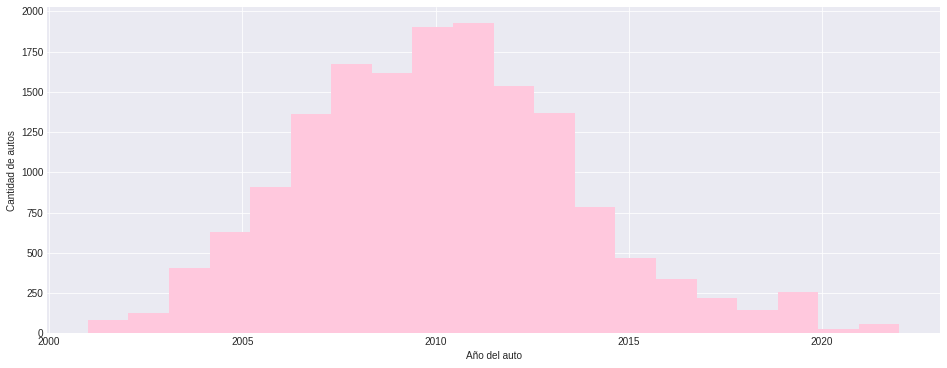

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))
plt.hist(df['AÑO AUTO'], color=['#ffc8dd'], bins=20)

#agregamos contexto a la gráfica
plt.xlabel('Año del auto')
plt.ylabel('Cantidad de autos')

plt.show()

**Observación:** Podemos observar que la mayoria de los autos que se venden son entre los años 2006 y 2015

**Marca del auto**

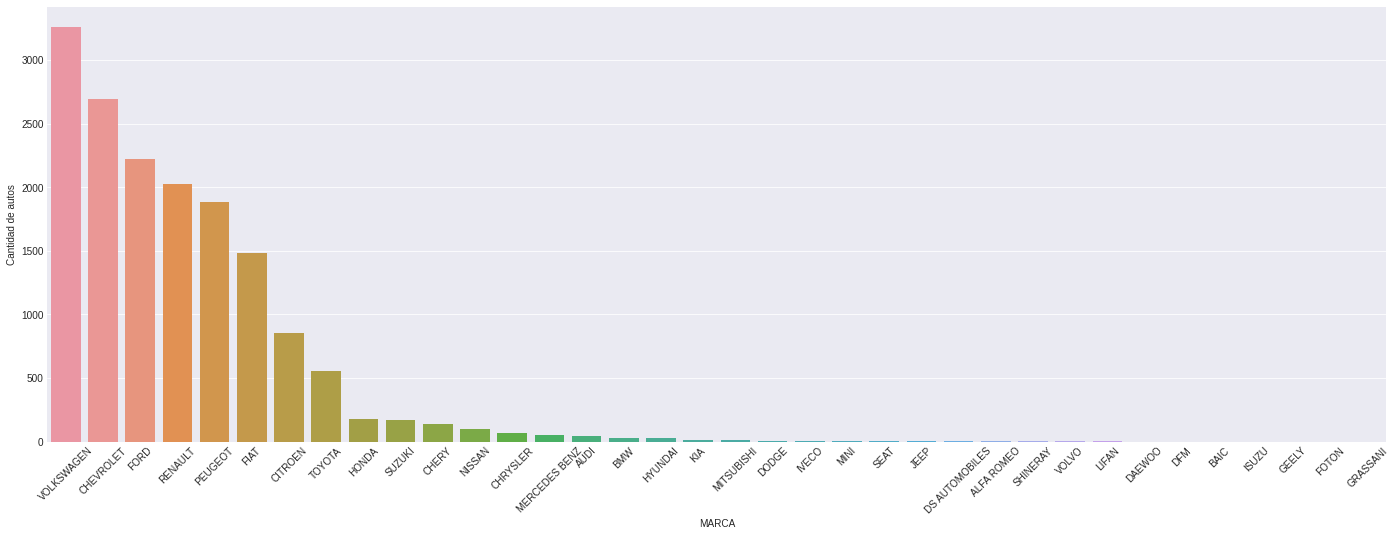

In [ ]:
fig, ax = plt.subplots(figsize = (24,8))
sns.countplot(data=df, x='MARCA', order = df['MARCA'].value_counts().index)

#mejoramos el gráfico
plt.xticks(rotation=45)
plt.ylabel('Cantidad de autos')

plt.show()

**Observación:** Podemos observar que hay una gran cantidad de los autos vendidos, que comparten la misma marca. Siendo los más vendidos VW y Chevrolet.

**Situación laboral**

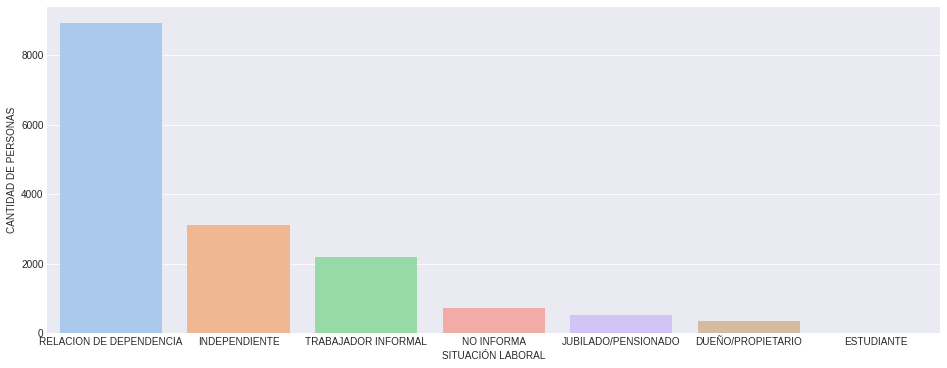

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(data=df, x='SITUACION LABORAL', order= df['SITUACION LABORAL'].value_counts().index, palette='pastel')

plt.xlabel('SITUACIÓN LABORAL')
plt.ylabel('CANTIDAD DE PERSONAS')

plt.show()


**Observación:** Podemos observar que la mayoria de las personas que acceden a los prestamos, estan en relación de dependencia.

## Análisis bivariado y multivariado

FaceGrid - Año y valor actual del auto según estado Civil

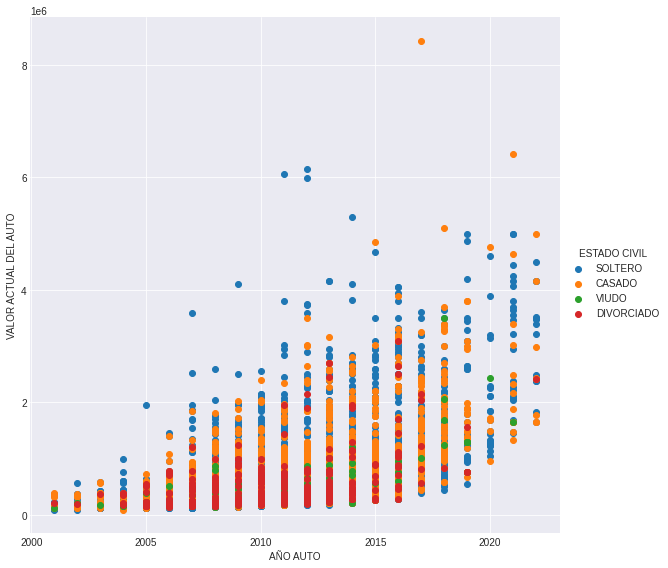

In [ ]:
sns.FacetGrid(df,hue = 'ESTADO CIVIL' , height = 8).map(plt.scatter,'AÑO AUTO', 'VALOR ACTUAL DEL AUTO').add_legend();
plt.show()

###FacetGrid - Valor actual del auto y score del cliente según estado Civil

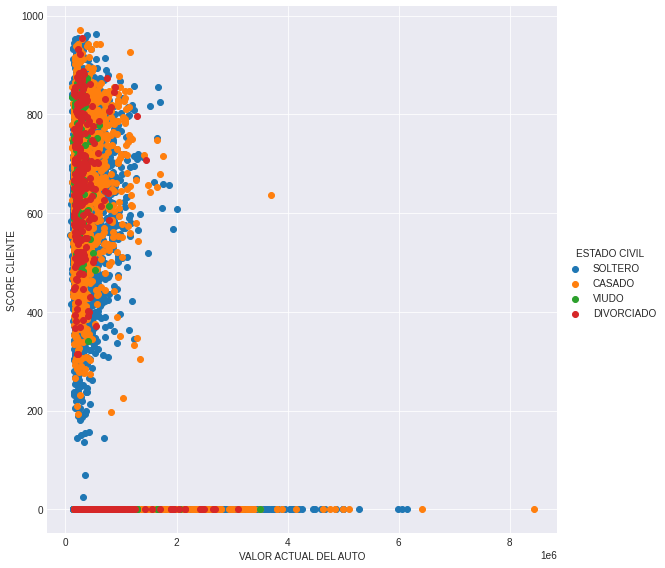

In [ ]:
sns.FacetGrid(df,hue = 'ESTADO CIVIL' , height = 8).map(plt.scatter,'VALOR ACTUAL DEL AUTO', 'SCORE CLIENTE').add_legend();
plt.show()

FaceGrid - Valor actual del auto y score del cliente según estado Civil

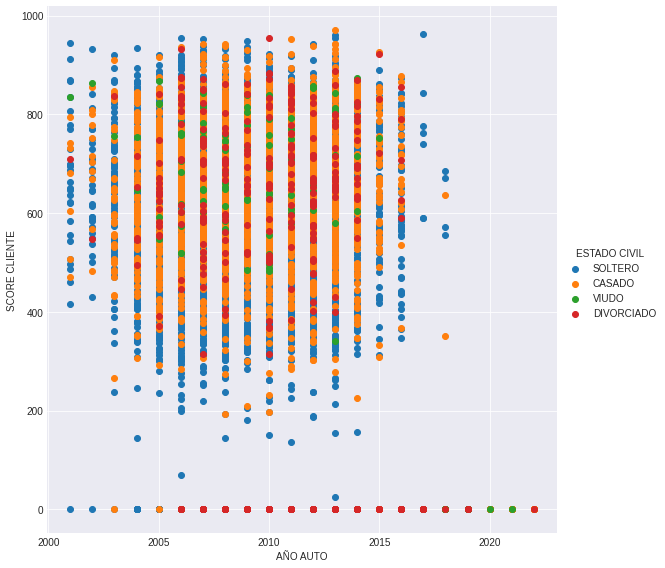

In [ ]:
sns.FacetGrid(df,hue = 'ESTADO CIVIL' , height = 8).map(plt.scatter,'AÑO AUTO', 'SCORE CLIENTE').add_legend();
plt.show()

**Pairplot**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


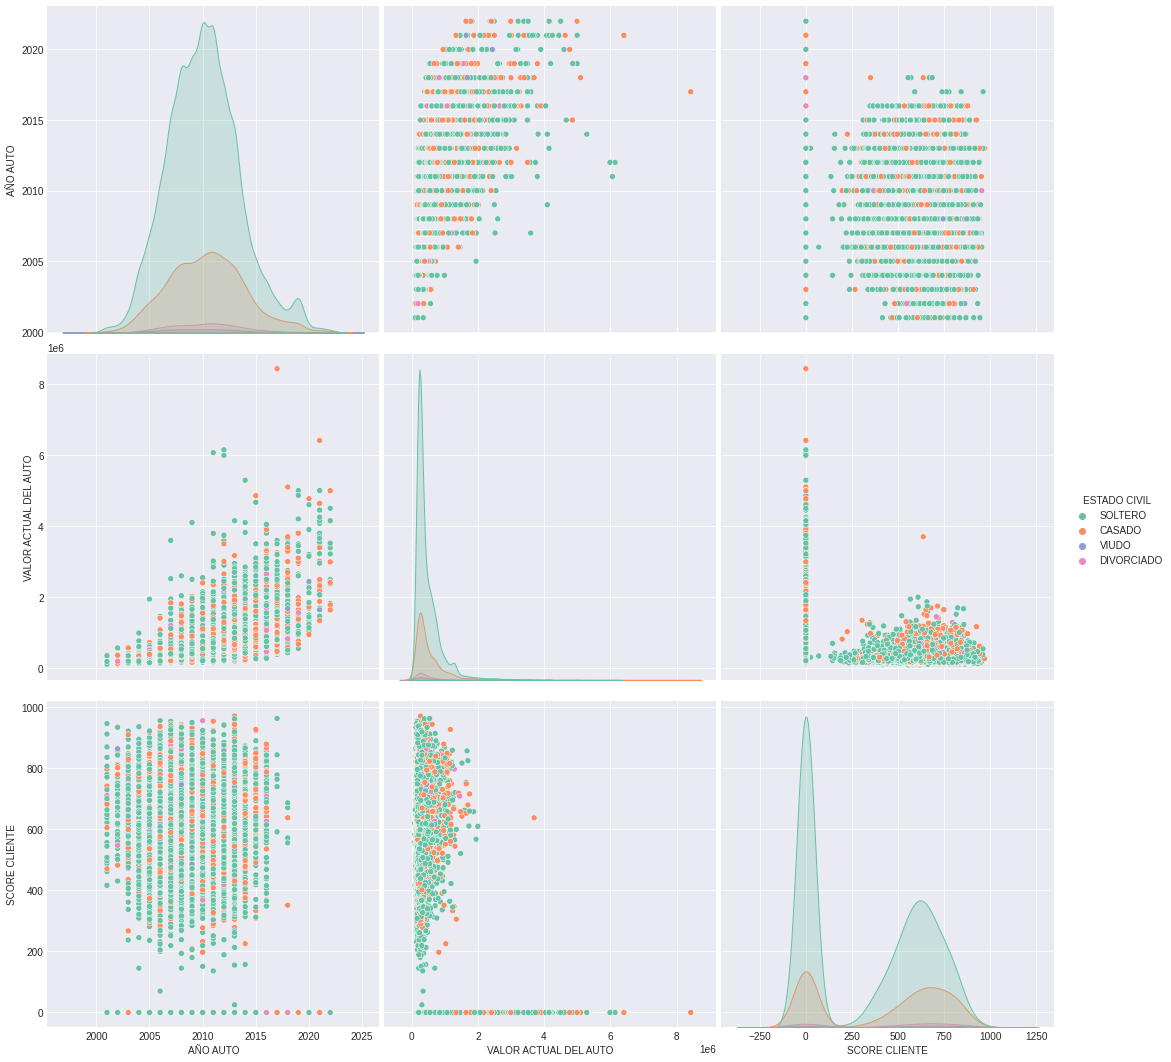

In [ ]:
sns.pairplot(df,hue = 'ESTADO CIVIL' , size = 5 , palette = 'Set2')